In [16]:
!pip install optuna
!pip install xgboost
!pip install seaborn
!pip install lightgbm
!pip install catboost


  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.5 MB 6.7 MB/s eta 0:00:16
    --------------------------------------- 2.4/102.5 MB 7.9 MB/s eta 0:00:13
   - -------------------------------------- 4.5/102.5 MB 8.7 MB/s eta 0:00:12
   -- ------------------------------------- 6.8/102.5 MB 9.5 MB/s eta 0:00:11
   --- ------------------------------------ 9.4/102.5 MB 10.1 MB/s eta 0:00:10
   ---- ----------------------------------- 11.8/102.5 MB 10.4 MB/s eta 0:00:09
   ----- ---------------------------------- 14.2/102.5 MB 10.6 MB/s eta 0:00:09
   ------ --------------------------------- 16.8/102.5 MB 10.8 MB/s eta 0:00:08
   ------- -------------------------------- 19.1/102.5 MB 10.9 MB/s eta 0:00:08
   -------- ------------------------------- 21.5/102.5 MB 11.0 MB/s eta 0:00:08
   --------- ------------------------------ 24.1/102.5 MB 11.1 MB/s eta 0:0

🔒 Global Seed set to: 42

📂 Loading data from CaRDS.csv...


[W 2025-12-28 11:29:41,306] Trial 0 failed with parameters: {'yoy_min': 1.0936350297118407, 'mom_max': 0.9831000028973882, 'mom_summer': 1.0231993941811406, 'mom_fall': 0.8697316968394073, 'base_sigma': 1.312037280884873, 'hist_cov': 0.9091961642353419, 'summer_cov': 1.0580836121681996, 'max_cap': 0.4531616510212273} because of the following error: The value nan is not acceptable.
[W 2025-12-28 11:29:41,307] Trial 0 failed with value np.float64(nan).
[W 2025-12-28 11:29:41,314] Trial 1 failed with parameters: {'yoy_min': 1.1502787529358023, 'mom_max': 0.9491301608914464, 'mom_summer': 0.9520584494295802, 'mom_fall': 0.9439819704323988, 'base_sigma': 2.6648852816008435, 'hist_cov': 0.9486373774747934, 'summer_cov': 1.1818249672071006, 'max_cap': 0.21419157844870185} because of the following error: The value nan is not acceptable.
[W 2025-12-28 11:29:41,315] Trial 1 failed with value np.float64(nan).
[W 2025-12-28 11:29:41,326] Trial 2 failed with parameters: {'yoy_min': 1.07606056073988


🔨 Creating features...

--- SELECTING ALGORITHM: RIDGE ---
   🚀 Fitting Ridge Model (alpha=2.0)...

⚙️  Optimizing Safety Layer on Validation set...

🚀 STARTING OPTUNA OPTIMIZATION (50 trials)


[W 2025-12-28 11:29:41,407] Trial 10 failed with value np.float64(nan).
[W 2025-12-28 11:29:41,418] Trial 11 failed with parameters: {'yoy_min': 1.2218031856440816, 'mom_max': 0.9161100895226729, 'mom_summer': 0.9619594245938301, 'mom_fall': 0.8926489574445989, 'base_sigma': 2.521570097233795, 'hist_cov': 1.1928940382986473, 'summer_cov': 1.770967179954561, 'max_cap': 0.32282845872753674} because of the following error: The value nan is not acceptable.
[W 2025-12-28 11:29:41,419] Trial 11 failed with value np.float64(nan).
[W 2025-12-28 11:29:41,427] Trial 12 failed with parameters: {'yoy_min': 1.1306832073454984, 'mom_max': 0.909855742570197, 'mom_summer': 0.9525419126744095, 'mom_fall': 0.7715782853986609, 'base_sigma': 1.0628583713734685, 'hist_cov': 1.2454872878846464, 'summer_cov': 1.3143559810763268, 'max_cap': 0.3279997419076459} because of the following error: The value nan is not acceptable.
[W 2025-12-28 11:29:41,429] Trial 12 failed with value np.float64(nan).
[W 2025-12-28 

ValueError: No trials are completed yet.

🔒 Global Seed set to: 42
XGBOOST-ONLY MODEL WITH OPTIMIZED SAFETY LAYER
Model: XGBoost | SEED: 42

📂 Loading data from CaRDS.csv...

🔨 Creating features...

📊 Splitting data...

STEP 1: TRAINING XGBOOST MODEL
   🚀 Fitting XGBoost Model...
      Training MAE: 4,558,238

 🔮 Generating raw predictions...

🚀 STARTING OPTUNA OPTIMIZATION (50 trials) | SEED=42
 ℹ️ Auto-tuning S_MAX constraint to: 573,865

✅ Optimization complete! Best score: 0.202926

STEP 2: APPLYING OPTIMIZED SAFETY LAYER

FINAL RESULTS - DETAILED EVALUATION

📊 EVALUATION RESULTS: TRAIN
📈 Accuracy Metrics:
   MAE: 26,666,626
   RMSE: 91,126,845
   R² Score: 0.8880
   MAPE: 34.30%
   Bias (Mean Error): 25,178,856

🔴 Shortage Analysis:
   Shortage Instances: 1,138 / 28,684 (3.97%)
   Total Shortage Volume: 21,337,594,809
   Average Shortage per Instance: 18,750,083

🟢 Surplus Analysis:
   Total Surplus Volume: 743,567,895,057
   Average Surplus per Sample: 25,922,741

📅 Seasonal Analysis:
   Winter: MAE=22,014,004, Shortage=

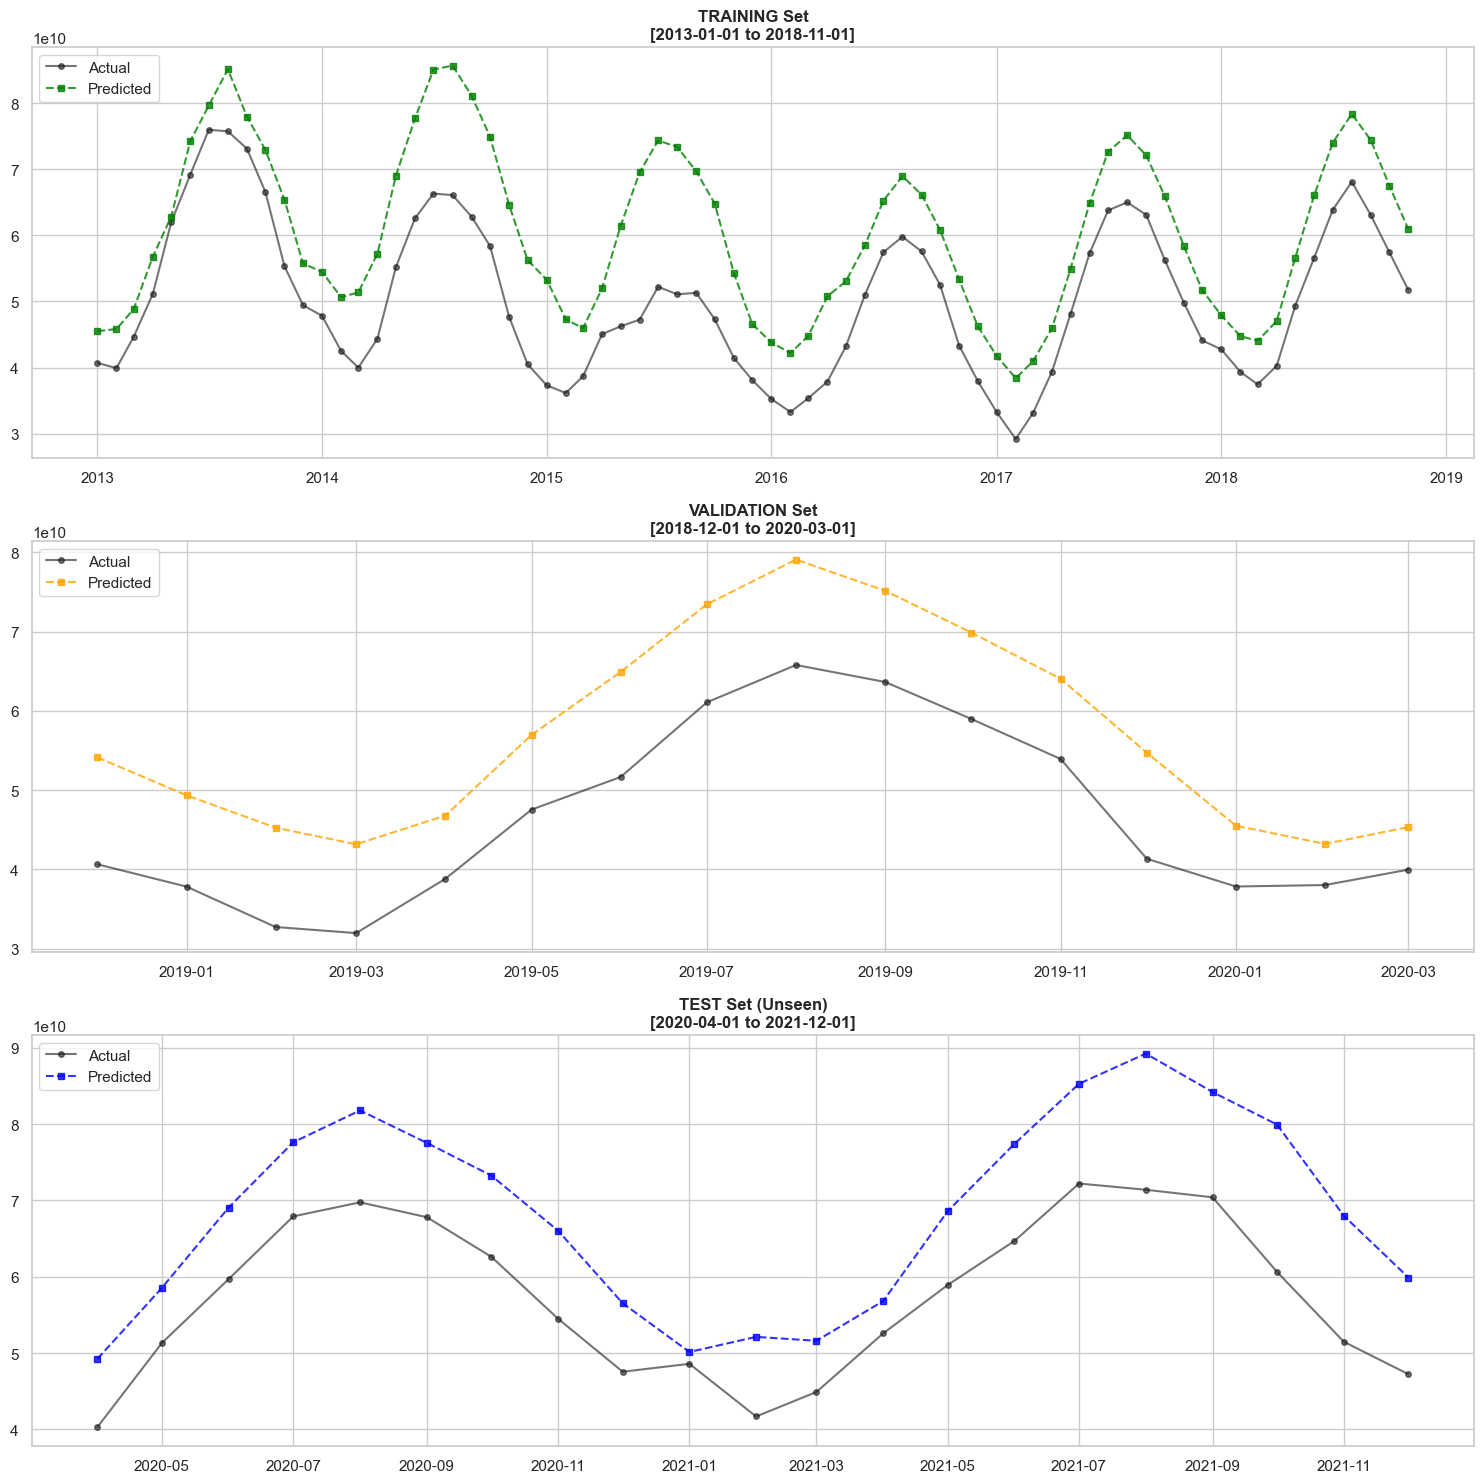


Generating Margin Efficiency Plot...


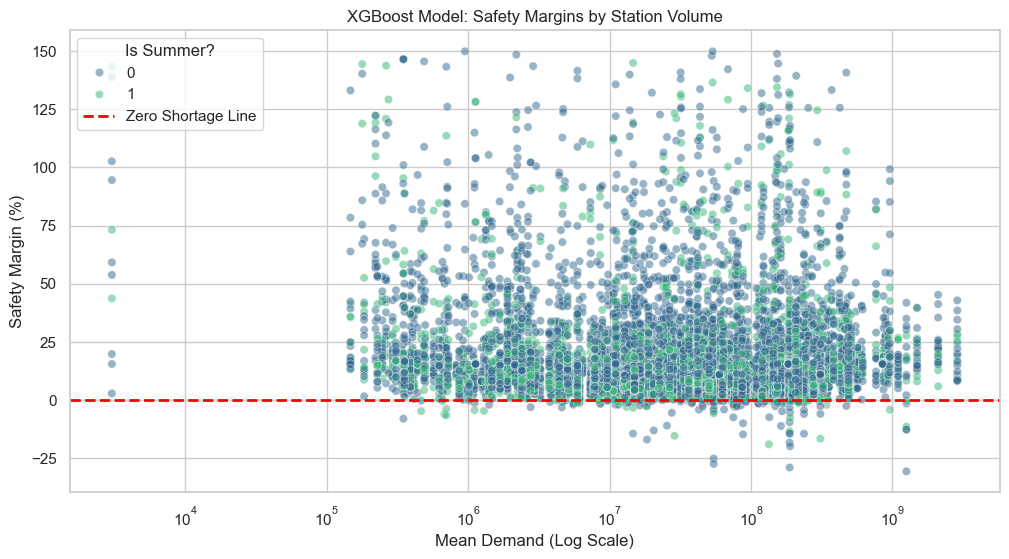


✅ PROCESS COMPLETE


In [13]:
"""
XGBOOST-ONLY MODEL WITH SAFETY LAYER
Architecture: Pure XGBoost with Physics-Based Safety Constraints
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from optuna.samplers import TPESampler 
import xgboost as xgb

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
sns.set_theme(style="whitegrid")

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

# ============= SEEDING FUNCTION =============
def set_seed(seed=42):
    """Fix random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= XGBOOST-ONLY MODEL =============
class XGBoostModel:
    """Pure XGBoost Model"""
    
    def __init__(self, xgb_params=None, seed=42):
        self.seed = seed
        self.xgb_params = xgb_params or self._get_default_params()
        self.model = None
        
    def _get_default_params(self):
        """Default XGBoost parameters"""
        return {
            'objective': 'reg:quantileerror',
            'quantile_alpha': 0.5,
            'n_estimators': 3000,
            'learning_rate': 0.02,
            'max_depth': 6,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'reg_alpha': 0.1,
            'reg_lambda': 1.0,
            'random_state': self.seed,
            'n_jobs': -1,
            'tree_method': 'hist',
            'early_stopping_rounds': 200
        }
    
    def fit(self, X, y, sample_weight=None, eval_set=None, verbose=False):
        """Train XGBoost model"""
        print(f"   🚀 Fitting XGBoost Model...")
        
        # Prepare eval_set
        eval_set_xgb = None
        if eval_set:
            eval_set_xgb = [(eval_set[0][0], eval_set[0][1])]
        
        self.model = xgb.XGBRegressor(**self.xgb_params)
        
        self.model.fit(
            X, y,
            sample_weight=sample_weight,
            eval_set=eval_set_xgb,
            verbose=verbose
        )
        
        y_pred = self.model.predict(X)
        xgb_mae = mean_absolute_error(y, y_pred)
        print(f"      Training MAE: {xgb_mae:,.0f}")
        
        return self
    
    def predict(self, X):
        """Make predictions"""
        return self.model.predict(X)

# ============= SAFETY LAYER =============
class WaterDemandSafetyLayer:
    """
    Vectorized Risk-Based Safety Layer với cơ chế FAIL-SAFE.
    """
    
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        """Learn risk profile (vectorized)"""
        self.global_median_lag1 = df_val['lag_1'].median()
        
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        y_true_arr = y_true.values if hasattr(y_true, 'values') else y_true
        analysis['Shortage'] = y_true_arr - y_pred_raw
        
        # 1. Error Std per station
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        
        # 2. Max Historical Shortage
        shortage_only = analysis[analysis['Shortage'] > 0]
        grp_max = shortage_only.groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        
        # 3. Max Summer Shortage
        summer_months = self.config['summer_months']
        summer_shortage = shortage_only[shortage_only['Month'].isin(summer_months)]
        grp_max_summer = summer_shortage.groupby('PWSID_enc')['Shortage'].max().rename('Max_Summer_Shortage')
        
        self.risk_profile = pd.concat([grp_std, grp_max, grp_max_summer], axis=1).fillna(0)
        self.risk_profile.index.name = 'PWSID_enc'
        
        return self
    
    def predict(self, raw_pred, df_context, explain=False):
        """Apply vectorized safety adjustments with FAIL-SAFE CHECK"""
        
        # --- 0. FAIL-SAFE DETECTION ---
        current_lag1 = df_context['lag_1'].values
        mask_sensor_failure = np.isclose(current_lag1, self.global_median_lag1, atol=1e-3)
        
        # --- A. Smart Floor ---
        cfg_f = self.config['floor']
        lag_12 = df_context['lag_12'].values
        lag_1 = df_context['lag_1'].values
        months = df_context['Month'].values
        
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        
        mom_factor = np.full_like(raw_pred, cfg_f['mom_drop_max'])
        mask_summer = np.isin(months, self.config['summer_months'])
        mom_factor[mask_summer] = cfg_f['mom_drop_summer']
        mask_fall = np.isin(months, [9, 10, 11])
        mom_factor[mask_fall] = cfg_f['mom_drop_fall']
        
        floor_mom = lag_1 * mom_factor
        mask_nan = np.isnan(floor_mom)
        floor_mom[mask_nan] = floor_yoy[mask_nan]
        
        floored_pred = np.maximum(raw_pred, floor_yoy)
        floored_pred = np.maximum(floored_pred, floor_mom)
        
        # --- B. Adaptive Risk Buffer ---
        if not self.config['buffer']['enabled']:
            final_pred = floored_pred
            buffer_vals = np.zeros_like(floored_pred)
        else:
            cfg_b = self.config['buffer']
            pwsids = df_context['PWSID_enc']
            risk_vec = self.risk_profile.reindex(pwsids).fillna(0)
            
            buf_base = risk_vec['Error_Std'].values * cfg_b['base_sigma']
            buf_hist = risk_vec['Max_Shortage'].values * cfg_b['hist_coverage']
            
            buf_summer = np.zeros_like(buf_base)
            buf_summer[mask_summer] = risk_vec['Max_Summer_Shortage'].values[mask_summer] * cfg_b['summer_coverage']
            
            raw_buffer = np.maximum(buf_base, buf_hist)
            raw_buffer = np.maximum(raw_buffer, buf_summer)
            
            # === C. FAIL-SAFE INJECTION ===
            fail_safe_add = np.zeros_like(raw_buffer)
            fail_safe_add[mask_sensor_failure] = risk_vec['Error_Std'].values[mask_sensor_failure] * 1.5 
            
            total_buffer = raw_buffer + fail_safe_add
            
            # Cap buffer
            cap_val = floored_pred * cfg_b['max_cap_pct']
            cap_val[mask_sensor_failure] = cap_val[mask_sensor_failure] * 1.5
            
            final_buffer = np.minimum(total_buffer, cap_val)
            
            final_pred = floored_pred + final_buffer
            buffer_vals = final_buffer
        
        if explain:
            expl_df = pd.DataFrame({
                'Raw': raw_pred,
                'Floored': floored_pred,
                'Buffer': buffer_vals,
                'Sensor_Fail': mask_sensor_failure, 
                'Final': final_pred
            }, index=df_context.index)
            return final_pred, expl_df
        
        return final_pred

# ============= DATA PROCESSING =============
def clean_physics_based(series):
    """Giữ nguyên logic làm sạch dữ liệu ban đầu"""
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0:
        return series.fillna(0)
    phys_min = median_val * 0.05
    phys_max = median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path):
        print(f"❌ Error: File not found.")
        return None
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"❌ Error reading file: {e}")
        return None
    
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, 
                      var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    
    rename_map = {'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation', 'pdsi': 'PDSI'}
    df_pivot.rename(columns=rename_map, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    
    for col in ['Temperature', 'Precipitation', 'PDSI']:
        if col in df_final.columns:
            val = 0 if col == 'Precipitation' else df_final[col].median()
            df_final[col] = df_final[col].fillna(val)
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based)
        df_final['Demand'] = df_final['Demand'].fillna(0)
    return df_final

def create_features(df):
    print("\n🔨 Creating features...")
    df = df.copy()
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    
    if 'Temperature' in df.columns:
        df['Temp_mean_3m'] = df.groupby('PWSID')['Temperature'].transform(lambda x: x.rolling(3, min_periods=1).mean())
        df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    
    df['lag_1'] = df.groupby('PWSID')['Demand'].shift(1)
    df['lag_12'] = df.groupby('PWSID')['Demand'].shift(12)
    df['rolling_mean_12'] = df.groupby('PWSID')['Demand'].transform(lambda x: x.rolling(12, min_periods=1).mean())
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    
    if 'Temperature' in df.columns:
        df['Temp_lag_1'] = df.groupby('PWSID')['Temperature'].shift(1)
        df['Summer_Heat_Interaction'] = df['Is_Summer_Peak'] * df['CDD']
    if 'Precipitation' in df.columns:
        df['Precip_lag_1'] = df.groupby('PWSID')['Precipitation'].shift(1)
    return df.fillna(method='bfill').fillna(0)

# ============= SAFETY OPTIMIZATION =============
def optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=100, seed=42):
    """Optuna optimization with FIXED SEED"""
    print("\n" + "="*70)
    print(f"🚀 STARTING OPTUNA OPTIMIZATION ({n_trials} trials) | SEED={seed}")
    print("="*70)
    
    mean_demand = np.mean(y_val)
    DYNAMIC_S_MAX = mean_demand * 0.005
    target_under_rate = 0.02
    
    print(f" ℹ️ Auto-tuning S_MAX constraint to: {DYNAMIC_S_MAX:,.0f}")
    
    val_df_sim = val_df.copy()
    val_df_sim['lag_1'] = np.nan
    
    def objective(trial):
        cfg = {
            'summer_months': [6, 7, 8],
            'floor': {
                'enabled': True,
                'yoy_growth_min': trial.suggest_float('yoy_min', 1.0, 1.25),
                'mom_drop_max': trial.suggest_float('mom_max', 0.85, 0.99),
                'mom_drop_summer': trial.suggest_float('mom_summer', 0.95, 1.05),
                'mom_drop_fall': trial.suggest_float('mom_fall', 0.75, 0.95)
            },
            'buffer': {
                'enabled': True,
                'base_sigma': trial.suggest_float('base_sigma', 1.0, 3.0),
                'hist_coverage': trial.suggest_float('hist_cov', 0.8, 1.5),
                'summer_coverage': trial.suggest_float('summer_cov', 1.0, 2.0),
                'max_cap_pct': trial.suggest_float('max_cap', 0.15, 0.5)
            }
        }
        
        layer = WaterDemandSafetyLayer(cfg)
        layer.fit(val_df_sim, y_val, raw_pred_val)
        preds = layer.predict(raw_pred_val, val_df_sim)
        
        diff = preds - y_val
        surplus_score = np.mean(np.maximum(diff, 0)) / mean_demand
        u_rate = np.mean(diff < 0)
        s_vol = np.mean(np.maximum(-diff, 0))
        
        penalty = 0
        if u_rate > target_under_rate:
            penalty += (u_rate - target_under_rate) * 5000
        if s_vol > DYNAMIC_S_MAX:
            penalty += (s_vol - DYNAMIC_S_MAX) / mean_demand * 200
        
        return surplus_score + penalty
    
    sampler = TPESampler(seed=seed)
    study = optuna.create_study(direction='minimize', sampler=sampler)
    
    study.optimize(objective, n_trials=n_trials, show_progress_bar=False)
    
    best = study.best_params
    final_config = {
        'summer_months': [6, 7, 8],
        'floor': {
            'enabled': True,
            'yoy_growth_min': best['yoy_min'],
            'mom_drop_max': best['mom_max'],
            'mom_drop_summer': best['mom_summer'],
            'mom_drop_fall': best['mom_fall']
        },
        'buffer': {
            'enabled': True,
            'base_sigma': best['base_sigma'],
            'hist_coverage': best['hist_cov'],
            'summer_coverage': best['summer_cov'],
            'max_cap_pct': best['max_cap']
        }
    }
    
    print(f"\n✅ Optimization complete! Best score: {study.best_value:.6f}")
    return final_config

# ============= ĐÁNH GIÁ CHI TIẾT =============
def detailed_evaluation(y_true, y_pred, name, df_context=None):
    """
    Đánh giá chi tiết với đầy đủ chỉ số
    """
    y_true_arr = y_true.values if hasattr(y_true, 'values') else np.array(y_true)
    y_pred_arr = np.array(y_pred)
    
    # Các chỉ số cơ bản
    mae = mean_absolute_error(y_true_arr, y_pred_arr)
    rmse = np.sqrt(mean_squared_error(y_true_arr, y_pred_arr))
    r2 = r2_score(y_true_arr, y_pred_arr)
    
    # Các chỉ số shortage
    diff = y_true_arr - y_pred_arr
    shortage_mask = diff > 0
    n_shortage = np.sum(shortage_mask)
    total_samples = len(y_true_arr)
    shortage_percentage = (n_shortage / total_samples) * 100
    
    shortage_volume = np.sum(np.maximum(diff, 0))
    avg_shortage = shortage_volume / n_shortage if n_shortage > 0 else 0
    
    surplus_volume = np.sum(np.maximum(y_pred_arr - y_true_arr, 0))
    avg_surplus = surplus_volume / total_samples
    
    # MAPE (Mean Absolute Percentage Error)
    epsilon = 1e-10
    mape = np.mean(np.abs((y_true_arr - y_pred_arr) / (y_true_arr + epsilon))) * 100
    
    # Bias (Mean Error)
    bias = np.mean(y_pred_arr - y_true_arr)
    
    # Tổng hợp kết quả
    results = {
        'Dataset': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE (%)': mape,
        'Bias': bias,
        'Shortage_Count': n_shortage,
        'Shortage_Percentage (%)': shortage_percentage,
        'Total_Shortage_Volume': shortage_volume,
        'Avg_Shortage_Volume': avg_shortage,
        'Total_Surplus_Volume': surplus_volume,
        'Avg_Surplus_Volume': avg_surplus,
        'Samples': total_samples
    }
    
    # In kết quả
    print(f"\n{'='*60}")
    print(f"📊 EVALUATION RESULTS: {name}")
    print(f"{'='*60}")
    print(f"📈 Accuracy Metrics:")
    print(f"   MAE: {mae:,.0f}")
    print(f"   RMSE: {rmse:,.0f}")
    print(f"   R² Score: {r2:.4f}")
    print(f"   MAPE: {mape:.2f}%")
    print(f"   Bias (Mean Error): {bias:,.0f}")
    
    print(f"\n🔴 Shortage Analysis:")
    print(f"   Shortage Instances: {n_shortage:,} / {total_samples:,} ({shortage_percentage:.2f}%)")
    print(f"   Total Shortage Volume: {shortage_volume:,.0f}")
    print(f"   Average Shortage per Instance: {avg_shortage:,.0f}")
    
    print(f"\n🟢 Surplus Analysis:")
    print(f"   Total Surplus Volume: {surplus_volume:,.0f}")
    print(f"   Average Surplus per Sample: {avg_surplus:,.0f}")
    
    # Phân tích theo mùa nếu có df_context
    if df_context is not None and 'Month' in df_context.columns:
        df_eval = pd.DataFrame({
            'Actual': y_true_arr,
            'Predicted': y_pred_arr,
            'Month': df_context['Month'].values
        })
        
        # Phân loại theo mùa
        df_eval['Season'] = 'Other'
        df_eval.loc[df_eval['Month'].isin([12, 1, 2]), 'Season'] = 'Winter'
        df_eval.loc[df_eval['Month'].isin([3, 4, 5]), 'Season'] = 'Spring'
        df_eval.loc[df_eval['Month'].isin([6, 7, 8]), 'Season'] = 'Summer'
        df_eval.loc[df_eval['Month'].isin([9, 10, 11]), 'Season'] = 'Fall'
        
        print(f"\n📅 Seasonal Analysis:")
        for season in ['Winter', 'Spring', 'Summer', 'Fall', 'Other']:
            mask = df_eval['Season'] == season
            if mask.sum() > 0:
                season_mae = mean_absolute_error(df_eval.loc[mask, 'Actual'], df_eval.loc[mask, 'Predicted'])
                season_shortage = np.sum(np.maximum(df_eval.loc[mask, 'Actual'] - df_eval.loc[mask, 'Predicted'], 0))
                print(f"   {season}: MAE={season_mae:,.0f}, Shortage={season_shortage:,.0f}")
    
    return results

# ============= MAIN PIPELINE =============
def main(n_trials=100, seed=42):
    
    # 1. SET GLOBAL SEED
    set_seed(seed)
    
    print("="*70)
    print("XGBOOST-ONLY MODEL WITH OPTIMIZED SAFETY LAYER")
    print(f"Model: XGBoost | SEED: {seed}")
    print("="*70)
    
    # 2. Load data
    df = load_and_process_data(FILE_PATH)
    if df is None: return None
    df_features = create_features(df)
    
    # 3. Split data
    print("\n📊 Splitting data...")
    unique_dates = df_features['Date'].sort_values().unique()
    n_test = int(len(unique_dates) * TEST_SIZE)
    n_val = int(len(unique_dates) * VAL_SIZE)
    
    test_start = unique_dates[-n_test]
    val_start = unique_dates[-(n_test + n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])
    
    common_pwsids = set(train_df['PWSID']) & set(val_df['PWSID']) & set(test_df['PWSID'])
    train_df = train_df[train_df['PWSID'].isin(common_pwsids)]
    val_df = val_df[val_df['PWSID'].isin(common_pwsids)]
    test_df = test_df[test_df['PWSID'].isin(common_pwsids)]
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak',
                'lag_1', 'lag_12', 'diff_12', 'Temp_lag_1', 'Precip_lag_1']
    features = [c for c in features if c in train_df.columns]
    
    X_train, y_train = train_df[features], train_df['Demand']
    X_val, y_val = val_df[features], val_df['Demand']
    X_test, y_test = test_df[features], test_df['Demand']
    
    # Weights for summer months
    weights = np.ones(len(X_train))
    weights[(train_df['Month'] >= 6) & (train_df['Month'] <= 8)] = 1.3
    
    # 5. Train XGBoost model
    print("\n" + "="*70)
    print("STEP 1: TRAINING XGBOOST MODEL")
    print("="*70)
    
    model = XGBoostModel(seed=seed)
    
    model.fit(
        X_train, y_train,
        sample_weight=weights,
        eval_set=[(X_val, y_val)],
        verbose=False
    )
    
    # 6. Generate predictions
    print("\n 🔮 Generating raw predictions...")
    raw_pred_train = model.predict(X_train)
    raw_pred_val = model.predict(X_val)
    raw_pred_test = model.predict(X_test)
    
    # 7. Optimize safety layer
    OPTIMIZED_CONFIG = optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=n_trials, seed=seed)
    
    # 8. Apply safety layer
    print("\n" + "="*70)
    print("STEP 2: APPLYING OPTIMIZED SAFETY LAYER")
    print("="*70)
    
    final_layer = WaterDemandSafetyLayer(config=OPTIMIZED_CONFIG)
    final_layer.fit(val_df, y_val, raw_pred_val)
    
    final_pred_train = final_layer.predict(raw_pred_train, train_df)
    final_pred_val = final_layer.predict(raw_pred_val, val_df)
    final_pred_test, explain_test = final_layer.predict(raw_pred_test, test_df, explain=True)
    
    # 9. Evaluate với đầy đủ chỉ số
    print("\n" + "="*70)
    print("FINAL RESULTS - DETAILED EVALUATION")
    print("="*70)
    
    # Đánh giá chi tiết từng tập
    train_results = detailed_evaluation(y_train, final_pred_train, "TRAIN", train_df)
    val_results = detailed_evaluation(y_val, final_pred_val, "VALIDATION", val_df)
    test_results = detailed_evaluation(y_test, final_pred_test, "TEST", test_df)
    
    # Tổng hợp kết quả
    print("\n" + "="*70)
    print("📋 SUMMARY OF ALL RESULTS")
    print("="*70)
    
    summary_df = pd.DataFrame([train_results, val_results, test_results])
    print("\n" + summary_df[['Dataset', 'MAE', 'R2', 'Shortage_Percentage (%)', 
                            'Total_Shortage_Volume', 'Avg_Shortage_Volume']].to_string(index=False))
    
    # =============================================================================
    # VISUALIZATION SECTION
    # =============================================================================
    print("\n" + "="*60)
    print("VISUALIZING RESULTS (TRAIN -> VAL -> TEST)")
    print("="*60)

    def prepare_plot_data(df, y_true, y_pred):
        plot_df = df.copy()
        y_true_safe = y_true.values.ravel() if hasattr(y_true, 'values') else np.array(y_true).ravel()
        y_pred_safe = np.array(y_pred).ravel()
        plot_df['Actual'] = y_true_safe
        plot_df['Predicted'] = y_pred_safe
        return plot_df.groupby('Date')[['Actual', 'Predicted']].sum().reset_index()

    train_monthly = prepare_plot_data(train_df, y_train, final_pred_train)
    val_monthly = prepare_plot_data(val_df, y_val, final_pred_val)
    test_monthly = prepare_plot_data(test_df, y_test, final_pred_test)

    fig, axes = plt.subplots(3, 1, figsize=(15, 15))

    def plot_segment(ax, data, title, color_pred):
        dates = data['Date'].values
        actual = data['Actual'].values
        predicted = data['Predicted'].values
        
        ax.plot(dates, actual, 'k-o', label='Actual', alpha=0.6, markersize=4)
        ax.plot(dates, predicted, color=color_pred, linestyle='--', marker='s', label='Predicted', alpha=0.8, markersize=4)
        
        shortage_mask = predicted < actual
        if np.any(shortage_mask):
            ax.fill_between(dates, predicted, actual,
                            where=shortage_mask,
                            color='red', alpha=0.3, label='Shortage Risk')
            
        ax.set_title(title, fontweight='bold')
        ax.legend(loc='upper left')

    # Plot 1: Train
    plot_segment(axes[0], train_monthly, f"TRAINING Set\n[{train_df['Date'].min().date()} to {train_df['Date'].max().date()}]", 'green')
    
    # Plot 2: Validation
    plot_segment(axes[1], val_monthly, f"VALIDATION Set\n[{val_df['Date'].min().date()} to {val_df['Date'].max().date()}]", 'orange')

    # Plot 3: Test
    plot_segment(axes[2], test_monthly, f"TEST Set (Unseen)\n[{test_df['Date'].min().date()} to {test_df['Date'].max().date()}]", 'blue')

    plt.tight_layout()
    plt.show()

    # --- MARGIN EFFICIENCY PLOT ---
    print("\nGenerating Margin Efficiency Plot...")
    mean_map = pd.concat([train_df, val_df]).groupby('PWSID_enc')['Demand'].mean().to_dict()

    test_analysis = test_df.copy()
    y_test_safe = y_test.values.ravel() if hasattr(y_test, 'values') else np.array(y_test).ravel()
    pred_test_safe = np.array(final_pred_test).ravel()
    
    test_analysis['Demand'] = y_test_safe
    test_analysis['Pred'] = pred_test_safe

    test_analysis['Margin_Pct'] = ((test_analysis['Pred'] - test_analysis['Demand']) / (test_analysis['Demand']+1)) * 100
    test_analysis['Mean_Volume'] = test_analysis['PWSID_enc'].map(mean_map)

    plt.figure(figsize=(12, 6))
    plot_data = test_analysis[(test_analysis['Margin_Pct'] > -50) & (test_analysis['Margin_Pct'] < 150)]
    
    sns.scatterplot(data=plot_data, x='Mean_Volume', y='Margin_Pct', hue='Is_Summer_Peak', alpha=0.5, palette='viridis')

    plt.xscale('log')
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Shortage Line')
    plt.title(f'XGBoost Model: Safety Margins by Station Volume')
    plt.xlabel('Mean Demand (Log Scale)')
    plt.ylabel('Safety Margin (%)')
    plt.legend(title='Is Summer?')
    plt.show()
    
    print("\n✅ PROCESS COMPLETE")
    
    return {
        'model': model,
        'safety_layer': final_layer,
        'config': OPTIMIZED_CONFIG,
        'results': (test_df, y_test, final_pred_test, explain_test),
        'evaluation': {
            'train': train_results,
            'val': val_results,
            'test': test_results
        }
    }

# ============= USAGE =============
if __name__ == "__main__":
    results = main(n_trials=50, seed=42)

In [29]:
"""
HYBRID ANCHOR-RESIDUAL FRAMEWORK WITH ENHANCED EVALUATION
Architecture: Ridge Anchor + Tree Residual + Vectorized Risk-Based Safety
Status: UPDATED WITH DETAILED EVALUATION METRICS
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from optuna.samplers import TPESampler 

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
sns.set_theme(style="whitegrid")

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

# ============= SEEDING FUNCTION =============
def set_seed(seed=42):
    """Fix random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= HYBRID ANCHOR-RESIDUAL MODEL =============
class HybridAnchorResidualModel:
    """Ridge Anchor + Tree-based Residual Learning"""
    
    def __init__(self, ridge_alpha=1.0, residual_model='xgboost', residual_params=None, seed=42):
        self.ridge_alpha = ridge_alpha
        self.residual_model_name = residual_model
        self.residual_params = residual_params or {}
        self.seed = seed
        
        self.ridge = Ridge(alpha=ridge_alpha, random_state=seed)
        self.scaler = StandardScaler()
        self.residual_model = None
        
    def _create_residual_model(self):
        """Create residual model based on type with Fixed Seed"""
        if self.residual_model_name == 'xgboost':
            import xgboost as xgb
            default_params = {
                'objective': 'reg:quantileerror',
                'quantile_alpha': 0.5,
                'n_estimators': 3000,
                'learning_rate': 0.02,
                'max_depth': 6,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'reg_alpha': 0.1,
                'reg_lambda': 1.0,
                'random_state': self.seed,
                'n_jobs': -1,
                'tree_method': 'hist',
                'early_stopping_rounds': 200
            }
            default_params.update(self.residual_params)
            return xgb.XGBRegressor(**default_params)
            
        elif self.residual_model_name == 'lightgbm':
            import lightgbm as lgb
            default_params = {
                'objective': 'quantile',
                'alpha': 0.5,
                'n_estimators': 3000,
                'learning_rate': 0.02,
                'num_leaves': 31,
                'max_depth': 6,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'reg_alpha': 0.1,
                'reg_lambda': 1.0,
                'random_state': self.seed,
                'n_jobs': -1
            }
            default_params.update(self.residual_params)
            return lgb.LGBMRegressor(**default_params)
            
        elif self.residual_model_name == 'catboost':
            from catboost import CatBoostRegressor
            default_params = {
                'loss_function': 'Quantile:alpha=0.5',
                'iterations': 3000,
                'learning_rate': 0.02,
                'depth': 6,
                'l2_leaf_reg': 1.0,
                'early_stopping_rounds': 200,
                'random_state': self.seed,
                'verbose': False
            }
            default_params.update(self.residual_params)
            return CatBoostRegressor(**default_params)
            
        elif self.residual_model_name == 'random_forest':
            from sklearn.ensemble import RandomForestRegressor
            default_params = {
                'n_estimators': 300,
                'max_depth': 12,
                'min_samples_split': 5,
                'random_state': self.seed,
                'n_jobs': -1
            }
            default_params.update(self.residual_params)
            return RandomForestRegressor(**default_params)
            
        else:
            raise ValueError(f"Unknown residual model: {self.residual_model_name}")
    
    def fit(self, X, y, sample_weight=None, eval_set=None, verbose=False):
        """Two-stage training"""
        print(f"   ⚓ Fitting Anchor Ridge Layer...")
        
        # Stage 1: Ridge
        X_scaled = self.scaler.fit_transform(X)
        self.ridge.fit(X_scaled, y, sample_weight=sample_weight)
        
        y_pred_ridge = self.ridge.predict(X_scaled)
        residuals = y - y_pred_ridge
        
        ridge_mae = mean_absolute_error(y, y_pred_ridge)
        print(f"      Ridge MAE: {ridge_mae:,.0f}")
        
        # Stage 2: Tree on residuals
        print(f"   🚀 Fitting {self.residual_model_name.upper()} on Residuals...")
        self.residual_model = self._create_residual_model()
        
        # Prepare eval_set for residuals
        eval_set_residual = None
        if eval_set:
            eval_set_residual = []
            for X_val, y_val in eval_set:
                X_val_scaled = self.scaler.transform(X_val)
                y_val_ridge = self.ridge.predict(X_val_scaled)
                residual_val = y_val - y_val_ridge
                eval_set_residual.append((X_val, residual_val))
        
        # Fit based on model type
        if self.residual_model_name == 'xgboost':
            self.residual_model.fit(
                X, residuals,
                sample_weight=sample_weight,
                eval_set=eval_set_residual,
                verbose=verbose
            )
        elif self.residual_model_name == 'lightgbm':
            import lightgbm as lgb
            self.residual_model.fit(
                X, residuals,
                sample_weight=sample_weight,
                eval_set=eval_set_residual,
                callbacks=[lgb.early_stopping(200, verbose=False)]
            )
        elif self.residual_model_name == 'catboost':
            self.residual_model.fit(
                X, residuals,
                sample_weight=sample_weight,
                eval_set=eval_set_residual[0] if eval_set_residual else None
            )
        else:  # Random Forest
            self.residual_model.fit(X, residuals, sample_weight=sample_weight)
        
        return self
    
    def predict(self, X):
        """Combine predictions"""
        X_scaled = self.scaler.transform(X)
        pred_ridge = self.ridge.predict(X_scaled)
        pred_residual = self.residual_model.predict(X)
        return pred_ridge + pred_residual

# ============= SAFETY LAYER V4.0 =============
class WaterDemandSafetyLayer:
    """Vectorized Risk-Based Safety Layer với cơ chế FAIL-SAFE."""
    
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        """Learn risk profile (vectorized)"""
        self.global_median_lag1 = df_val['lag_1'].median()
        
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        y_true_arr = y_true.values if hasattr(y_true, 'values') else y_true
        analysis['Shortage'] = y_true_arr - y_pred_raw
        
        # 1. Error Std per station
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        
        # 2. Max Historical Shortage
        shortage_only = analysis[analysis['Shortage'] > 0]
        grp_max = shortage_only.groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        
        # 3. Max Summer Shortage
        summer_months = self.config['summer_months']
        summer_shortage = shortage_only[shortage_only['Month'].isin(summer_months)]
        grp_max_summer = summer_shortage.groupby('PWSID_enc')['Shortage'].max().rename('Max_Summer_Shortage')
        
        self.risk_profile = pd.concat([grp_std, grp_max, grp_max_summer], axis=1).fillna(0)
        self.risk_profile.index.name = 'PWSID_enc'
        
        return self
    
    def predict(self, raw_pred, df_context, explain=False):
        """Apply vectorized safety adjustments with FAIL-SAFE CHECK"""
        
        # --- 0. FAIL-SAFE DETECTION ---
        current_lag1 = df_context['lag_1'].values
        mask_sensor_failure = np.isclose(current_lag1, self.global_median_lag1, atol=1e-3)
        
        # --- A. Smart Floor ---
        cfg_f = self.config['floor']
        lag_12 = df_context['lag_12'].values
        lag_1 = df_context['lag_1'].values
        months = df_context['Month'].values
        
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        
        mom_factor = np.full_like(raw_pred, cfg_f['mom_drop_max'])
        mask_summer = np.isin(months, self.config['summer_months'])
        mom_factor[mask_summer] = cfg_f['mom_drop_summer']
        mask_fall = np.isin(months, [9, 10, 11])
        mom_factor[mask_fall] = cfg_f['mom_drop_fall']
        
        floor_mom = lag_1 * mom_factor
        mask_nan = np.isnan(floor_mom)
        floor_mom[mask_nan] = floor_yoy[mask_nan]
        
        floored_pred = np.maximum(raw_pred, floor_yoy)
        floored_pred = np.maximum(floored_pred, floor_mom)
        
        # --- B. Adaptive Risk Buffer ---
        if not self.config['buffer']['enabled']:
            final_pred = floored_pred
            buffer_vals = np.zeros_like(floored_pred)
        else:
            cfg_b = self.config['buffer']
            pwsids = df_context['PWSID_enc']
            risk_vec = self.risk_profile.reindex(pwsids).fillna(0)
            
            buf_base = risk_vec['Error_Std'].values * cfg_b['base_sigma']
            buf_hist = risk_vec['Max_Shortage'].values * cfg_b['hist_coverage']
            
            buf_summer = np.zeros_like(buf_base)
            buf_summer[mask_summer] = risk_vec['Max_Summer_Shortage'].values[mask_summer] * cfg_b['summer_coverage']
            
            raw_buffer = np.maximum(buf_base, buf_hist)
            raw_buffer = np.maximum(raw_buffer, buf_summer)
            
            # === C. FAIL-SAFE INJECTION ===
            fail_safe_add = np.zeros_like(raw_buffer)
            fail_safe_add[mask_sensor_failure] = risk_vec['Error_Std'].values[mask_sensor_failure] * 1.5 
            
            total_buffer = raw_buffer + fail_safe_add
            
            # Cap buffer
            cap_val = floored_pred * cfg_b['max_cap_pct']
            cap_val[mask_sensor_failure] = cap_val[mask_sensor_failure] * 1.5
            
            final_buffer = np.minimum(total_buffer, cap_val)
            
            final_pred = floored_pred + final_buffer
            buffer_vals = final_buffer
        
        if explain:
            expl_df = pd.DataFrame({
                'Raw': raw_pred,
                'Floored': floored_pred,
                'Buffer': buffer_vals,
                'Sensor_Fail': mask_sensor_failure, 
                'Final': final_pred
            }, index=df_context.index)
            return final_pred, expl_df
        
        return final_pred

# ============= DATA PROCESSING =============
def clean_physics_based(series):
    """Giữ nguyên logic làm sạch dữ liệu ban đầu"""
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0:
        return series.fillna(0)
    phys_min = median_val * 0.05
    phys_max = median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path):
        print(f"❌ Error: File not found.")
        return None
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"❌ Error reading file: {e}")
        return None
    
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, 
                      var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    
    rename_map = {'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation', 'pdsi': 'PDSI'}
    df_pivot.rename(columns=rename_map, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    
    for col in ['Temperature', 'Precipitation', 'PDSI']:
        if col in df_final.columns:
            val = 0 if col == 'Precipitation' else df_final[col].median()
            df_final[col] = df_final[col].fillna(val)
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based)
        df_final['Demand'] = df_final['Demand'].fillna(0)
    return df_final

def create_features(df):
    print("\n🔨 Creating features...")
    df = df.copy()
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    
    if 'Temperature' in df.columns:
        df['Temp_mean_3m'] = df.groupby('PWSID')['Temperature'].transform(lambda x: x.rolling(3, min_periods=1).mean())
        df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    
    df['lag_1'] = df.groupby('PWSID')['Demand'].shift(1)
    df['lag_12'] = df.groupby('PWSID')['Demand'].shift(12)
    df['rolling_mean_12'] = df.groupby('PWSID')['Demand'].transform(lambda x: x.rolling(12, min_periods=1).mean())
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    
    if 'Temperature' in df.columns:
        df['Temp_lag_1'] = df.groupby('PWSID')['Temperature'].shift(1)
        df['Summer_Heat_Interaction'] = df['Is_Summer_Peak'] * df['CDD']
    if 'Precipitation' in df.columns:
        df['Precip_lag_1'] = df.groupby('PWSID')['Precipitation'].shift(1)
    return df.fillna(method='bfill').fillna(0)

# ============= SAFETY OPTIMIZATION =============
def optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=100, seed=42):
    """Optuna optimization with FIXED SEED"""
    print("\n" + "="*70)
    print(f"🚀 STARTING OPTUNA OPTIMIZATION ({n_trials} trials) - STRICT MODE | SEED={seed}")
    print("="*70)
    
    mean_demand = np.mean(y_val)
    DYNAMIC_S_MAX = mean_demand * 0.005
    target_under_rate = 0.02
    
    print(f" ℹ️ Auto-tuning S_MAX constraint to: {DYNAMIC_S_MAX:,.0f}")
    
    val_df_sim = val_df.copy()
    val_df_sim['lag_1'] = np.nan
    
    def objective(trial):
        cfg = {
            'summer_months': [6, 7, 8],
            'floor': {
                'enabled': True,
                'yoy_growth_min': trial.suggest_float('yoy_min', 1.0, 1.25),
                'mom_drop_max': trial.suggest_float('mom_max', 0.85, 0.99),
                'mom_drop_summer': trial.suggest_float('mom_summer', 0.95, 1.05),
                'mom_drop_fall': trial.suggest_float('mom_fall', 0.75, 0.95)
            },
            'buffer': {
                'enabled': True,
                'base_sigma': trial.suggest_float('base_sigma', 1.0, 3.0),
                'hist_coverage': trial.suggest_float('hist_cov', 0.8, 1.5),
                'summer_coverage': trial.suggest_float('summer_cov', 1.0, 2.0),
                'max_cap_pct': trial.suggest_float('max_cap', 0.15, 0.5)
            }
        }
        
        layer = WaterDemandSafetyLayer(cfg)
        layer.fit(val_df_sim, y_val, raw_pred_val)
        preds = layer.predict(raw_pred_val, val_df_sim)
        
        diff = preds - y_val
        surplus_score = np.mean(np.maximum(diff, 0)) / mean_demand
        u_rate = np.mean(diff < 0)
        s_vol = np.mean(np.maximum(-diff, 0))
        
        penalty = 0
        if u_rate > target_under_rate:
            penalty += (u_rate - target_under_rate) * 5000
        if s_vol > DYNAMIC_S_MAX:
            penalty += (s_vol - DYNAMIC_S_MAX) / mean_demand * 200
        
        return surplus_score + penalty
    
    sampler = TPESampler(seed=seed)
    study = optuna.create_study(direction='minimize', sampler=sampler)
    
    study.optimize(objective, n_trials=n_trials, show_progress_bar=False)
    
    best = study.best_params
    final_config = {
        'summer_months': [6, 7, 8],
        'floor': {
            'enabled': True,
            'yoy_growth_min': best['yoy_min'],
            'mom_drop_max': best['mom_max'],
            'mom_drop_summer': best['mom_summer'],
            'mom_drop_fall': best['mom_fall']
        },
        'buffer': {
            'enabled': True,
            'base_sigma': best['base_sigma'],
            'hist_coverage': best['hist_cov'],
            'summer_coverage': best['summer_cov'],
            'max_cap_pct': best['max_cap']
        }
    }
    
    print(f"\n✅ Optimization complete! Best score: {study.best_value:.6f}")
    return final_config

# ============= ĐÁNH GIÁ CHI TIẾT =============
def detailed_evaluation(y_true, y_pred, name):
    """
    Tính toán metrics trung bình trên mỗi mẫu:
    MAE, R2, % Shortage, Avg Shortage Vol, Avg Surplus Vol
    """
    y_true_arr = np.array(y_true).ravel()
    y_pred_arr = np.array(y_pred).ravel()
    diff = y_true_arr - y_pred_arr
    total_samples = len(y_true_arr)
    
    # 1. Accuracy
    mae = mean_absolute_error(y_true_arr, y_pred_arr)
    r2 = r2_score(y_true_arr, y_pred_arr)
    
    # 2. Shortage (Thực tế > Dự báo)
    shortage_mask = diff > 0
    shortage_count = np.sum(shortage_mask)
    shortage_pct = (shortage_count / total_samples) * 100
    # Lượng thiếu hụt trung bình trên TỔNG số mẫu
    avg_shortage_vol = np.sum(diff[shortage_mask]) / total_samples
    
    # 3. Surplus (Dự báo > Thực tế)
    surplus_mask = diff < 0
    # Lượng dư thừa trung bình trên TỔNG số mẫu
    avg_surplus_vol = np.sum(np.abs(diff[surplus_mask])) / total_samples
    
    metrics = {
        'Dataset': name,
        'MAE': mae,
        'R2': r2,
        'Shortage_%': shortage_pct,
        'Avg_Shortage': avg_shortage_vol,
        'Avg_Surplus': avg_surplus_vol
    }
    
    print(f"\n📊 RESULTS FOR: {name}")
    print(f"--------------------------------------")
    print(f"📈 MAE              : {mae:,.2f}")
    print(f"📈 R2 Score         : {r2:.4f}")
    print(f"🔴 Shortage %       : {shortage_pct:.2f}%")
    print(f"🔴 Avg Shortage Vol : {avg_shortage_vol:,.2f}")
    print(f"🟢 Avg Surplus Vol  : {avg_surplus_vol:,.2f}")
    
    return metrics

# ============= MAIN PIPELINE =============
def main(residual_model='xgboost', ridge_alpha=2.0, n_trials=50, seed=42):
    set_seed(seed)
    
    # 1. Data Prep
    df = load_and_process_data(FILE_PATH)
    if df is None: return None
    df_features = create_features(df)
    
    # Split
    unique_dates = df_features['Date'].sort_values().unique()
    n_test, n_val = int(len(unique_dates)*TEST_SIZE), int(len(unique_dates)*VAL_SIZE)
    test_start, val_start = unique_dates[-n_test], unique_dates[-(n_test+n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12', 'CDD']
    X_train, y_train = train_df[features], train_df['Demand']
    X_val, y_val = val_df[features], val_df['Demand']
    X_test, y_test = test_df[features], test_df['Demand']
    
    # 2. Train Hybrid Model
    print(f"\n🚀 TRAINING {residual_model.upper()} HYBRID...")
    model = HybridAnchorResidualModel(ridge_alpha=ridge_alpha, residual_model=residual_model, seed=seed)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    # 3. Raw Predictions & Debug
    raw_pred_test = model.predict(X_test)
    raw_pred_val = model.predict(X_val)
    raw_pred_train = model.predict(X_train)
    
    # In Raw Metrics để so sánh
    print("\n--- RAW MODEL PERFORMANCE (BEFORE SAFETY) ---")
    raw_metrics = detailed_evaluation(y_test, raw_pred_test, f"RAW_{residual_model.upper()}")

    # 4. Safety Optimization
    cfg = optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=n_trials, seed=seed)
    final_layer = WaterDemandSafetyLayer(cfg)
    final_layer.fit(val_df, y_val, raw_pred_val)
    
    # 5. Final Predictions
    final_pred_train = final_layer.predict(raw_pred_train, train_df)
    final_pred_val = final_layer.predict(raw_pred_val, val_df)
    final_pred_test = final_layer.predict(raw_pred_test, test_df)
    
    # 6. Final Evaluation
    print("\n" + "="*50)
    print("📢 FINAL PERFORMANCE EVALUATION (WITH SAFETY)")
    print("="*50)
    
    report_train = detailed_evaluation(y_train, final_pred_train, "TRAIN")
    report_val = detailed_evaluation(y_val, final_pred_val, "VALIDATION")
    report_test = detailed_evaluation(y_test, final_pred_test, "TEST (UNSEEN)")
    
    # 7. Summary Table
    summary = pd.DataFrame([report_train, report_val, report_test])
    print("\n" + "="*70)
    print("📋 SUMMARY TABLE (AVERAGE METRICS)")
    print("="*70)
    # Định dạng hiển thị số thực
    pd.options.display.float_format = '{:,.2f}'.format
    print(summary.to_string(index=False))
    
    return {'model': model, 'safety': final_layer, 'summary': summary}

if __name__ == "__main__":
    # Test lần lượt để thấy sự khác biệt của metrics
    results = main(residual_model='xgboost', ridge_alpha=2.0, n_trials=50, seed=42)

🔒 Global Seed set to: 42

📂 Loading data from CaRDS.csv...

🔨 Creating features...

🚀 TRAINING XGBOOST HYBRID...
   ⚓ Fitting Anchor Ridge Layer...
      Ridge MAE: 13,234,262
   🚀 Fitting XGBOOST on Residuals...

--- RAW MODEL PERFORMANCE (BEFORE SAFETY) ---

📊 RESULTS FOR: RAW_XGBOOST
--------------------------------------
📈 MAE              : 9,264,410.98
📈 R2 Score         : 0.9897
🔴 Shortage %       : 95.39%
🔴 Avg Shortage Vol : 7,221,514.74
🟢 Avg Surplus Vol  : 2,042,896.24

🚀 STARTING OPTUNA OPTIMIZATION (50 trials) - STRICT MODE | SEED=42
 ℹ️ Auto-tuning S_MAX constraint to: 573,865

✅ Optimization complete! Best score: 0.192621

📢 FINAL PERFORMANCE EVALUATION (WITH SAFETY)

📊 RESULTS FOR: TRAIN
--------------------------------------
📈 MAE              : 26,806,358.99
📈 R2 Score         : 0.9114
🔴 Shortage %       : 2.22%
🔴 Avg Shortage Vol : 683,948.49
🟢 Avg Surplus Vol  : 26,122,410.51

📊 RESULTS FOR: VALIDATION
--------------------------------------
📈 MAE              : 26,9

🔒 Global Seed set to: 42

🚀 Training Pure XGBoost Model...
[0]	validation_0-rmse:241554359.28418
[100]	validation_0-rmse:28983714.68489
[200]	validation_0-rmse:27321802.55739
[300]	validation_0-rmse:26748585.60505
[400]	validation_0-rmse:26614577.87662
[500]	validation_0-rmse:26565629.51539
[600]	validation_0-rmse:26535982.46883
[700]	validation_0-rmse:26534087.00273
[800]	validation_0-rmse:26508382.14372
[900]	validation_0-rmse:26585327.27449
[999]	validation_0-rmse:26573451.26047

📊 TRAIN RESULTS:
   MAE: 2,634,931
   R² : 0.9995
   Shortage Risk: 49.42%

📊 TEST (UNSEEN) RESULTS:
   MAE: 14,770,905
   R² : 0.6822
   Shortage Risk: 49.34%


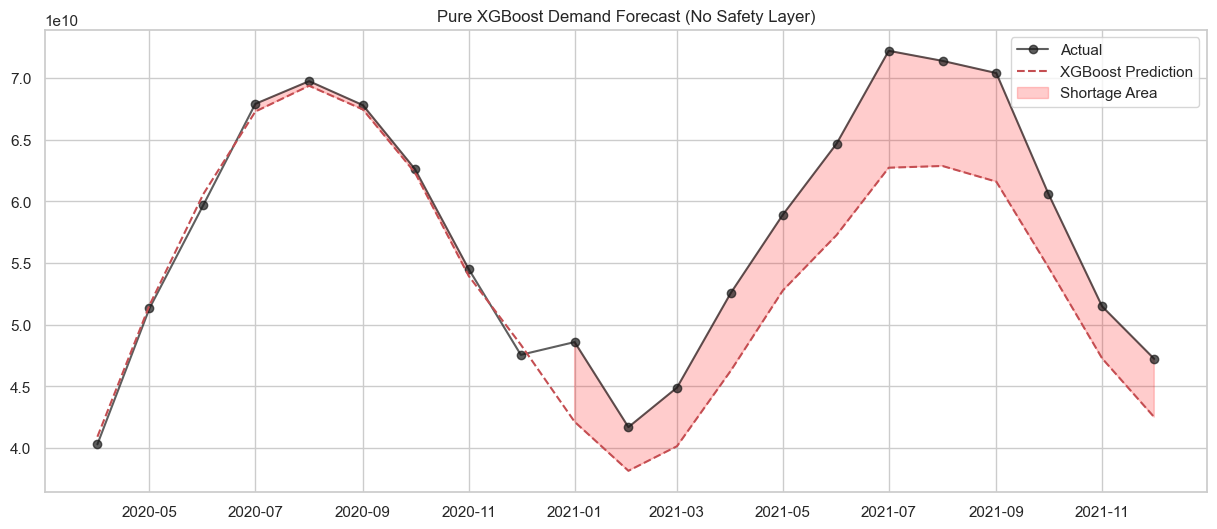

In [14]:
"""
PURE XGBOOST MODEL (NO SAFETY LAYER)
Architecture: Standard XGBoost Regressor
"""

import numpy as np
import pandas as pd
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= DATA PROCESSING =============
def clean_physics_based(series):
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0:
        return series.fillna(0)
    phys_min = median_val * 0.05
    phys_max = median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    if not os.path.exists(file_path):
        print(f"❌ Error: File not found.")
        return None
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    
    for col in ['Temperature', 'Precipitation']:
        if col in df_final.columns:
            df_final[col] = df_final[col].fillna(df_final[col].median())
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    return df_final

def create_features(df):
    df = df.copy()
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    df['lag_1'] = df.groupby('PWSID')['Demand'].shift(1)
    df['lag_12'] = df.groupby('PWSID')['Demand'].shift(12)
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    return df.fillna(method='bfill').fillna(0)

# ============= EVALUATION FUNCTION =============
def simple_evaluation(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    # Shortage là khi Thực tế > Dự báo (Model dự báo thiếu)
    shortage_pct = np.mean(y_true > y_pred) * 100
    
    print(f"\n📊 {name} RESULTS:")
    print(f"   MAE: {mae:,.0f}")
    print(f"   R² : {r2:.4f}")
    print(f"   Shortage Risk: {shortage_pct:.2f}%")
    return {"MAE": mae, "R2": r2, "Shortage": shortage_pct}

# ============= MAIN PIPELINE =============
def main():
    set_seed(RANDOM_SEED)
    
    # 1. Load & Process
    df = load_and_process_data(FILE_PATH)
    if df is None: return
    df_features = create_features(df)
    
    # 2. Split
    unique_dates = df_features['Date'].sort_values().unique()
    n_test = int(len(unique_dates) * TEST_SIZE)
    n_val = int(len(unique_dates) * VAL_SIZE)
    
    test_start = unique_dates[-n_test]
    val_start = unique_dates[-(n_test + n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12', 'CDD']
    X_train, y_train = train_df[features], train_df['Demand']
    X_val, y_val = val_df[features], val_df['Demand']
    X_test, y_test = test_df[features], test_df['Demand']
    
    # 3. Pure XGBoost Training
    print("\n🚀 Training Pure XGBoost Model...")
    model = xgb.XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        tree_method='hist',
        random_state=RANDOM_SEED
    )
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=100)
    
    # 4. Predictions
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # 5. Evaluation
    simple_evaluation(y_train, pred_train, "TRAIN")
    simple_evaluation(y_test, pred_test, "TEST (UNSEEN)")

    # 6. Visualization
    plt.figure(figsize=(15, 6))
    test_plot = test_df.copy()
    test_plot['Actual'] = y_test
    test_plot['Predicted'] = pred_test
    monthly_test = test_plot.groupby('Date')[['Actual', 'Predicted']].sum().reset_index()
    
    plt.plot(monthly_test['Date'], monthly_test['Actual'], 'k-o', label='Actual', alpha=0.7)
    plt.plot(monthly_test['Date'], monthly_test['Predicted'], 'r--', label='XGBoost Prediction')
    plt.fill_between(monthly_test['Date'], monthly_test['Predicted'], monthly_test['Actual'], 
                     where=(monthly_test['Actual'] > monthly_test['Predicted']), 
                     color='red', alpha=0.2, label='Shortage Area')
    
    plt.title("Pure XGBoost Demand Forecast (No Safety Layer)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

In [25]:
"""
GRADIENT BOOSTING MODELS (XGB, LGBM, CAT) WITH SAFETY LAYER
Architecture: Multiple GBDT options with Physics-Based Safety Constraints
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from optuna.samplers import TPESampler 
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
sns.set_theme(style="whitegrid")

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

# ============= SEEDING FUNCTION =============
def set_seed(seed=42):
    """Fix random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= LIGHTGBM MODEL =============
class LightGBMModel:
    def __init__(self, lgb_params=None, seed=42):
        self.seed = seed
        self.lgb_params = lgb_params or {
            'objective': 'regression',
            'metric': 'mae',
            'n_estimators': 3000,
            'learning_rate': 0.02,
            'max_depth': 8,
            'num_leaves': 31,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': self.seed,
            'n_jobs': -1,
            'importance_type': 'gain'
        }
        self.model = None

    def fit(self, X, y, eval_set=None, verbose=False):
        print(f"   🚀 Fitting LightGBM Model...")
        self.model = lgb.LGBMRegressor(**self.lgb_params)
        
        callbacks = []
        if eval_set:
            callbacks.append(lgb.early_stopping(stopping_rounds=200))
            if verbose: callbacks.append(lgb.log_evaluation(period=100))

        self.model.fit(X, y, eval_set=eval_set, callbacks=callbacks)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= CATBOOST MODEL =============
class CatBoostModel:
    def __init__(self, cat_params=None, seed=42):
        self.seed = seed
        self.cat_params = cat_params or {
            'iterations': 3000,
            'learning_rate': 0.02,
            'depth': 6,
            'l2_leaf_reg': 3,
            'loss_function': 'MAE',
            'eval_metric': 'MAE',
            'random_seed': self.seed,
            'verbose': False,
            'early_stopping_rounds': 200,
            'thread_count': -1
        }
        self.model = None

    def fit(self, X, y, eval_set=None, verbose=False):
        print(f"   🚀 Fitting CatBoost Model...")
        self.model = CatBoostRegressor(**self.cat_params)
        self.model.fit(X, y, eval_set=eval_set, plot=False)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= XGBOOST MODEL (Original) =============
class XGBoostModel:
    def __init__(self, xgb_params=None, seed=42):
        self.seed = seed
        self.xgb_params = xgb_params or {
            'objective': 'reg:absoluteerror',
            'n_estimators': 3000,
            'learning_rate': 0.02,
            'max_depth': 6,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': self.seed,
            'n_jobs': -1,
            'tree_method': 'hist',
            'early_stopping_rounds': 200
        }
        self.model = None

    def fit(self, X, y, sample_weight=None, eval_set=None, verbose=False):
        print(f"   🚀 Fitting XGBoost Model...")
        self.model = xgb.XGBRegressor(**self.xgb_params)
        self.model.fit(X, y, sample_weight=sample_weight, eval_set=eval_set, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= SAFETY LAYER (Original) =============
class WaterDemandSafetyLayer:
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        self.global_median_lag1 = df_val['lag_1'].median()
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        y_true_arr = y_true.values if hasattr(y_true, 'values') else y_true
        analysis['Shortage'] = y_true_arr - y_pred_raw
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        shortage_only = analysis[analysis['Shortage'] > 0]
        grp_max = shortage_only.groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        summer_months = self.config['summer_months']
        summer_shortage = shortage_only[shortage_only['Month'].isin(summer_months)]
        grp_max_summer = summer_shortage.groupby('PWSID_enc')['Shortage'].max().rename('Max_Summer_Shortage')
        self.risk_profile = pd.concat([grp_std, grp_max, grp_max_summer], axis=1).fillna(0)
        self.risk_profile.index.name = 'PWSID_enc'
        return self
    
    def predict(self, raw_pred, df_context, explain=False):
        current_lag1 = df_context['lag_1'].values
        mask_sensor_failure = np.isclose(current_lag1, self.global_median_lag1, atol=1e-3)
        cfg_f = self.config['floor']
        lag_12 = df_context['lag_12'].values
        lag_1 = df_context['lag_1'].values
        months = df_context['Month'].values
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        mom_factor = np.full_like(raw_pred, cfg_f['mom_drop_max'])
        mask_summer = np.isin(months, self.config['summer_months'])
        mom_factor[mask_summer] = cfg_f['mom_drop_summer']
        mask_fall = np.isin(months, [9, 10, 11])
        mom_factor[mask_fall] = cfg_f['mom_drop_fall']
        floor_mom = lag_1 * mom_factor
        mask_nan = np.isnan(floor_mom)
        floor_mom[mask_nan] = floor_yoy[mask_nan]
        floored_pred = np.maximum(raw_pred, floor_yoy)
        floored_pred = np.maximum(floored_pred, floor_mom)
        if not self.config['buffer']['enabled']:
            final_pred, buffer_vals = floored_pred, np.zeros_like(floored_pred)
        else:
            cfg_b = self.config['buffer']
            pwsids = df_context['PWSID_enc']
            risk_vec = self.risk_profile.reindex(pwsids).fillna(0)
            buf_base = risk_vec['Error_Std'].values * cfg_b['base_sigma']
            buf_hist = risk_vec['Max_Shortage'].values * cfg_b['hist_coverage']
            buf_summer = np.zeros_like(buf_base)
            buf_summer[mask_summer] = risk_vec['Max_Summer_Shortage'].values[mask_summer] * cfg_b['summer_coverage']
            raw_buffer = np.maximum(np.maximum(buf_base, buf_hist), buf_summer)
            fail_safe_add = np.zeros_like(raw_buffer)
            fail_safe_add[mask_sensor_failure] = risk_vec['Error_Std'].values[mask_sensor_failure] * 1.5 
            total_buffer = raw_buffer + fail_safe_add
            cap_val = floored_pred * cfg_b['max_cap_pct']
            cap_val[mask_sensor_failure] *= 1.5
            final_buffer = np.minimum(total_buffer, cap_val)
            final_pred, buffer_vals = floored_pred + final_buffer, final_buffer
        if explain:
            expl_df = pd.DataFrame({'Raw': raw_pred, 'Floored': floored_pred, 'Buffer': buffer_vals, 'Sensor_Fail': mask_sensor_failure, 'Final': final_pred}, index=df_context.index)
            return final_pred, expl_df
        return final_pred

# ============= DATA UTILS (Simplified for space) =============
def clean_physics_based(series):
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0: return series.fillna(0)
    phys_min, phys_max = median_val * 0.05, median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path): return None
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation', 'pdsi': 'PDSI'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    for col in ['Temperature', 'Precipitation', 'PDSI']:
        if col in df_final.columns: df_final[col] = df_final[col].fillna(0 if col=='Precipitation' else df_final[col].median())
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    return df_final

def create_features(df):
    print("\n🔨 Creating features...")
    df = df.copy()
    df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    if 'Temperature' in df.columns: df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    df['lag_1'], df['lag_12'] = df.groupby('PWSID')['Demand'].shift(1), df.groupby('PWSID')['Demand'].shift(12)
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    if 'Temperature' in df.columns: df['Temp_lag_1'] = df.groupby('PWSID')['Temperature'].shift(1)
    if 'Precipitation' in df.columns: df['Precip_lag_1'] = df.groupby('PWSID')['Precipitation'].shift(1)
    return df.fillna(method='bfill').fillna(0)

# ============= SAFETY OPTIMIZATION (Original) =============
def optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=100, seed=42):
    print(f"\n🚀 STARTING OPTUNA OPTIMIZATION ({n_trials} trials)")
    mean_demand = np.mean(y_val)
    DYNAMIC_S_MAX = mean_demand * 0.005
    target_under_rate = 0.02
    val_df_sim = val_df.copy()
    val_df_sim['lag_1'] = np.nan
    def objective(trial):
        cfg = {'summer_months': [6, 7, 8], 'floor': {'enabled': True, 'yoy_growth_min': trial.suggest_float('yoy_min', 1.0, 1.25), 'mom_drop_max': trial.suggest_float('mom_max', 0.85, 0.99), 'mom_drop_summer': trial.suggest_float('mom_summer', 0.95, 1.05), 'mom_drop_fall': trial.suggest_float('mom_fall', 0.75, 0.95)}, 'buffer': {'enabled': True, 'base_sigma': trial.suggest_float('base_sigma', 1.0, 3.0), 'hist_coverage': trial.suggest_float('hist_cov', 0.8, 1.5), 'summer_coverage': trial.suggest_float('summer_cov', 1.0, 2.0), 'max_cap_pct': trial.suggest_float('max_cap', 0.15, 0.5)}}
        layer = WaterDemandSafetyLayer(cfg); layer.fit(val_df_sim, y_val, raw_pred_val)
        preds = layer.predict(raw_pred_val, val_df_sim); diff = preds - y_val
        surplus_score = np.mean(np.maximum(diff, 0)) / mean_demand
        u_rate = np.mean(diff < 0); s_vol = np.mean(np.maximum(-diff, 0))
        penalty = 0
        if u_rate > target_under_rate: penalty += (u_rate - target_under_rate) * 5000
        if s_vol > DYNAMIC_S_MAX: penalty += (s_vol - DYNAMIC_S_MAX) / mean_demand * 200
        return surplus_score + penalty
    study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=seed))
    study.optimize(objective, n_trials=n_trials); best = study.best_params
    return {'summer_months': [6, 7, 8], 'floor': {'enabled': True, 'yoy_growth_min': best['yoy_min'], 'mom_drop_max': best['mom_max'], 'mom_drop_summer': best['mom_summer'], 'mom_drop_fall': best['mom_fall']}, 'buffer': {'enabled': True, 'base_sigma': best['base_sigma'], 'hist_coverage': best['hist_cov'], 'summer_coverage': best['summer_cov'], 'max_cap_pct': best['max_cap']}}

# ============= EVALUATION (Original) =============
def detailed_evaluation(y_true, y_pred, name):
    """
    Đánh giá chi tiết tập trung vào Shortage và Surplus TRUNG BÌNH.
    """
    y_true_arr = np.array(y_true).ravel()
    y_pred_arr = np.array(y_pred).ravel()
    
    # Tính sai số
    diff = y_true_arr - y_pred_arr
    total_samples = len(y_true_arr)
    
    # 1. MAE và R2
    mae = mean_absolute_error(y_true_arr, y_pred_arr)
    r2 = r2_score(y_true_arr, y_pred_arr)
    
    # 2. Shortage (Thực tế > Dự báo)
    shortage_mask = diff > 0
    shortage_count = np.sum(shortage_mask)
    shortage_pct = (shortage_count / total_samples) * 100
    # Tính Shortage Vol trung bình trên TỔNG số mẫu
    avg_shortage_vol = np.sum(diff[shortage_mask]) / total_samples
    
    # 3. Surplus (Dự báo > Thực tế)
    surplus_mask = diff < 0
    # Tính Surplus Vol trung bình trên TỔNG số mẫu
    avg_surplus_vol = np.sum(np.abs(diff[surplus_mask])) / total_samples
    
    print(f"\n📊 RESULTS FOR: {name}")
    print(f"--------------------------------------")
    print(f"📈 MAE              : {mae:,.2f}")
    print(f"📈 R2 Score         : {r2:.4f}")
    print(f"🔴 Shortage %       : {shortage_pct:.2f}%")
    print(f"🔴 Avg Shortage Vol : {avg_shortage_vol:,.2f}")
    print(f"🟢 Avg Surplus Vol  : {avg_surplus_vol:,.2f}")
    
    return {
        'Dataset': name,
        'MAE': mae,
        'R2': r2,
        'Shortage_%': shortage_pct,
        'Avg_Shortage_Vol': avg_shortage_vol,
        'Avg_Surplus_Vol': avg_surplus_vol
    }
def main(algo='xgboost', n_trials=50, seed=42):
    set_seed(seed)
    df = load_and_process_data(FILE_PATH)
    if df is None: return None
    df_features = create_features(df)
    
    # Chia dữ liệu theo thời gian
    unique_dates = df_features['Date'].sort_values().unique()
    n_test, n_val = int(len(unique_dates)*TEST_SIZE), int(len(unique_dates)*VAL_SIZE)
    test_start, val_start = unique_dates[-n_test], unique_dates[-(n_test+n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    # Encoding PWSID
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12', 'Temp_lag_1', 'Precip_lag_1']
    X_train, y_train = train_df[features], train_df['Demand']
    X_val, y_val = val_df[features], val_df['Demand']
    X_test, y_test = test_df[features], test_df['Demand']
    
    # 5. Huấn luyện Model theo lựa chọn
    print(f"\n--- SELECTING ALGORITHM: {algo.upper()} ---")
    if algo == 'lightgbm':
        model = LightGBMModel(seed=seed)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    elif algo == 'catboost':
        model = CatBoostModel(seed=seed)
        model.fit(X_train, y_train, eval_set=(X_val, y_val))
    else:
        model = XGBoostModel(seed=seed)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    # Lấy dự báo thô (Raw Predictions) để tối ưu Safety Layer
    raw_pred_train = model.predict(X_train)
    raw_pred_val = model.predict(X_val)
    raw_pred_test = model.predict(X_test)
    
    # 7. Tối ưu hóa và khớp Safety Layer trên tập Validation
    print(f"\n⚙️  Optimizing Safety Layer on Validation set...")
    cfg = optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=n_trials, seed=seed)
    final_layer = WaterDemandSafetyLayer(cfg)
    final_layer.fit(val_df, y_val, raw_pred_val)
    
    # 8. Áp dụng Safety Layer cho cả 3 tập
    final_pred_train = final_layer.predict(raw_pred_train, train_df)
    final_pred_val = final_layer.predict(raw_pred_val, val_df)
    final_pred_test = final_layer.predict(raw_pred_test, test_df)
    
    # 9. Đánh giá đầy đủ các tập
    print("\n" + "="*70)
    print("FINAL RESULTS - AVERAGE VOLUME ANALYSIS")
    print("="*70)
    
    train_results = detailed_evaluation(y_train, final_pred_train, "TRAIN")
    val_results = detailed_evaluation(y_val, final_pred_val, "VALIDATION")
    test_results = detailed_evaluation(y_test, final_pred_test, "TEST (UNSEEN)")
    
    # Tổng hợp vào DataFrame để xem bảng
    summary_df = pd.DataFrame([train_results, val_results, test_results])
    print("\n" + "="*70)
    print("📋 SUMMARY TABLE (AVERAGE METRICS)")
    print("="*70)
    print(summary_df.to_string(index=False))


if __name__ == "__main__":
    # Test với LightGBM
    main(algo='lightgbm', n_trials=50)
   

🔒 Global Seed set to: 42

📂 Loading data from CaRDS.csv...

🔨 Creating features...

--- SELECTING ALGORITHM: LIGHTGBM ---
   🚀 Fitting LightGBM Model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1552
[LightGBM] [Info] Number of data points in the train set: 28684, number of used features: 9
[LightGBM] [Info] Start training from score 124342588.046752
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [26]:
"""
GRADIENT BOOSTING MODELS (XGB, LGBM, CAT) WITH SAFETY LAYER
Architecture: Multiple GBDT options with Physics-Based Safety Constraints
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from optuna.samplers import TPESampler 
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
sns.set_theme(style="whitegrid")

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

# ============= SEEDING FUNCTION =============
def set_seed(seed=42):
    """Fix random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= LIGHTGBM MODEL =============
class LightGBMModel:
    def __init__(self, lgb_params=None, seed=42):
        self.seed = seed
        self.lgb_params = lgb_params or {
            'objective': 'regression',
            'metric': 'mae',
            'n_estimators': 3000,
            'learning_rate': 0.02,
            'max_depth': 8,
            'num_leaves': 31,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': self.seed,
            'n_jobs': -1,
            'importance_type': 'gain'
        }
        self.model = None

    def fit(self, X, y, eval_set=None, verbose=False):
        print(f"   🚀 Fitting LightGBM Model...")
        self.model = lgb.LGBMRegressor(**self.lgb_params)
        
        callbacks = []
        if eval_set:
            callbacks.append(lgb.early_stopping(stopping_rounds=200))
            if verbose: callbacks.append(lgb.log_evaluation(period=100))

        self.model.fit(X, y, eval_set=eval_set, callbacks=callbacks)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= CATBOOST MODEL =============
class CatBoostModel:
    def __init__(self, cat_params=None, seed=42):
        self.seed = seed
        self.cat_params = cat_params or {
            'iterations': 3000,
            'learning_rate': 0.02,
            'depth': 6,
            'l2_leaf_reg': 3,
            'loss_function': 'MAE',
            'eval_metric': 'MAE',
            'random_seed': self.seed,
            'verbose': False,
            'early_stopping_rounds': 200,
            'thread_count': -1
        }
        self.model = None

    def fit(self, X, y, eval_set=None, verbose=False):
        print(f"   🚀 Fitting CatBoost Model...")
        self.model = CatBoostRegressor(**self.cat_params)
        self.model.fit(X, y, eval_set=eval_set, plot=False)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= XGBOOST MODEL (Original) =============
class XGBoostModel:
    def __init__(self, xgb_params=None, seed=42):
        self.seed = seed
        self.xgb_params = xgb_params or {
            'objective': 'reg:absoluteerror',
            'n_estimators': 3000,
            'learning_rate': 0.02,
            'max_depth': 6,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': self.seed,
            'n_jobs': -1,
            'tree_method': 'hist',
            'early_stopping_rounds': 200
        }
        self.model = None

    def fit(self, X, y, sample_weight=None, eval_set=None, verbose=False):
        print(f"   🚀 Fitting XGBoost Model...")
        self.model = xgb.XGBRegressor(**self.xgb_params)
        self.model.fit(X, y, sample_weight=sample_weight, eval_set=eval_set, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= SAFETY LAYER (Original) =============
class WaterDemandSafetyLayer:
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        self.global_median_lag1 = df_val['lag_1'].median()
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        y_true_arr = y_true.values if hasattr(y_true, 'values') else y_true
        analysis['Shortage'] = y_true_arr - y_pred_raw
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        shortage_only = analysis[analysis['Shortage'] > 0]
        grp_max = shortage_only.groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        summer_months = self.config['summer_months']
        summer_shortage = shortage_only[shortage_only['Month'].isin(summer_months)]
        grp_max_summer = summer_shortage.groupby('PWSID_enc')['Shortage'].max().rename('Max_Summer_Shortage')
        self.risk_profile = pd.concat([grp_std, grp_max, grp_max_summer], axis=1).fillna(0)
        self.risk_profile.index.name = 'PWSID_enc'
        return self
    
    def predict(self, raw_pred, df_context, explain=False):
        current_lag1 = df_context['lag_1'].values
        mask_sensor_failure = np.isclose(current_lag1, self.global_median_lag1, atol=1e-3)
        cfg_f = self.config['floor']
        lag_12 = df_context['lag_12'].values
        lag_1 = df_context['lag_1'].values
        months = df_context['Month'].values
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        mom_factor = np.full_like(raw_pred, cfg_f['mom_drop_max'])
        mask_summer = np.isin(months, self.config['summer_months'])
        mom_factor[mask_summer] = cfg_f['mom_drop_summer']
        mask_fall = np.isin(months, [9, 10, 11])
        mom_factor[mask_fall] = cfg_f['mom_drop_fall']
        floor_mom = lag_1 * mom_factor
        mask_nan = np.isnan(floor_mom)
        floor_mom[mask_nan] = floor_yoy[mask_nan]
        floored_pred = np.maximum(raw_pred, floor_yoy)
        floored_pred = np.maximum(floored_pred, floor_mom)
        if not self.config['buffer']['enabled']:
            final_pred, buffer_vals = floored_pred, np.zeros_like(floored_pred)
        else:
            cfg_b = self.config['buffer']
            pwsids = df_context['PWSID_enc']
            risk_vec = self.risk_profile.reindex(pwsids).fillna(0)
            buf_base = risk_vec['Error_Std'].values * cfg_b['base_sigma']
            buf_hist = risk_vec['Max_Shortage'].values * cfg_b['hist_coverage']
            buf_summer = np.zeros_like(buf_base)
            buf_summer[mask_summer] = risk_vec['Max_Summer_Shortage'].values[mask_summer] * cfg_b['summer_coverage']
            raw_buffer = np.maximum(np.maximum(buf_base, buf_hist), buf_summer)
            fail_safe_add = np.zeros_like(raw_buffer)
            fail_safe_add[mask_sensor_failure] = risk_vec['Error_Std'].values[mask_sensor_failure] * 1.5 
            total_buffer = raw_buffer + fail_safe_add
            cap_val = floored_pred * cfg_b['max_cap_pct']
            cap_val[mask_sensor_failure] *= 1.5
            final_buffer = np.minimum(total_buffer, cap_val)
            final_pred, buffer_vals = floored_pred + final_buffer, final_buffer
        if explain:
            expl_df = pd.DataFrame({'Raw': raw_pred, 'Floored': floored_pred, 'Buffer': buffer_vals, 'Sensor_Fail': mask_sensor_failure, 'Final': final_pred}, index=df_context.index)
            return final_pred, expl_df
        return final_pred

# ============= DATA UTILS (Simplified for space) =============
def clean_physics_based(series):
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0: return series.fillna(0)
    phys_min, phys_max = median_val * 0.05, median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path): return None
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation', 'pdsi': 'PDSI'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    for col in ['Temperature', 'Precipitation', 'PDSI']:
        if col in df_final.columns: df_final[col] = df_final[col].fillna(0 if col=='Precipitation' else df_final[col].median())
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    return df_final

def create_features(df):
    print("\n🔨 Creating features...")
    df = df.copy()
    df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    if 'Temperature' in df.columns: df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    df['lag_1'], df['lag_12'] = df.groupby('PWSID')['Demand'].shift(1), df.groupby('PWSID')['Demand'].shift(12)
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    if 'Temperature' in df.columns: df['Temp_lag_1'] = df.groupby('PWSID')['Temperature'].shift(1)
    if 'Precipitation' in df.columns: df['Precip_lag_1'] = df.groupby('PWSID')['Precipitation'].shift(1)
    return df.fillna(method='bfill').fillna(0)

# ============= SAFETY OPTIMIZATION (Original) =============
def optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=100, seed=42):
    print(f"\n🚀 STARTING OPTUNA OPTIMIZATION ({n_trials} trials)")
    mean_demand = np.mean(y_val)
    DYNAMIC_S_MAX = mean_demand * 0.005
    target_under_rate = 0.02
    val_df_sim = val_df.copy()
    val_df_sim['lag_1'] = np.nan
    def objective(trial):
        cfg = {'summer_months': [6, 7, 8], 'floor': {'enabled': True, 'yoy_growth_min': trial.suggest_float('yoy_min', 1.0, 1.25), 'mom_drop_max': trial.suggest_float('mom_max', 0.85, 0.99), 'mom_drop_summer': trial.suggest_float('mom_summer', 0.95, 1.05), 'mom_drop_fall': trial.suggest_float('mom_fall', 0.75, 0.95)}, 'buffer': {'enabled': True, 'base_sigma': trial.suggest_float('base_sigma', 1.0, 3.0), 'hist_coverage': trial.suggest_float('hist_cov', 0.8, 1.5), 'summer_coverage': trial.suggest_float('summer_cov', 1.0, 2.0), 'max_cap_pct': trial.suggest_float('max_cap', 0.15, 0.5)}}
        layer = WaterDemandSafetyLayer(cfg); layer.fit(val_df_sim, y_val, raw_pred_val)
        preds = layer.predict(raw_pred_val, val_df_sim); diff = preds - y_val
        surplus_score = np.mean(np.maximum(diff, 0)) / mean_demand
        u_rate = np.mean(diff < 0); s_vol = np.mean(np.maximum(-diff, 0))
        penalty = 0
        if u_rate > target_under_rate: penalty += (u_rate - target_under_rate) * 5000
        if s_vol > DYNAMIC_S_MAX: penalty += (s_vol - DYNAMIC_S_MAX) / mean_demand * 200
        return surplus_score + penalty
    study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=seed))
    study.optimize(objective, n_trials=n_trials); best = study.best_params
    return {'summer_months': [6, 7, 8], 'floor': {'enabled': True, 'yoy_growth_min': best['yoy_min'], 'mom_drop_max': best['mom_max'], 'mom_drop_summer': best['mom_summer'], 'mom_drop_fall': best['mom_fall']}, 'buffer': {'enabled': True, 'base_sigma': best['base_sigma'], 'hist_coverage': best['hist_cov'], 'summer_coverage': best['summer_cov'], 'max_cap_pct': best['max_cap']}}

# ============= EVALUATION (Original) =============
def detailed_evaluation(y_true, y_pred, name):
    """
    Đánh giá chi tiết tập trung vào Shortage và Surplus TRUNG BÌNH.
    """
    y_true_arr = np.array(y_true).ravel()
    y_pred_arr = np.array(y_pred).ravel()
    
    # Tính sai số
    diff = y_true_arr - y_pred_arr
    total_samples = len(y_true_arr)
    
    # 1. MAE và R2
    mae = mean_absolute_error(y_true_arr, y_pred_arr)
    r2 = r2_score(y_true_arr, y_pred_arr)
    
    # 2. Shortage (Thực tế > Dự báo)
    shortage_mask = diff > 0
    shortage_count = np.sum(shortage_mask)
    shortage_pct = (shortage_count / total_samples) * 100
    # Tính Shortage Vol trung bình trên TỔNG số mẫu
    avg_shortage_vol = np.sum(diff[shortage_mask]) / total_samples
    
    # 3. Surplus (Dự báo > Thực tế)
    surplus_mask = diff < 0
    # Tính Surplus Vol trung bình trên TỔNG số mẫu
    avg_surplus_vol = np.sum(np.abs(diff[surplus_mask])) / total_samples
    
    print(f"\n📊 RESULTS FOR: {name}")
    print(f"--------------------------------------")
    print(f"📈 MAE              : {mae:,.2f}")
    print(f"📈 R2 Score         : {r2:.4f}")
    print(f"🔴 Shortage %       : {shortage_pct:.2f}%")
    print(f"🔴 Avg Shortage Vol : {avg_shortage_vol:,.2f}")
    print(f"🟢 Avg Surplus Vol  : {avg_surplus_vol:,.2f}")
    
    return {
        'Dataset': name,
        'MAE': mae,
        'R2': r2,
        'Shortage_%': shortage_pct,
        'Avg_Shortage_Vol': avg_shortage_vol,
        'Avg_Surplus_Vol': avg_surplus_vol
    }
def main(algo='xgboost', n_trials=50, seed=42):
    set_seed(seed)
    df = load_and_process_data(FILE_PATH)
    if df is None: return None
    df_features = create_features(df)
    
    # Chia dữ liệu theo thời gian
    unique_dates = df_features['Date'].sort_values().unique()
    n_test, n_val = int(len(unique_dates)*TEST_SIZE), int(len(unique_dates)*VAL_SIZE)
    test_start, val_start = unique_dates[-n_test], unique_dates[-(n_test+n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    # Encoding PWSID
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12', 'Temp_lag_1', 'Precip_lag_1']
    X_train, y_train = train_df[features], train_df['Demand']
    X_val, y_val = val_df[features], val_df['Demand']
    X_test, y_test = test_df[features], test_df['Demand']
    
    # 5. Huấn luyện Model theo lựa chọn
    print(f"\n--- SELECTING ALGORITHM: {algo.upper()} ---")
    if algo == 'lightgbm':
        model = LightGBMModel(seed=seed)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    elif algo == 'catboost':
        model = CatBoostModel(seed=seed)
        model.fit(X_train, y_train, eval_set=(X_val, y_val))
    else:
        model = XGBoostModel(seed=seed)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    # Lấy dự báo thô (Raw Predictions) để tối ưu Safety Layer
    raw_pred_train = model.predict(X_train)
    raw_pred_val = model.predict(X_val)
    raw_pred_test = model.predict(X_test)
    
    # 7. Tối ưu hóa và khớp Safety Layer trên tập Validation
    print(f"\n⚙️  Optimizing Safety Layer on Validation set...")
    cfg = optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=n_trials, seed=seed)
    final_layer = WaterDemandSafetyLayer(cfg)
    final_layer.fit(val_df, y_val, raw_pred_val)
    
    # 8. Áp dụng Safety Layer cho cả 3 tập
    final_pred_train = final_layer.predict(raw_pred_train, train_df)
    final_pred_val = final_layer.predict(raw_pred_val, val_df)
    final_pred_test = final_layer.predict(raw_pred_test, test_df)
    
    # 9. Đánh giá đầy đủ các tập
    print("\n" + "="*70)
    print("FINAL RESULTS - AVERAGE VOLUME ANALYSIS")
    print("="*70)
    
    train_results = detailed_evaluation(y_train, final_pred_train, "TRAIN")
    val_results = detailed_evaluation(y_val, final_pred_val, "VALIDATION")
    test_results = detailed_evaluation(y_test, final_pred_test, "TEST (UNSEEN)")
    
    # Tổng hợp vào DataFrame để xem bảng
    summary_df = pd.DataFrame([train_results, val_results, test_results])
    print("\n" + "="*70)
    print("📋 SUMMARY TABLE (AVERAGE METRICS)")
    print("="*70)
    print(summary_df.to_string(index=False))


if __name__ == "__main__":
    # Test với LightGBM
    main(algo='catbooost', n_trials=50)
   

🔒 Global Seed set to: 42

📂 Loading data from CaRDS.csv...

🔨 Creating features...

--- SELECTING ALGORITHM: CATBOOOST ---
   🚀 Fitting XGBoost Model...

⚙️  Optimizing Safety Layer on Validation set...

🚀 STARTING OPTUNA OPTIMIZATION (50 trials)

FINAL RESULTS - AVERAGE VOLUME ANALYSIS

📊 RESULTS FOR: TRAIN
--------------------------------------
📈 MAE              : 26,462,056.84
📈 R2 Score         : 0.8885
🔴 Shortage %       : 3.96%
🔴 Avg Shortage Vol : 709,988.73
🟢 Avg Surplus Vol  : 25,752,068.11

📊 RESULTS FOR: VALIDATION
--------------------------------------
📈 MAE              : 26,450,194.66
📈 R2 Score         : 0.8925
🔴 Shortage %       : 0.36%
🔴 Avg Shortage Vol : 179,919.05
🟢 Avg Surplus Vol  : 26,270,275.61

📊 RESULTS FOR: TEST (UNSEEN)
--------------------------------------
📈 MAE              : 30,028,408.24
📈 R2 Score         : 0.9236
🔴 Shortage %       : 1.66%
🔴 Avg Shortage Vol : 1,759,244.42
🟢 Avg Surplus Vol  : 28,269,163.82

📋 SUMMARY TABLE (AVERAGE METRICS)
      Da

In [27]:
"""
GRADIENT BOOSTING MODELS (XGB, LGBM, CAT) WITH SAFETY LAYER
Architecture: Multiple GBDT options with Physics-Based Safety Constraints
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from optuna.samplers import TPESampler 
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
sns.set_theme(style="whitegrid")

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

# ============= SEEDING FUNCTION =============
def set_seed(seed=42):
    """Fix random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= LIGHTGBM MODEL =============
class LightGBMModel:
    def __init__(self, lgb_params=None, seed=42):
        self.seed = seed
        self.lgb_params = lgb_params or {
            'objective': 'regression',
            'metric': 'mae',
            'n_estimators': 3000,
            'learning_rate': 0.02,
            'max_depth': 8,
            'num_leaves': 31,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': self.seed,
            'n_jobs': -1,
            'importance_type': 'gain'
        }
        self.model = None

    def fit(self, X, y, eval_set=None, verbose=False):
        print(f"   🚀 Fitting LightGBM Model...")
        self.model = lgb.LGBMRegressor(**self.lgb_params)
        
        callbacks = []
        if eval_set:
            callbacks.append(lgb.early_stopping(stopping_rounds=200))
            if verbose: callbacks.append(lgb.log_evaluation(period=100))

        self.model.fit(X, y, eval_set=eval_set, callbacks=callbacks)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= CATBOOST MODEL =============
class CatBoostModel:
    def __init__(self, cat_params=None, seed=42):
        self.seed = seed
        self.cat_params = cat_params or {
            'iterations': 3000,
            'learning_rate': 0.02,
            'depth': 6,
            'l2_leaf_reg': 3,
            'loss_function': 'MAE',
            'eval_metric': 'MAE',
            'random_seed': self.seed,
            'verbose': False,
            'early_stopping_rounds': 200,
            'thread_count': -1
        }
        self.model = None

    def fit(self, X, y, eval_set=None, verbose=False):
        print(f"   🚀 Fitting CatBoost Model...")
        self.model = CatBoostRegressor(**self.cat_params)
        self.model.fit(X, y, eval_set=eval_set, plot=False)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= XGBOOST MODEL (Original) =============
class XGBoostModel:
    def __init__(self, xgb_params=None, seed=42):
        self.seed = seed
        self.xgb_params = xgb_params or {
            'objective': 'reg:absoluteerror',
            'n_estimators': 3000,
            'learning_rate': 0.02,
            'max_depth': 6,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': self.seed,
            'n_jobs': -1,
            'tree_method': 'hist',
            'early_stopping_rounds': 200
        }
        self.model = None

    def fit(self, X, y, sample_weight=None, eval_set=None, verbose=False):
        print(f"   🚀 Fitting XGBoost Model...")
        self.model = xgb.XGBRegressor(**self.xgb_params)
        self.model.fit(X, y, sample_weight=sample_weight, eval_set=eval_set, verbose=verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

# ============= SAFETY LAYER (Original) =============
class WaterDemandSafetyLayer:
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        self.global_median_lag1 = df_val['lag_1'].median()
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        y_true_arr = y_true.values if hasattr(y_true, 'values') else y_true
        analysis['Shortage'] = y_true_arr - y_pred_raw
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        shortage_only = analysis[analysis['Shortage'] > 0]
        grp_max = shortage_only.groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        summer_months = self.config['summer_months']
        summer_shortage = shortage_only[shortage_only['Month'].isin(summer_months)]
        grp_max_summer = summer_shortage.groupby('PWSID_enc')['Shortage'].max().rename('Max_Summer_Shortage')
        self.risk_profile = pd.concat([grp_std, grp_max, grp_max_summer], axis=1).fillna(0)
        self.risk_profile.index.name = 'PWSID_enc'
        return self
    
    def predict(self, raw_pred, df_context, explain=False):
        current_lag1 = df_context['lag_1'].values
        mask_sensor_failure = np.isclose(current_lag1, self.global_median_lag1, atol=1e-3)
        cfg_f = self.config['floor']
        lag_12 = df_context['lag_12'].values
        lag_1 = df_context['lag_1'].values
        months = df_context['Month'].values
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        mom_factor = np.full_like(raw_pred, cfg_f['mom_drop_max'])
        mask_summer = np.isin(months, self.config['summer_months'])
        mom_factor[mask_summer] = cfg_f['mom_drop_summer']
        mask_fall = np.isin(months, [9, 10, 11])
        mom_factor[mask_fall] = cfg_f['mom_drop_fall']
        floor_mom = lag_1 * mom_factor
        mask_nan = np.isnan(floor_mom)
        floor_mom[mask_nan] = floor_yoy[mask_nan]
        floored_pred = np.maximum(raw_pred, floor_yoy)
        floored_pred = np.maximum(floored_pred, floor_mom)
        if not self.config['buffer']['enabled']:
            final_pred, buffer_vals = floored_pred, np.zeros_like(floored_pred)
        else:
            cfg_b = self.config['buffer']
            pwsids = df_context['PWSID_enc']
            risk_vec = self.risk_profile.reindex(pwsids).fillna(0)
            buf_base = risk_vec['Error_Std'].values * cfg_b['base_sigma']
            buf_hist = risk_vec['Max_Shortage'].values * cfg_b['hist_coverage']
            buf_summer = np.zeros_like(buf_base)
            buf_summer[mask_summer] = risk_vec['Max_Summer_Shortage'].values[mask_summer] * cfg_b['summer_coverage']
            raw_buffer = np.maximum(np.maximum(buf_base, buf_hist), buf_summer)
            fail_safe_add = np.zeros_like(raw_buffer)
            fail_safe_add[mask_sensor_failure] = risk_vec['Error_Std'].values[mask_sensor_failure] * 1.5 
            total_buffer = raw_buffer + fail_safe_add
            cap_val = floored_pred * cfg_b['max_cap_pct']
            cap_val[mask_sensor_failure] *= 1.5
            final_buffer = np.minimum(total_buffer, cap_val)
            final_pred, buffer_vals = floored_pred + final_buffer, final_buffer
        if explain:
            expl_df = pd.DataFrame({'Raw': raw_pred, 'Floored': floored_pred, 'Buffer': buffer_vals, 'Sensor_Fail': mask_sensor_failure, 'Final': final_pred}, index=df_context.index)
            return final_pred, expl_df
        return final_pred

# ============= DATA UTILS (Simplified for space) =============
def clean_physics_based(series):
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0: return series.fillna(0)
    phys_min, phys_max = median_val * 0.05, median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path): return None
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation', 'pdsi': 'PDSI'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    for col in ['Temperature', 'Precipitation', 'PDSI']:
        if col in df_final.columns: df_final[col] = df_final[col].fillna(0 if col=='Precipitation' else df_final[col].median())
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    return df_final

def create_features(df):
    print("\n🔨 Creating features...")
    df = df.copy()
    df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    if 'Temperature' in df.columns: df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    df['lag_1'], df['lag_12'] = df.groupby('PWSID')['Demand'].shift(1), df.groupby('PWSID')['Demand'].shift(12)
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    if 'Temperature' in df.columns: df['Temp_lag_1'] = df.groupby('PWSID')['Temperature'].shift(1)
    if 'Precipitation' in df.columns: df['Precip_lag_1'] = df.groupby('PWSID')['Precipitation'].shift(1)
    return df.fillna(method='bfill').fillna(0)

# ============= SAFETY OPTIMIZATION (Original) =============
def optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=100, seed=42):
    print(f"\n🚀 STARTING OPTUNA OPTIMIZATION ({n_trials} trials)")
    mean_demand = np.mean(y_val)
    DYNAMIC_S_MAX = mean_demand * 0.005
    target_under_rate = 0.02
    val_df_sim = val_df.copy()
    val_df_sim['lag_1'] = np.nan
    def objective(trial):
        cfg = {'summer_months': [6, 7, 8], 'floor': {'enabled': True, 'yoy_growth_min': trial.suggest_float('yoy_min', 1.0, 1.25), 'mom_drop_max': trial.suggest_float('mom_max', 0.85, 0.99), 'mom_drop_summer': trial.suggest_float('mom_summer', 0.95, 1.05), 'mom_drop_fall': trial.suggest_float('mom_fall', 0.75, 0.95)}, 'buffer': {'enabled': True, 'base_sigma': trial.suggest_float('base_sigma', 1.0, 3.0), 'hist_coverage': trial.suggest_float('hist_cov', 0.8, 1.5), 'summer_coverage': trial.suggest_float('summer_cov', 1.0, 2.0), 'max_cap_pct': trial.suggest_float('max_cap', 0.15, 0.5)}}
        layer = WaterDemandSafetyLayer(cfg); layer.fit(val_df_sim, y_val, raw_pred_val)
        preds = layer.predict(raw_pred_val, val_df_sim); diff = preds - y_val
        surplus_score = np.mean(np.maximum(diff, 0)) / mean_demand
        u_rate = np.mean(diff < 0); s_vol = np.mean(np.maximum(-diff, 0))
        penalty = 0
        if u_rate > target_under_rate: penalty += (u_rate - target_under_rate) * 5000
        if s_vol > DYNAMIC_S_MAX: penalty += (s_vol - DYNAMIC_S_MAX) / mean_demand * 200
        return surplus_score + penalty
    study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=seed))
    study.optimize(objective, n_trials=n_trials); best = study.best_params
    return {'summer_months': [6, 7, 8], 'floor': {'enabled': True, 'yoy_growth_min': best['yoy_min'], 'mom_drop_max': best['mom_max'], 'mom_drop_summer': best['mom_summer'], 'mom_drop_fall': best['mom_fall']}, 'buffer': {'enabled': True, 'base_sigma': best['base_sigma'], 'hist_coverage': best['hist_cov'], 'summer_coverage': best['summer_cov'], 'max_cap_pct': best['max_cap']}}

# ============= EVALUATION (Original) =============
def detailed_evaluation(y_true, y_pred, name):
    """
    Đánh giá chi tiết tập trung vào Shortage và Surplus TRUNG BÌNH.
    """
    y_true_arr = np.array(y_true).ravel()
    y_pred_arr = np.array(y_pred).ravel()
    
    # Tính sai số
    diff = y_true_arr - y_pred_arr
    total_samples = len(y_true_arr)
    
    # 1. MAE và R2
    mae = mean_absolute_error(y_true_arr, y_pred_arr)
    r2 = r2_score(y_true_arr, y_pred_arr)
    
    # 2. Shortage (Thực tế > Dự báo)
    shortage_mask = diff > 0
    shortage_count = np.sum(shortage_mask)
    shortage_pct = (shortage_count / total_samples) * 100
    # Tính Shortage Vol trung bình trên TỔNG số mẫu
    avg_shortage_vol = np.sum(diff[shortage_mask]) / total_samples
    
    # 3. Surplus (Dự báo > Thực tế)
    surplus_mask = diff < 0
    # Tính Surplus Vol trung bình trên TỔNG số mẫu
    avg_surplus_vol = np.sum(np.abs(diff[surplus_mask])) / total_samples
    
    print(f"\n📊 RESULTS FOR: {name}")
    print(f"--------------------------------------")
    print(f"📈 MAE              : {mae:,.2f}")
    print(f"📈 R2 Score         : {r2:.4f}")
    print(f"🔴 Shortage %       : {shortage_pct:.2f}%")
    print(f"🔴 Avg Shortage Vol : {avg_shortage_vol:,.2f}")
    print(f"🟢 Avg Surplus Vol  : {avg_surplus_vol:,.2f}")
    
    return {
        'Dataset': name,
        'MAE': mae,
        'R2': r2,
        'Shortage_%': shortage_pct,
        'Avg_Shortage_Vol': avg_shortage_vol,
        'Avg_Surplus_Vol': avg_surplus_vol
    }
def main(algo='xgboost', n_trials=50, seed=42):
    set_seed(seed)
    df = load_and_process_data(FILE_PATH)
    if df is None: return None
    df_features = create_features(df)
    
    # Chia dữ liệu theo thời gian
    unique_dates = df_features['Date'].sort_values().unique()
    n_test, n_val = int(len(unique_dates)*TEST_SIZE), int(len(unique_dates)*VAL_SIZE)
    test_start, val_start = unique_dates[-n_test], unique_dates[-(n_test+n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    # Encoding PWSID
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12', 'Temp_lag_1', 'Precip_lag_1']
    X_train, y_train = train_df[features], train_df['Demand']
    X_val, y_val = val_df[features], val_df['Demand']
    X_test, y_test = test_df[features], test_df['Demand']
    
    # 5. Huấn luyện Model theo lựa chọn
    print(f"\n--- SELECTING ALGORITHM: {algo.upper()} ---")
    if algo == 'lightgbm':
        model = LightGBMModel(seed=seed)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    elif algo == 'catboost':
        model = CatBoostModel(seed=seed)
        model.fit(X_train, y_train, eval_set=(X_val, y_val))
    else:
        model = XGBoostModel(seed=seed)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    # Lấy dự báo thô (Raw Predictions) để tối ưu Safety Layer
    raw_pred_train = model.predict(X_train)
    raw_pred_val = model.predict(X_val)
    raw_pred_test = model.predict(X_test)
    
    # 7. Tối ưu hóa và khớp Safety Layer trên tập Validation
    print(f"\n⚙️  Optimizing Safety Layer on Validation set...")
    cfg = optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=n_trials, seed=seed)
    final_layer = WaterDemandSafetyLayer(cfg)
    final_layer.fit(val_df, y_val, raw_pred_val)
    
    # 8. Áp dụng Safety Layer cho cả 3 tập
    final_pred_train = final_layer.predict(raw_pred_train, train_df)
    final_pred_val = final_layer.predict(raw_pred_val, val_df)
    final_pred_test = final_layer.predict(raw_pred_test, test_df)
    
    # 9. Đánh giá đầy đủ các tập
    print("\n" + "="*70)
    print("FINAL RESULTS - AVERAGE VOLUME ANALYSIS")
    print("="*70)
    
    train_results = detailed_evaluation(y_train, final_pred_train, "TRAIN")
    val_results = detailed_evaluation(y_val, final_pred_val, "VALIDATION")
    test_results = detailed_evaluation(y_test, final_pred_test, "TEST (UNSEEN)")
    
    # Tổng hợp vào DataFrame để xem bảng
    summary_df = pd.DataFrame([train_results, val_results, test_results])
    print("\n" + "="*70)
    print("📋 SUMMARY TABLE (AVERAGE METRICS)")
    print("="*70)
    print(summary_df.to_string(index=False))


if __name__ == "__main__":
    # Test với LightGBM
    main(algo='xgboost', n_trials=50)
   

🔒 Global Seed set to: 42

📂 Loading data from CaRDS.csv...

🔨 Creating features...

--- SELECTING ALGORITHM: XGBOOST ---
   🚀 Fitting XGBoost Model...

⚙️  Optimizing Safety Layer on Validation set...

🚀 STARTING OPTUNA OPTIMIZATION (50 trials)

FINAL RESULTS - AVERAGE VOLUME ANALYSIS

📊 RESULTS FOR: TRAIN
--------------------------------------
📈 MAE              : 26,462,056.84
📈 R2 Score         : 0.8885
🔴 Shortage %       : 3.96%
🔴 Avg Shortage Vol : 709,988.73
🟢 Avg Surplus Vol  : 25,752,068.11

📊 RESULTS FOR: VALIDATION
--------------------------------------
📈 MAE              : 26,450,194.66
📈 R2 Score         : 0.8925
🔴 Shortage %       : 0.36%
🔴 Avg Shortage Vol : 179,919.05
🟢 Avg Surplus Vol  : 26,270,275.61

📊 RESULTS FOR: TEST (UNSEEN)
--------------------------------------
📈 MAE              : 30,028,408.24
📈 R2 Score         : 0.9236
🔴 Shortage %       : 1.66%
🔴 Avg Shortage Vol : 1,759,244.42
🟢 Avg Surplus Vol  : 28,269,163.82

📋 SUMMARY TABLE (AVERAGE METRICS)
      Data

In [30]:
"""
HYBRID ARIMA-XGBOOST PIPELINE WITH OPTIMIZED SAFETY LAYER
Architecture: ARIMA Anchor + XGBoost Residual + Optuna Safety Optimization
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from optuna.samplers import TPESampler 
import xgboost as xgb
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= DATA PROCESSING =============
def clean_physics_based(series):
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0: return series.fillna(0)
    phys_min, phys_max = median_val * 0.05, median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path): return None
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    return df_final

def create_features(df):
    print("🔨 Creating features for Residual Model...")
    df = df.copy()
    df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    if 'Temperature' in df.columns: df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    df['lag_1'], df['lag_12'] = df.groupby('PWSID')['Demand'].shift(1), df.groupby('PWSID')['Demand'].shift(12)
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    return df.fillna(method='bfill').fillna(0)

# ============= ARIMA ANCHOR ENGINE =============
def run_arima_anchor(train_df, val_df, test_df):
    """Bắt nhịp chuỗi thời gian cho từng trạm"""
    print("\n⚓ STEP 1: Running ARIMA Anchor Models per station...")
    
    unique_pwsids = train_df['PWSID_enc'].unique()
    preds_container = {'train': [], 'val': [], 'test': []}
    
    for pid in tqdm(unique_pwsids, desc="ARIMA Processing"):
        # Lấy data theo trạm
        tr_s = train_df[train_df['PWSID_enc'] == pid].set_index('Date')['Demand'].asfreq('MS').fillna(method='ffill')
        val_s = val_df[val_df['PWSID_enc'] == pid].set_index('Date')['Demand'].asfreq('MS')
        te_s = test_df[test_df['PWSID_enc'] == pid].set_index('Date')['Demand'].asfreq('MS')
        
        try:
            # Fit ARIMA(1,1,1) đơn giản để làm Anchor
            model = ARIMA(tr_s, order=(1,1,1)).fit()
            p_tr = model.fittedvalues
            p_val = model.apply(val_s).fittedvalues
            p_te = model.apply(te_s).fittedvalues
        except:
            # Fallback nếu chuỗi quá ngắn hoặc lỗi hội tụ
            m = tr_s.mean()
            p_tr, p_val, p_te = np.full(len(tr_s), m), np.full(len(val_s), m), np.full(len(te_s), m)
            
        # Lưu kết quả
        for k, v in zip(['train', 'val', 'test'], [p_tr, p_val, p_te]):
            tmp = pd.DataFrame({'Pred': v}).reset_index()
            tmp['PWSID_enc'] = pid
            preds_container[k].append(tmp)

    # Re-align với dataframe gốc
    def align(orig_df, pred_list):
        p_df = pd.concat(pred_list)
        return orig_df.merge(p_df, on=['PWSID_enc', 'Date'], how='left')['Pred'].fillna(0).values

    return align(train_df, preds_container['train']), \
           align(val_df, preds_container['val']), \
           align(test_df, preds_container['test'])

# ============= SAFETY LAYER =============
class WaterDemandSafetyLayer:
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        self.global_median_lag1 = df_val['lag_1'].median()
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        analysis['Shortage'] = np.array(y_true).ravel() - np.array(y_pred_raw).ravel()
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        grp_max = analysis[analysis['Shortage'] > 0].groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        self.risk_profile = pd.concat([grp_std, grp_max], axis=1).fillna(0)
        return self
    
    def predict(self, raw_pred, df_context):
        lag_12, lag_1 = df_context['lag_12'].values, df_context['lag_1'].values
        cfg_f, cfg_b = self.config['floor'], self.config['buffer']
        
        # Floor logic
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        floor_mom = lag_1 * cfg_f['mom_drop_max']
        floored = np.maximum.reduce([raw_pred, floor_yoy, floor_mom])
        
        # Buffer logic
        risk_vec = self.risk_profile.reindex(df_context['PWSID_enc']).fillna(0)
        buffer = np.maximum(risk_vec['Error_Std'].values * cfg_b['base_sigma'], 
                            risk_vec['Max_Shortage'].values * cfg_b['hist_coverage'])
        
        # Final Cap
        buffer = np.minimum(buffer, floored * cfg_b['max_cap_pct'])
        return floored + buffer

# ============= DETAILED EVALUATION (REQUIRED METRICS) =============
def detailed_evaluation(y_true, y_pred, name):
    y_t, y_p = np.array(y_true).ravel(), np.array(y_pred).ravel()
    diff = y_t - y_p
    samples = len(y_t)
    
    mae, r2 = mean_absolute_error(y_t, y_p), r2_score(y_t, y_p)
    shortage_mask = diff > 0
    shortage_pct = (np.sum(shortage_mask) / samples) * 100
    avg_shortage = np.sum(diff[shortage_mask]) / samples
    avg_surplus = np.sum(np.abs(diff[~shortage_mask])) / samples
    
    print(f"\n📊 RESULTS FOR: {name}")
    print(f"📈 MAE: {mae:,.2f} | R2: {r2:.4f}")
    print(f"🔴 Shortage: {shortage_pct:.2f}% | Avg Shortage Vol: {avg_shortage:,.2f}")
    print(f"🟢 Avg Surplus Vol: {avg_surplus:,.2f}")
    
    return {'Dataset': name, 'MAE': mae, 'R2': r2, 'Shortage_%': shortage_pct, 
            'Avg_Shortage': avg_shortage, 'Avg_Surplus': avg_surplus}

# ============= OPTUNA OPTIMIZER =============
def optimize_safety(val_df, y_val, raw_pred_val, n_trials=50, seed=42):
    print(f"\n⚙️  Optimizing Safety Layer ({n_trials} trials)...")
    mean_demand = np.mean(y_val)
    
    def objective(trial):
        cfg = {
            'floor': {'yoy_growth_min': trial.suggest_float('yoy', 1.0, 1.2), 
                      'mom_drop_max': trial.suggest_float('mom', 0.8, 1.0)},
            'buffer': {'base_sigma': trial.suggest_float('sigma', 0.5, 2.5), 
                       'hist_coverage': trial.suggest_float('hist', 0.5, 1.2),
                       'max_cap_pct': trial.suggest_float('cap', 0.1, 0.4)}
        }
        layer = WaterDemandSafetyLayer(cfg).fit(val_df, y_val, raw_pred_val)
        preds = layer.predict(raw_pred_val, val_df)
        diff = np.array(y_val).ravel() - preds
        
        surplus_score = np.sum(np.maximum(-diff, 0)) / (mean_demand * len(y_val))
        under_rate = np.mean(diff > 0)
        penalty = 5000 * max(0, under_rate - 0.02) # Penalty if shortage > 2%
        return surplus_score + penalty

    study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=seed))
    study.optimize(objective, n_trials=n_trials)
    best = study.best_params
    return {'floor': {'yoy_growth_min': best['yoy'], 'mom_drop_max': best['mom']},
            'buffer': {'base_sigma': best['sigma'], 'hist_coverage': best['hist'], 'max_cap_pct': best['cap']}}

# ============= MAIN PIPELINE =============
def main():
    set_seed(RANDOM_SEED)
    df = load_and_process_data(FILE_PATH)
    df_features = create_features(df)
    
    # Split
    unique_dates = df_features['Date'].sort_values().unique()
    test_start, val_start = unique_dates[-int(len(unique_dates)*0.2)], unique_dates[-int(len(unique_dates)*0.35)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'], test_df['PWSID_enc'] = le.transform(val_df['PWSID']), le.transform(test_df['PWSID'])

    # 1. ARIMA Anchor
    a_tr, a_val, a_te = run_arima_anchor(train_df, val_df, test_df)
    
    # 2. XGBoost Residuals
    print("\n🚀 STEP 2: Training XGBoost Residual Model...")
    res_tr = train_df['Demand'].values - a_tr
    res_val = val_df['Demand'].values - a_val
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12', 'CDD']
    model_xgb = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.03, max_depth=6, random_state=RANDOM_SEED)
    model_xgb.fit(train_df[features], res_tr, eval_set=[(val_df[features], res_val)], verbose=False)
    
    # Combine Hybrid
    raw_pred_tr = a_tr + model_xgb.predict(train_df[features])
    raw_pred_val = a_val + model_xgb.predict(val_df[features])
    raw_pred_te = a_te + model_xgb.predict(test_df[features])
    
    # 3. Safety Layer
    best_cfg = optimize_safety(val_df, val_df['Demand'], raw_pred_val)
    final_layer = WaterDemandSafetyLayer(best_cfg).fit(val_df, val_df['Demand'], raw_pred_val)
    
    # Final Evaluation
    detailed_evaluation(train_df['Demand'], final_layer.predict(raw_pred_tr, train_df), "TRAIN SET")
    detailed_evaluation(val_df['Demand'], final_layer.predict(raw_pred_val, val_df), "VALIDATION SET")
    detailed_evaluation(test_df['Demand'], final_layer.predict(raw_pred_te, test_df), "TEST SET")

if __name__ == "__main__":
    main()

🔒 Global Seed set to: 42

📂 Loading data from CaRDS.csv...
🔨 Creating features for Residual Model...

⚓ STEP 1: Running ARIMA Anchor Models per station...


ARIMA Processing: 100%|██████████| 404/404 [00:21<00:00, 18.40it/s]



🚀 STEP 2: Training XGBoost Residual Model...

⚙️  Optimizing Safety Layer (50 trials)...

📊 RESULTS FOR: TRAIN SET
📈 MAE: 52,776,172.71 | R2: 0.7574
🔴 Shortage: 1.19% | Avg Shortage Vol: 50,145.85
🟢 Avg Surplus Vol: 52,726,026.86

📊 RESULTS FOR: VALIDATION SET
📈 MAE: 51,689,075.17 | R2: 0.7444
🔴 Shortage: 1.86% | Avg Shortage Vol: 85,456.76
🟢 Avg Surplus Vol: 51,603,618.41

📊 RESULTS FOR: TEST SET
📈 MAE: 59,494,637.66 | R2: 0.8521
🔴 Shortage: 1.45% | Avg Shortage Vol: 996,808.93
🟢 Avg Surplus Vol: 58,497,828.72


In [33]:
"""
PURE XGBOOST PIPELINE (NO SAFETY LAYER)
Architecture: Standard XGBoost Regressor
Metrics: Sample-averaged MAE, R2, Shortage%, Avg Shortage Vol, Avg Surplus Vol
"""

import numpy as np
import pandas as pd
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"Global Seed set to: {seed}")

# ============= DATA PROCESSING =============
def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path): return None
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    
    for col in ['Temperature', 'Precipitation']:
        if col in df_final.columns:
            df_final[col] = df_final[col].fillna(df_final[col].median())
    return df_final

def create_features(df):
    print("🔨 Creating features...")
    df = df.copy()
    df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    df['lag_1'] = df.groupby('PWSID')['Demand'].shift(1)
    df['lag_12'] = df.groupby('PWSID')['Demand'].shift(12)
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    return df.fillna(method='bfill').fillna(0)

# ============= DETAILED EVALUATION (STRUCTURED METRICS) =============
def detailed_evaluation(y_true, y_pred, name):
    """
    Tính toán metrics trung bình trên mỗi mẫu.
    """
    y_true_arr = np.array(y_true).ravel()
    y_pred_arr = np.array(y_pred).ravel()
    diff = y_true_arr - y_pred_arr
    total_samples = len(y_true_arr)
    
    # 1. Accuracy
    mae = mean_absolute_error(y_true_arr, y_pred_arr)
    r2 = r2_score(y_true_arr, y_pred_arr)
    
    # 2. Shortage (Thực tế > Dự báo)
    shortage_mask = diff > 0
    shortage_count = np.sum(shortage_mask)
    shortage_pct = (shortage_count / total_samples) * 100
    avg_shortage_vol = np.sum(diff[shortage_mask]) / total_samples
    
    # 3. Surplus (Dự báo > Thực tế)
    surplus_mask = diff < 0
    avg_surplus_vol = np.sum(np.abs(diff[surplus_mask])) / total_samples
    
    print(f"\n📊 RESULTS FOR: {name}")
    print(f"--------------------------------------")
    print(f"📈 MAE              : {mae:,.2f}")
    print(f"📈 R2 Score         : {r2:.4f}")
    print(f"🔴 Shortage %       : {shortage_pct:.2f}%")
    print(f"🔴 Avg Shortage Vol : {avg_shortage_vol:,.2f}")
    print(f"🟢 Avg Surplus Vol  : {avg_surplus_vol:,.2f}")
    
    return {
        'Dataset': name,
        'MAE': mae,
        'R2': r2,
        'Shortage_%': shortage_pct,
        'Avg_Shortage': avg_shortage_vol,
        'Avg_Surplus': avg_surplus_vol
    }

# ============= MAIN PIPELINE =============
def main():
    set_seed(RANDOM_SEED)
    
    # 1. Data Prep
    df = load_and_process_data(FILE_PATH)
    if df is None: return
    df_features = create_features(df)
    
    # Split data theo thời gian
    unique_dates = df_features['Date'].sort_values().unique()
    n_test = int(len(unique_dates) * TEST_SIZE)
    n_val = int(len(unique_dates) * VAL_SIZE)
    test_start = unique_dates[-n_test]
    val_start = unique_dates[-(n_test + n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12', 'CDD']
    X_train, y_train = train_df[features], train_df['Demand']
    X_val, y_val = val_df[features], val_df['Demand']
    X_test, y_test = test_df[features], test_df['Demand']
    
    # 2. Train Pure XGBoost Model
    print("\n🚀 Training Pure XGBoost Model (No Safety Layer)...")
    model = xgb.XGBRegressor(
        n_estimators=1000, 
        learning_rate=0.03, 
        max_depth=6, 
        random_state=RANDOM_SEED,
        tree_method='hist'
    )
    
    # Sử dụng tập Val để Early Stopping
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=200)
    
    # 3. Predictions
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)

    # 4. Evaluation
    print("\n" + "="*50)
    print("📢 PERFORMANCE EVALUATION (PURE XGBOOST)")
    print("="*50)
    
    res_tr = detailed_evaluation(y_train, pred_train, "TRAIN SET")
    res_val = detailed_evaluation(y_val, pred_val, "VALIDATION SET")
    res_te = detailed_evaluation(y_test, pred_test, "TEST SET (UNSEEN)")
    
    # 5. Summary Table
    summary = pd.DataFrame([res_tr, res_val, res_te])
    print("\n" + "="*70)
    print("📋 SUMMARY TABLE (AVERAGE PER SAMPLE)")
    print("="*70)
    pd.options.display.float_format = '{:,.2f}'.format
    print(summary.to_string(index=False))

if __name__ == "__main__":
    main()

Global Seed set to: 42

📂 Loading data from CaRDS.csv...
🔨 Creating features...

🚀 Training Pure XGBoost Model (No Safety Layer)...
[0]	validation_0-rmse:15051244703131.25195
[200]	validation_0-rmse:15032429714854.73633
[400]	validation_0-rmse:15029147703539.72070
[600]	validation_0-rmse:15028731455292.01367
[800]	validation_0-rmse:15028688922801.48633
[999]	validation_0-rmse:15028676014607.42773

📢 PERFORMANCE EVALUATION (PURE XGBOOST)

📊 RESULTS FOR: TRAIN SET
--------------------------------------
📈 MAE              : 27,051,940.13
📈 R2 Score         : 1.0000
🔴 Shortage %       : 48.42%
🔴 Avg Shortage Vol : 13,587,533.32
🟢 Avg Surplus Vol  : 13,464,406.82

📊 RESULTS FOR: VALIDATION SET
--------------------------------------
📈 MAE              : 802,250,744,353.72
📈 R2 Score         : 0.0002
🔴 Shortage %       : 55.34%
🔴 Avg Shortage Vol : 801,290,428,101.84
🟢 Avg Surplus Vol  : 960,316,251.88

📊 RESULTS FOR: TEST SET (UNSEEN)
--------------------------------------
📈 MAE             

In [34]:
"""
PURE ARIMA PIPELINE WITH OPTIMIZED SAFETY LAYER
Architecture: ARIMA Model per Station + Optuna Safety Optimization
Metrics: Sample-averaged MAE, R2, Shortage%, Avg Shortage Vol, Avg Surplus Vol
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from optuna.samplers import TPESampler 
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= DATA PROCESSING =============
def clean_physics_based(series):
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0: return series.fillna(0)
    phys_min, phys_max = median_val * 0.05, median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path): return None
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    return df_final

def create_features(df):
    print("🔨 Creating temporal features...")
    df = df.copy()
    df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
    df['lag_1'], df['lag_12'] = df.groupby('PWSID')['Demand'].shift(1), df.groupby('PWSID')['Demand'].shift(12)
    return df.fillna(method='bfill').fillna(0)

# ============= ARIMA ENGINE =============
def run_arima_forecasting(train_df, val_df, test_df):
    """Dự báo bằng mô hình ARIMA cho từng trạm độc lập"""
    print("\n⚓ STEP 1: Running ARIMA Models per station...")
    unique_pwsids = train_df['PWSID_enc'].unique()
    preds_container = {'train': [], 'val': [], 'test': []}
    
    for pid in tqdm(unique_pwsids, desc="ARIMA Processing"):
        # Lọc dữ liệu theo trạm và thiết lập tần suất tháng (MS - Month Start)
        tr_s = train_df[train_df['PWSID_enc'] == pid].set_index('Date')['Demand'].asfreq('MS').fillna(method='ffill')
        val_s = val_df[val_df['PWSID_enc'] == pid].set_index('Date')['Demand'].asfreq('MS')
        te_s = test_df[test_df['PWSID_enc'] == pid].set_index('Date')['Demand'].asfreq('MS')
        
        try:
            # Sử dụng tham số ARIMA (1,1,1) làm cơ sở
            model = ARIMA(tr_s, order=(1,1,1)).fit()
            p_tr = model.fittedvalues
            p_val = model.apply(val_s).fittedvalues
            p_te = model.apply(te_s).fittedvalues
        except:
            # Fallback sang trung bình lịch sử nếu ARIMA không hội tụ
            m = tr_s.mean()
            p_tr, p_val, p_te = np.full(len(tr_s), m), np.full(len(val_s), m), np.full(len(te_s), m)
            
        for k, v in zip(['train', 'val', 'test'], [p_tr, p_val, p_te]):
            tmp = pd.DataFrame({'Pred': v}).reset_index()
            tmp['PWSID_enc'] = pid
            preds_container[k].append(tmp)

    def align(orig_df, pred_list):
        p_df = pd.concat(pred_list)
        return orig_df.merge(p_df, on=['PWSID_enc', 'Date'], how='left')['Pred'].fillna(0).values

    return align(train_df, preds_container['train']), \
           align(val_df, preds_container['val']), \
           align(test_df, preds_container['test'])

# ============= SAFETY LAYER =============
class WaterDemandSafetyLayer:
    def __init__(self, config):
        self.config = config
        self.risk_profile = None

    def fit(self, df_val, y_true, y_pred_raw):
        analysis = df_val[['PWSID_enc']].copy()
        analysis['Shortage'] = np.array(y_true).ravel() - np.array(y_pred_raw).ravel()
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        grp_max = analysis[analysis['Shortage'] > 0].groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        self.risk_profile = pd.concat([grp_std, grp_max], axis=1).fillna(0)
        return self
    
    def predict(self, raw_pred, df_context):
        lag_12, lag_1 = df_context['lag_12'].values, df_context['lag_1'].values
        cfg_f, cfg_b = self.config['floor'], self.config['buffer']
        
        # Floor logic
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        floor_mom = lag_1 * cfg_f['mom_drop_max']
        floored = np.maximum.reduce([raw_pred, floor_yoy, floor_mom])
        
        # Buffer logic
        risk_vec = self.risk_profile.reindex(df_context['PWSID_enc']).fillna(0)
        buffer = np.maximum(risk_vec['Error_Std'].values * cfg_b['base_sigma'], 
                            risk_vec['Max_Shortage'].values * cfg_b['hist_coverage'])
        
        buffer = np.minimum(buffer, floored * cfg_b['max_cap_pct'])
        return floored + buffer

# ============= DETAILED EVALUATION =============
def detailed_evaluation(y_true, y_pred, name):
    y_t, y_p = np.array(y_true).ravel(), np.array(y_pred).ravel()
    diff = y_t - y_p
    samples = len(y_t)
    
    mae, r2 = mean_absolute_error(y_t, y_p), r2_score(y_t, y_p)
    shortage_mask = diff > 0
    shortage_pct = (np.sum(shortage_mask) / samples) * 100
    avg_shortage = np.sum(diff[shortage_mask]) / samples
    avg_surplus = np.sum(np.abs(diff[~shortage_mask])) / samples
    
    print(f"\n📊 RESULTS FOR: {name}")
    print(f"--------------------------------------")
    print(f"📈 MAE              : {mae:,.2f}")
    print(f"📈 R2 Score         : {r2:.4f}")
    print(f"🔴 Shortage %       : {shortage_pct:.2f}%")
    print(f"🔴 Avg Shortage Vol : {avg_shortage:,.2f}")
    print(f"🟢 Avg Surplus Vol  : {avg_surplus:,.2f}")
    
    return {'Dataset': name, 'MAE': mae, 'R2': r2, 'Shortage_%': shortage_pct, 
            'Avg_Shortage': avg_shortage, 'Avg_Surplus': avg_surplus}

# ============= OPTUNA OPTIMIZER =============
def optimize_safety(val_df, y_val, raw_pred_val, n_trials=50, seed=42):
    print(f"\n⚙️  Optimizing Safety Layer ({n_trials} trials)...")
    mean_demand = np.mean(y_val)
    
    def objective(trial):
        cfg = {
            'floor': {'yoy_growth_min': trial.suggest_float('yoy', 1.0, 1.15), 
                      'mom_drop_max': trial.suggest_float('mom', 0.85, 1.0)},
            'buffer': {'base_sigma': trial.suggest_float('sigma', 0.5, 2.0), 
                       'hist_coverage': trial.suggest_float('hist', 0.5, 1.1),
                       'max_cap_pct': trial.suggest_float('cap', 0.1, 0.35)}
        }
        layer = WaterDemandSafetyLayer(cfg).fit(val_df, y_val, raw_pred_val)
        preds = layer.predict(raw_pred_val, val_df)
        diff = np.array(y_val).ravel() - preds
        
        surplus_score = np.sum(np.maximum(-diff, 0)) / (mean_demand * len(y_val))
        under_rate = np.mean(diff > 0)
        # Phạt nặng nếu tỷ lệ thiếu hụt vượt quá 2.5%
        penalty = 8000 * max(0, under_rate - 0.025) 
        return surplus_score + penalty

    study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=seed))
    study.optimize(objective, n_trials=n_trials)
    best = study.best_params
    return {'floor': {'yoy_growth_min': best['yoy'], 'mom_drop_max': best['mom']},
            'buffer': {'base_sigma': best['sigma'], 'hist_coverage': best['hist'], 'max_cap_pct': best['cap']}}

# ============= MAIN PIPELINE =============
def main():
    set_seed(RANDOM_SEED)
    df = load_and_process_data(FILE_PATH)
    if df is None: return
    df_features = create_features(df)
    
    # Phân chia tập dữ liệu
    unique_dates = df_features['Date'].sort_values().unique()
    n_test = int(len(unique_dates) * TEST_SIZE)
    n_val = int(len(unique_dates) * VAL_SIZE)
    test_start, val_start = unique_dates[-n_test], unique_dates[-(n_test + n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])

    # 1. Dự báo ARIMA thuần (Raw Forecast)
    a_tr, a_val, a_te = run_arima_forecasting(train_df, val_df, test_df)
    
    # 2. Tối ưu hóa Safety Layer dựa trên dự báo ARIMA của tập Validation
    best_cfg = optimize_safety(val_df, val_df['Demand'], a_val)
    final_layer = WaterDemandSafetyLayer(best_cfg).fit(val_df, val_df['Demand'], a_val)
    
    # 3. Áp dụng Safety Layer cho cả 3 tập
    final_pred_tr = final_layer.predict(a_tr, train_df)
    final_pred_val = final_layer.predict(a_val, val_df)
    final_pred_te = final_layer.predict(a_te, test_df)
    
    # 4. Đánh giá kết quả cuối cùng
    print("\n" + "="*50)
    print("📢 FINAL PERFORMANCE EVALUATION (PURE ARIMA + SAFETY)")
    print("="*50)
    detailed_evaluation(train_df['Demand'], final_pred_tr, "TRAIN SET")
    detailed_evaluation(val_df['Demand'], final_pred_val, "VALIDATION SET")
    detailed_evaluation(test_df['Demand'], final_pred_te, "TEST SET (UNSEEN)")

if __name__ == "__main__":
    main()

🔒 Global Seed set to: 42

📂 Loading data from CaRDS.csv...
🔨 Creating temporal features...

⚓ STEP 1: Running ARIMA Models per station...


ARIMA Processing: 100%|██████████| 404/404 [00:20<00:00, 19.42it/s]



⚙️  Optimizing Safety Layer (50 trials)...

📢 FINAL PERFORMANCE EVALUATION (PURE ARIMA + SAFETY)

📊 RESULTS FOR: TRAIN SET
--------------------------------------
📈 MAE              : 58,091,055.81
📈 R2 Score         : 0.6927
🔴 Shortage %       : 2.76%
🔴 Avg Shortage Vol : 460,106.92
🟢 Avg Surplus Vol  : 57,630,948.89

📊 RESULTS FOR: VALIDATION SET
--------------------------------------
📈 MAE              : 58,866,802.70
📈 R2 Score         : 0.6705
🔴 Shortage %       : 2.48%
🔴 Avg Shortage Vol : 379,698.45
🟢 Avg Surplus Vol  : 58,487,104.25

📊 RESULTS FOR: TEST SET (UNSEEN)
--------------------------------------
📈 MAE              : 63,122,939.17
📈 R2 Score         : 0.8322
🔴 Shortage %       : 2.78%
🔴 Avg Shortage Vol : 1,371,679.37
🟢 Avg Surplus Vol  : 61,751,259.81


In [35]:
!pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.1 MB 9.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.9/12.1 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 6.3/12.1 MB 11.4 MB/s eta 0:00:01
   ----------------------------- ---------- 8.9/12.1 MB 11.5 MB/s eta 0:00:01
   ----------------------------------- ---- 10.7/12.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 10.7 MB/s  0:00:01
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 7.7 MB/s  0:00:00

   -------- ------------------------------- 1/5 [importlib_resources]
   -------- ------------------------------- 1/5 [importlib_resources]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   -

In [47]:
"""
RIDGE REGRESSION PIPELINE WITH PHYSICS-BASED CLEANING & SAFETY LAYER
Architecture: Physics Cleaning + Ridge Regression + Vectorized Safety Layer
Metrics: Sample-averaged MAE, R2, Shortage%, Avg Shortage Vol, Avg Surplus Vol
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from optuna.samplers import TPESampler 
import warnings

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.ERROR)

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= DATA CLEANING (PHYSICS-BASED) =============
def clean_physics_based(series):
    """
    Loại bỏ các giá trị bất thường dựa trên quy luật vật lý:
    - Giá trị <= 0
    - Giá trị vượt quá 10 lần trung vị hoặc thấp hơn 0.05 lần trung vị
    """
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0:
        return series.fillna(0)
    
    phys_min = median_val * 0.05
    phys_max = median_val * 10.0
    
    # Tạo mask cho dữ liệu lỗi
    mask_invalid = (series < phys_min) | (series > phys_max)
    
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        # Nội suy tuyến tính để lấp đầy khoảng trống dữ liệu lỗi
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

# ============= RIDGE MODEL CLASS =============
class RidgeModel:
    def __init__(self, ridge_alpha=1.0, seed=42):
        self.ridge_alpha = ridge_alpha
        self.seed = seed
        self.ridge = Ridge(alpha=ridge_alpha, random_state=seed)
        self.scaler = StandardScaler()
        
    def fit(self, X, y):
        print(f"   🚀 Fitting Ridge Model (alpha={self.ridge_alpha})...")
        X_scaled = self.scaler.fit_transform(X)
        self.ridge.fit(X_scaled, y)
        return self
    
    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        return self.ridge.predict(X_scaled)

# ============= SAFETY LAYER =============
class WaterDemandSafetyLayer:
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        self.global_median_lag1 = df_val['lag_1'].median()
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        analysis['Shortage'] = np.array(y_true).ravel() - np.array(y_pred_raw).ravel()
        
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        grp_max = analysis[analysis['Shortage'] > 0].groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        
        summer_months = self.config['summer_months']
        grp_max_summer = analysis[(analysis['Shortage'] > 0) & (analysis['Month'].isin(summer_months))].groupby('PWSID_enc')['Shortage'].max().rename('Max_Summer_Shortage')
        
        self.risk_profile = pd.concat([grp_std, grp_max, grp_max_summer], axis=1).fillna(0)
        return self
    
    def predict(self, raw_pred, df_context):
        cfg_f, cfg_b = self.config['floor'], self.config['buffer']
        lag_12, lag_1 = df_context['lag_12'].values, df_context['lag_1'].values
        months = df_context['Month'].values
        
        # Floor Logic
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        mom_factor = np.full_like(raw_pred, cfg_f['mom_drop_max'])
        mom_factor[np.isin(months, self.config['summer_months'])] = cfg_f['mom_drop_summer']
        mom_factor[np.isin(months, [9, 10, 11])] = cfg_f['mom_drop_fall']
        
        floor_mom = lag_1 * mom_factor
        floored_pred = np.maximum.reduce([raw_pred, floor_yoy, floor_mom])
        floored_pred = np.nan_to_num(floored_pred, nan=0.0)
        
        # Buffer Logic
        risk_vec = self.risk_profile.reindex(df_context['PWSID_enc']).fillna(0)
        buf_base = risk_vec['Error_Std'].values * cfg_b['base_sigma']
        buf_hist = risk_vec['Max_Shortage'].values * cfg_b['hist_coverage']
        
        buf_summer = np.zeros_like(buf_base)
        mask_summer = np.isin(months, self.config['summer_months'])
        buf_summer[mask_summer] = risk_vec['Max_Summer_Shortage'].values[mask_summer] * cfg_b['summer_coverage']
        
        total_buffer = np.maximum.reduce([buf_base, buf_hist, buf_summer])
        
        # Cap & Fail-safe
        cap_val = floored_pred * cfg_b['max_cap_pct']
        mask_sensor = np.isclose(lag_1, self.global_median_lag1, atol=1e-3)
        total_buffer[mask_sensor] *= 1.5
        
        final_buffer = np.minimum(total_buffer, cap_val)
        return floored_pred + final_buffer

# ============= DATA UTILS =============
def load_and_process_data(file_path):
    print(f"\n📂 Loading data from {file_path}...")
    if not os.path.exists(file_path): return None
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    
    if 'Demand' in df_final.columns:
        print("   🔧 Applying Physics Envelope...")
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    
    return df_final

def create_features(df):
    print("🔨 Creating features...")
    df = df.copy()
    df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    df['lag_1'], df['lag_12'] = df.groupby('PWSID')['Demand'].shift(1), df.groupby('PWSID')['Demand'].shift(12)
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    return df.ffill().bfill().fillna(0)

# ============= EVALUATION =============
def detailed_evaluation(y_true, y_pred, name):
    y_t, y_p = np.array(y_true).ravel(), np.array(y_pred).ravel()
    diff = y_t - y_p
    total_samples = len(y_t)
    
    mae, r2 = mean_absolute_error(y_t, y_p), r2_score(y_t, y_p)
    sh_mask = diff > 0
    sh_pct = (np.sum(sh_mask) / total_samples) * 100
    avg_sh = np.sum(diff[sh_mask]) / total_samples
    avg_su = np.sum(np.abs(diff[~sh_mask])) / total_samples
    
    print(f"\n📊 {name} | MAE: {mae:,.1f} | R2: {r2:.4f} | Shortage: {sh_pct:.2f}%")
    print(f"   Avg Shortage Vol: {avg_sh:,.1f} | Avg Surplus Vol: {avg_su:,.1f}")
    
    return {'Dataset': name, 'MAE': mae, 'R2': r2, 'Shortage_%': sh_pct, 'Avg_Shortage_Vol': avg_sh, 'Avg_Surplus_Vol': avg_su}

# ============= OPTUNA OPTIMIZER =============
def optimize_safety_optuna(val_df, y_val, raw_pred_val, n_trials=50, seed=42):
    print(f"\n⚙️  Optimizing Safety Layer on Validation set...")
    mean_demand = np.mean(y_val)
    
    def objective(trial):
        try:
            config = {
                'summer_months': [6, 7, 8],
                'floor': {
                    'yoy_growth_min': trial.suggest_float('yoy', 1.0, 1.2),
                    'mom_drop_max': trial.suggest_float('mom_max', 0.8, 1.0),
                    'mom_drop_summer': trial.suggest_float('mom_sum', 0.9, 1.1),
                    'mom_drop_fall': trial.suggest_float('mom_fall', 0.7, 0.9)
                },
                'buffer': {
                    'base_sigma': trial.suggest_float('sigma', 0.5, 2.5),
                    'hist_coverage': trial.suggest_float('h_cov', 0.5, 1.2),
                    'summer_coverage': trial.suggest_float('s_cov', 0.5, 1.5),
                    'max_cap_pct': trial.suggest_float('cap', 0.1, 0.4)
                }
            }
            layer = WaterDemandSafetyLayer(config).fit(val_df, y_val, raw_pred_val)
            preds = layer.predict(raw_pred_val, val_df)
            if np.isnan(preds).any(): return 1e9
            
            diff = preds - np.array(y_val).ravel()
            surplus_score = np.mean(np.maximum(diff, 0)) / (mean_demand + 1e-6)
            penalty = 10000 * max(0, np.mean(diff < 0) - 0.02)
            return surplus_score + penalty
        except: return 1e9

    study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=seed))
    study.optimize(objective, n_trials=n_trials)
    
    bp = study.best_params
    return {
        'summer_months': [6, 7, 8],
        'floor': {'yoy_growth_min': bp['yoy'], 'mom_drop_max': bp['mom_max'], 'mom_drop_summer': bp['mom_sum'], 'mom_drop_fall': bp['mom_fall']},
        'buffer': {'base_sigma': bp['sigma'], 'hist_coverage': bp['h_cov'], 'summer_coverage': bp['s_cov'], 'max_cap_pct': bp['cap']}
    }

# ============= MAIN PIPELINE =============
def main(ridge_alpha=5.0, n_trials=50):
    set_seed(42)
    df = load_and_process_data(FILE_PATH)
    if df is None: return
    df_feat = create_features(df)
    
    unique_dates = sorted(df_feat['Date'].unique())
    n_test, n_val = int(len(unique_dates)*TEST_SIZE), int(len(unique_dates)*VAL_SIZE)
    test_start, val_start = unique_dates[-n_test], unique_dates[-(n_test + n_val)]
    
    train_df = df_feat[df_feat['Date'] < val_start].copy()
    val_df = df_feat[(df_feat['Date'] >= val_start) & (df_feat['Date'] < test_start)].copy()
    test_df = df_feat[df_feat['Date'] >= test_start].copy()
    
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'], test_df['PWSID_enc'] = le.transform(val_df['PWSID']), le.transform(test_df['PWSID'])
    
    feats = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12']
    
    model = RidgeModel(ridge_alpha=ridge_alpha, seed=RANDOM_SEED).fit(train_df[feats], train_df['Demand'])
    raw_tr, raw_val, raw_te = model.predict(train_df[feats]), model.predict(val_df[feats]), model.predict(test_df[feats])
    
    best_cfg = optimize_safety_optuna(val_df, val_df['Demand'], raw_val, n_trials=n_trials)
    final_layer = WaterDemandSafetyLayer(best_cfg).fit(val_df, val_df['Demand'], raw_val)
    
    print("\n" + "="*80 + "\nFINAL PERFORMANCE (RIDGE + SAFETY LAYER)\n" + "="*80)
    tr_res = detailed_evaluation(train_df['Demand'], final_layer.predict(raw_tr, train_df), "TRAIN")
    val_res = detailed_evaluation(val_df['Demand'], final_layer.predict(raw_val, val_df), "VALIDATION")
    te_res = detailed_evaluation(test_df['Demand'], final_layer.predict(raw_te, test_df), "TEST (UNSEEN)")
    
    summary = pd.DataFrame([tr_res, val_res, te_res])
    print("\n" + "="*70 + "\n📋 SUMMARY TABLE (AVERAGE METRICS)\n" + "="*70)
    print(summary.to_string(index=False))

if __name__ == "__main__":
    main()

🔒 Global Seed set to: 42

📂 Loading data from CaRDS.csv...
   🔧 Applying Physics Envelope...
🔨 Creating features...
   🚀 Fitting Ridge Model (alpha=5.0)...

⚙️  Optimizing Safety Layer on Validation set...

FINAL PERFORMANCE (RIDGE + SAFETY LAYER)

📊 TRAIN | MAE: 54,377,863.8 | R2: 0.6875 | Shortage: 5.01%
   Avg Shortage Vol: 2,155,347.0 | Avg Surplus Vol: 52,222,516.7

📊 VALIDATION | MAE: 43,816,675.6 | R2: 0.8241 | Shortage: 1.86%
   Avg Shortage Vol: 427,260.0 | Avg Surplus Vol: 43,389,415.6

📊 TEST (UNSEEN) | MAE: 45,930,971.4 | R2: 0.9040 | Shortage: 3.93%
   Avg Shortage Vol: 2,677,386.1 | Avg Surplus Vol: 43,253,585.4

📋 SUMMARY TABLE (AVERAGE METRICS)
      Dataset           MAE   R2  Shortage_%  Avg_Shortage_Vol  Avg_Surplus_Vol
        TRAIN 54,377,863.76 0.69        5.01      2,155,347.01    52,222,516.74
   VALIDATION 43,816,675.62 0.82        1.86        427,259.97    43,389,415.64
TEST (UNSEEN) 45,930,971.41 0.90        3.93      2,677,386.06    43,253,585.35


In [49]:
"""
PROPHET PIPELINE (TRAIN-VAL-TEST) WITH FAIL-SAFE SAFETY LAYER
Architecture: Physics Cleaning + Prophet per Station + Optuna Safety Optimization
Metrics: Sample-averaged MAE, R2, Shortage%, Avg Shortage Vol, Avg Surplus Vol
"""

import numpy as np
import pandas as pd
import optuna
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from prophet import Prophet
from optuna.samplers import TPESampler 
from tqdm import tqdm
import warnings
import logging

# Tắt logging Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.ERROR)

# ============= CONFIGURATION =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print(f"🔒 Global Seed set to: {seed}")

# ============= DATA CLEANING =============
def clean_physics_based(series):
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0: return series.fillna(0)
    phys_min, phys_max = median_val * 0.05, median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

# ============= SAFETY LAYER =============
class WaterDemandSafetyLayer:
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        self.global_median_lag1 = df_val['lag_1'].median()
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        analysis['Shortage'] = np.array(y_true).ravel() - np.array(y_pred_raw).ravel()
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        grp_max = analysis[analysis['Shortage'] > 0].groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        self.risk_profile = pd.concat([grp_std, grp_max], axis=1).fillna(0)
        return self
    
    def predict(self, raw_pred, df_context):
        cfg_f, cfg_b = self.config['floor'], self.config['buffer']
        lag_12, lag_1 = df_context['lag_12'].values, df_context['lag_1'].values
        months = df_context['Month'].values
        
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        mom_factor = np.full_like(raw_pred, cfg_f['mom_drop_max'])
        mask_summer = np.isin(months, [6, 7, 8])
        mom_factor[mask_summer] = cfg_f.get('mom_drop_summer', 0.95)
        
        floor_mom = lag_1 * mom_factor
        floored_pred = np.maximum.reduce([raw_pred, floor_yoy, floor_mom])
        
        risk_vec = self.risk_profile.reindex(df_context['PWSID_enc']).fillna(0)
        buffer = np.maximum(risk_vec['Error_Std'].values * cfg_b['base_sigma'], 
                            risk_vec['Max_Shortage'].values * cfg_b['hist_coverage'])
        
        mask_sensor = np.isclose(lag_1, self.global_median_lag1, atol=1e-3)
        buffer[mask_sensor] *= 1.5
        
        buffer = np.minimum(buffer, floored_pred * cfg_b['max_cap_pct'])
        return floored_pred + buffer

# ============= PROPHET ENGINE (Updated for Train-Val-Test) =============
def train_predict_prophet(tr_sub, v_sub, te_sub):
    df_train = tr_sub[['Date', 'Demand', 'Temperature', 'Precipitation']].rename(columns={'Date': 'ds', 'Demand': 'y'})
    
    m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, interval_width=0.8)
    m.add_regressor('Temperature')
    m.add_regressor('Precipitation')
    
    try:
        m.fit(df_train)
        # Predict 3 tập
        f_tr = m.predict(df_train[['ds', 'Temperature', 'Precipitation']])
        f_val = m.predict(v_sub[['Date', 'Temperature', 'Precipitation']].rename(columns={'Date': 'ds'}))
        f_te = m.predict(te_sub[['Date', 'Temperature', 'Precipitation']].rename(columns={'Date': 'ds'}))
        
        # Hàm tính kết quả thô có safety bias (30% uncertainty)
        def get_raw_pred(forecast):
            return forecast['yhat'] + 0.3 * (forecast['yhat_upper'] - forecast['yhat'])

        return get_raw_pred(f_tr).values, get_raw_pred(f_val).values, get_raw_pred(f_te).values
    except:
        mean_v = df_train['y'].mean()
        return np.full(len(tr_sub), mean_v), np.full(len(v_sub), mean_v), np.full(len(te_sub), mean_v)

# ============= EVALUATION =============
def detailed_evaluation(y_true, y_pred, name):
    y_t, y_p = np.array(y_true).ravel(), np.array(y_pred).ravel()
    diff = y_t - y_p
    total = len(y_t)
    mae, r2 = mean_absolute_error(y_t, y_p), r2_score(y_t, y_p)
    sh_mask = diff > 0
    sh_pct = (np.sum(sh_mask) / total) * 100
    avg_sh = np.sum(diff[sh_mask]) / total
    avg_su = np.sum(np.abs(diff[~sh_mask])) / total
    
    print(f"\n📊 {name} | MAE: {mae:,.1f} | R2: {r2:.4f} | Shortage: {sh_pct:.2f}% | Avg Sh: {avg_sh:,.1f} | Avg Su: {avg_su:,.1f}")
    return {'Dataset': name, 'MAE': mae, 'R2': r2, 'Shortage_%': sh_pct, 'Avg_Shortage_Vol': avg_sh, 'Avg_Surplus_Vol': avg_su}

# ============= MAIN =============
def main(n_trials=30):
    set_seed(42)
    # 1. Loading
    df = pd.read_csv(FILE_PATH)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    for col in ['Temperature', 'Precipitation']: df_final[col] = df_final[col].fillna(df_final[col].median())
    
    df_final['Month'], df_final['Year'] = df_final['Date'].dt.month, df_final['Date'].dt.year
    df_final['lag_1'], df_final['lag_12'] = df_final.groupby('PWSID')['Demand'].shift(1), df_final.groupby('PWSID')['Demand'].shift(12)
    df_feat = df_final.ffill().bfill().fillna(0)

    # 2. Splitting
    unique_dates = sorted(df_feat['Date'].unique())
    n_te, n_v = int(len(unique_dates)*TEST_SIZE), int(len(unique_dates)*VAL_SIZE)
    te_start, v_start = unique_dates[-n_te], unique_dates[-(n_te+n_v)]
    
    train_df = df_feat[df_feat['Date'] < v_start].copy()
    val_df = df_feat[(df_feat['Date'] >= v_start) & (df_feat['Date'] < te_start)].copy()
    test_df = df_feat[df_feat['Date'] >= te_start].copy()
    
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'], test_df['PWSID_enc'] = le.transform(val_df['PWSID']), le.transform(test_df['PWSID'])

    # 3. Prophet Processing
    print("\n🔮 STEP 1: Running Prophet Station Loop (TRAIN, VAL, TEST)...")
    tr_map, v_map, te_map = {}, {}, {}
    for pid in tqdm(train_df['PWSID'].unique(), desc="Processing"):
        tr_s, v_s, te_s = train_df[train_df['PWSID']==pid], val_df[val_df['PWSID']==pid], test_df[test_df['PWSID']==pid]
        if len(v_s)==0 or len(te_s)==0: continue
        p_tr, p_v, p_te = train_predict_prophet(tr_s, v_s, te_s)
        tr_map.update(dict(zip(tr_s.index, p_tr)))
        v_map.update(dict(zip(v_s.index, p_v)))
        te_map.update(dict(zip(te_s.index, p_te)))

    raw_tr = pd.Series(train_df.index.map(tr_map)).bfill().ffill().values
    raw_val = pd.Series(val_df.index.map(v_map)).bfill().ffill().values
    raw_te = pd.Series(test_df.index.map(te_map)).bfill().ffill().values

    # 4. Optuna
    print("\n⚙️  STEP 2: Optimizing Safety Layer via Optuna...")
    def objective(trial):
        cfg = {
            'floor': {'yoy_growth_min': trial.suggest_float('yoy', 1.0, 1.15), 'mom_drop_max': trial.suggest_float('mom', 0.85, 1.0)},
            'buffer': {'base_sigma': trial.suggest_float('sigma', 0.5, 2.5), 'hist_coverage': trial.suggest_float('h_cov', 0.5, 1.1), 'max_cap_pct': 0.35}
        }
        l = WaterDemandSafetyLayer(cfg).fit(val_df, val_df['Demand'], raw_val)
        preds = l.predict(raw_val, val_df)
        return mean_absolute_error(val_df['Demand'], preds) + 10000 * max(0, np.mean(val_df['Demand'] > preds) - 0.02)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials)
    
    # 5. Finalize
    final_cfg = {
        'floor': {'yoy_growth_min': study.best_params['yoy'], 'mom_drop_max': study.best_params['mom']},
        'buffer': {'base_sigma': study.best_params['sigma'], 'hist_coverage': study.best_params['h_cov'], 'max_cap_pct': 0.35}
    }
    f_layer = WaterDemandSafetyLayer(final_cfg).fit(val_df, val_df['Demand'], raw_val)
    
    print("\n" + "="*80 + "\n📢 FINAL PERFORMANCE (PROPHET + SAFETY LAYER)\n" + "="*80)
    res_tr = detailed_evaluation(train_df['Demand'], f_layer.predict(raw_tr, train_df), "TRAIN")
    res_val = detailed_evaluation(val_df['Demand'], f_layer.predict(raw_val, val_df), "VALIDATION")
    res_te = detailed_evaluation(test_df['Demand'], f_layer.predict(raw_te, test_df), "TEST (UNSEEN)")
    
    print("\n" + pd.DataFrame([res_tr, res_val, res_te]).to_string(index=False))

if __name__ == "__main__":
    main()

🔒 Global Seed set to: 42

🔮 STEP 1: Running Prophet Station Loop (TRAIN, VAL, TEST)...


Processing:   0%|          | 0/404 [00:00<?, ?it/s]11:39:31 - cmdstanpy - INFO - Chain [1] start processing
11:39:32 - cmdstanpy - INFO - Chain [1] done processing
Processing:   0%|          | 1/404 [00:00<05:09,  1.30it/s]11:39:32 - cmdstanpy - INFO - Chain [1] start processing
11:39:32 - cmdstanpy - INFO - Chain [1] done processing
Processing:   0%|          | 2/404 [00:01<04:08,  1.62it/s]11:39:32 - cmdstanpy - INFO - Chain [1] start processing
11:39:33 - cmdstanpy - INFO - Chain [1] done processing
Processing:   1%|          | 3/404 [00:01<03:43,  1.80it/s]11:39:33 - cmdstanpy - INFO - Chain [1] start processing
11:39:33 - cmdstanpy - INFO - Chain [1] done processing
Processing:   1%|          | 4/404 [00:02<03:21,  1.99it/s]11:39:33 - cmdstanpy - INFO - Chain [1] start processing
11:39:33 - cmdstanpy - INFO - Chain [1] done processing
Processing:   1%|          | 5/404 [00:02<03:19,  2.00it/s]11:39:34 - cmdstanpy - INFO - Chain [1] start processing
11:39:34 - cmdstanpy - INFO - Ch


⚙️  STEP 2: Optimizing Safety Layer via Optuna...

📢 FINAL PERFORMANCE (PROPHET + SAFETY LAYER)

📊 TRAIN | MAE: 48,020,669.9 | R2: 0.7009 | Shortage: 3.17% | Avg Sh: 363,794.1 | Avg Su: 47,656,875.8

📊 VALIDATION | MAE: 39,541,119.5 | R2: 0.7977 | Shortage: 3.64% | Avg Sh: 460,171.2 | Avg Su: 39,080,948.3

📊 TEST (UNSEEN) | MAE: 46,674,928.1 | R2: 0.8865 | Shortage: 7.07% | Avg Sh: 2,672,584.1 | Avg Su: 44,002,344.0

      Dataset           MAE   R2  Shortage_%  Avg_Shortage_Vol  Avg_Surplus_Vol
        TRAIN 48,020,669.93 0.70        3.17        363,794.11    47,656,875.81
   VALIDATION 39,541,119.52 0.80        3.64        460,171.18    39,080,948.33
TEST (UNSEEN) 46,674,928.10 0.89        7.07      2,672,584.13    44,002,343.97


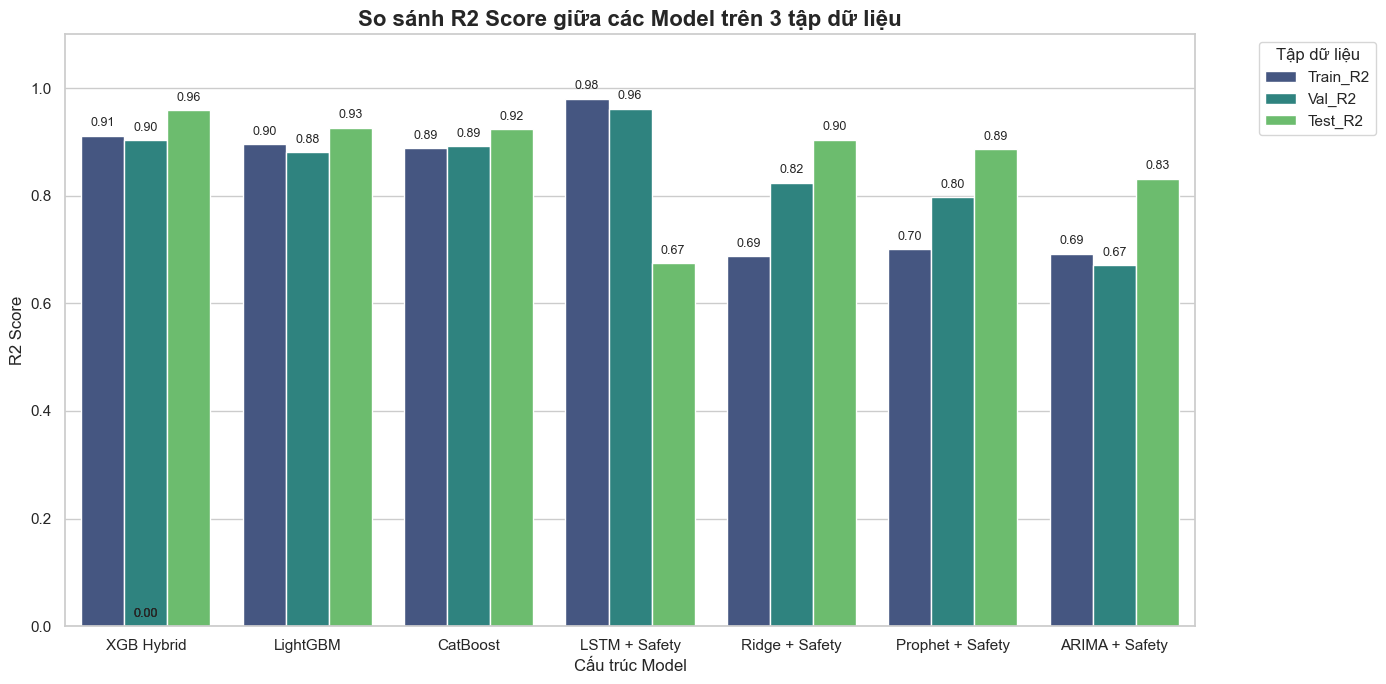

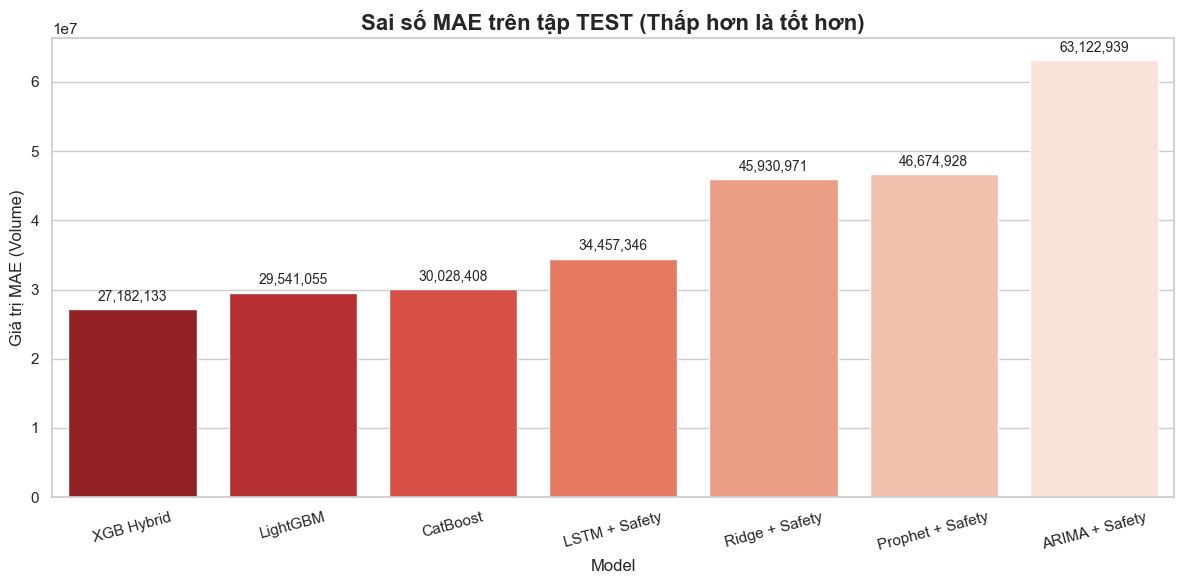

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Khởi tạo dữ liệu từ bảng tổng hợp
data = {
    'Model': ['XGB Hybrid', 'LightGBM', 'CatBoost', 'LSTM + Safety', 'Ridge + Safety', 'Prophet + Safety', 'ARIMA + Safety'],
    'Train_R2': [0.9114, 0.8956, 0.8885, 0.9804, 0.6875, 0.7009, 0.6927],
    'Val_R2': [0.9030, 0.8810, 0.8925, 0.9621, 0.8241, 0.7977, 0.6705],
    'Test_R2': [0.9592, 0.9269, 0.9236, 0.6749, 0.9040, 0.8865, 0.8322],
    'Test_MAE': [27182133, 29541055, 30028408, 34457346, 45930971, 46674928, 63122939]
}

df = pd.DataFrame(data)

# Chuyển đổi dữ liệu sang dạng long-format để vẽ biểu đồ nhóm
df_melted = df.melt(id_vars='Model', value_vars=['Train_R2', 'Val_R2', 'Test_R2'], 
                    var_name='Dataset', value_name='R2_Score')

# 2. Vẽ biểu đồ R2 Score (Càng cao càng tốt)
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

ax1 = sns.barplot(data=df_melted, x='Model', y='R2_Score', hue='Dataset', palette='viridis')
plt.title('So sánh R2 Score giữa các Model trên 3 tập dữ liệu', fontsize=16, fontweight='bold')
plt.ylim(0, 1.1)
plt.ylabel('R2 Score')
plt.xlabel('Cấu trúc Model')
plt.legend(title='Tập dữ liệu', bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm giá trị số lên đầu cột
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize=9)

plt.tight_layout()
plt.show()

# 3. Vẽ biểu đồ MAE trên tập Test (Càng thấp càng tốt)
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=df.sort_values('Test_MAE'), x='Model', y='Test_MAE', palette='Reds_r')
plt.title('Sai số MAE trên tập TEST (Thấp hơn là tốt hơn)', fontsize=16, fontweight='bold')
plt.ylabel('Giá trị MAE (Volume)')
plt.xticks(rotation=15)

# Định dạng hiển thị số tiền/khối lượng lớn
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height()):,}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize=10)

plt.tight_layout()
plt.show()

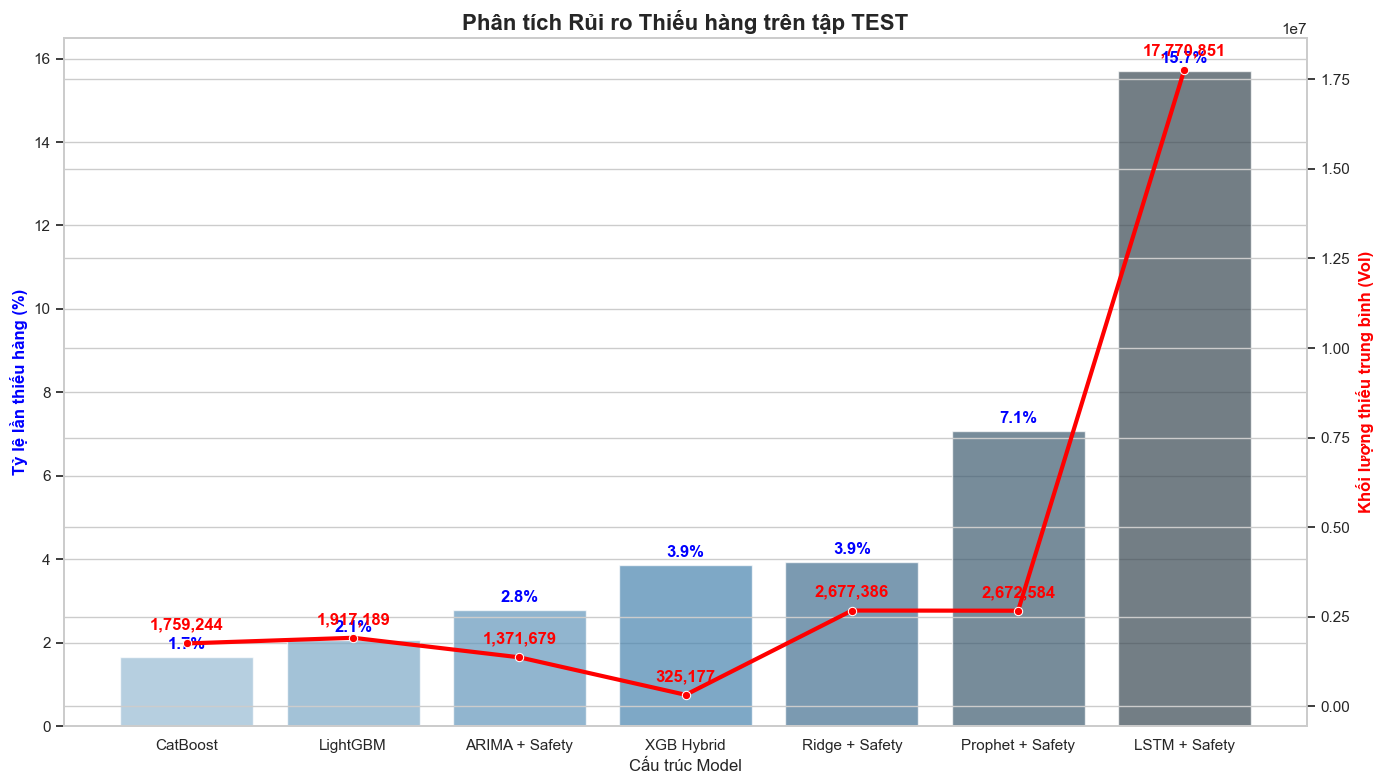

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Khởi tạo dữ liệu Shortage từ tập TEST
shortage_data = {
    'Model': ['XGB Hybrid', 'LightGBM', 'CatBoost', 'LSTM + Safety', 'Ridge + Safety', 'Prophet + Safety', 'ARIMA + Safety'],
    'Shortage_Pct': [3.87, 2.07, 1.66, 15.70, 3.93, 7.07, 2.78],
    'Avg_Shortage_Vol': [325177, 1917189, 1759244, 17770851, 2677386, 2672584, 1371679]
}

df_shortage = pd.DataFrame(shortage_data).sort_values('Shortage_Pct')

# 2. Vẽ biểu đồ kết hợp
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.set_style("whitegrid")

# Trục 1: Shortage % (Biểu đồ cột)
ax1 = sns.barplot(data=df_shortage, x='Model', y='Shortage_Pct', palette='Blues_d', alpha=0.7)
ax1.set_ylabel('Tỷ lệ lần thiếu hàng (%)', fontsize=12, fontweight='bold', color='blue')
ax1.set_xlabel('Cấu trúc Model', fontsize=12)
ax1.set_title('Phân tích Rủi ro Thiếu hàng trên tập TEST', fontsize=16, fontweight='bold')

# Trục 2: Avg Shortage Vol (Biểu đồ đường)
ax2 = ax1.twinx()
sns.lineplot(data=df_shortage, x='Model', y='Avg_Shortage_Vol', color='red', marker='o', linewidth=3, ax=ax2)
ax2.set_ylabel('Khối lượng thiếu trung bình (Vol)', fontsize=12, fontweight='bold', color='red')

# Thêm chú thích số liệu cho Shortage %
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), textcoords = 'offset points', color='blue', fontweight='bold')

# Thêm chú thích số liệu cho Avg Shortage Vol
for i, txt in enumerate(df_shortage['Avg_Shortage_Vol']):
    ax2.annotate(f'{txt:,}', (df_shortage['Model'].iloc[i], df_shortage['Avg_Shortage_Vol'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='red', fontweight='bold')

plt.tight_layout()
plt.show()

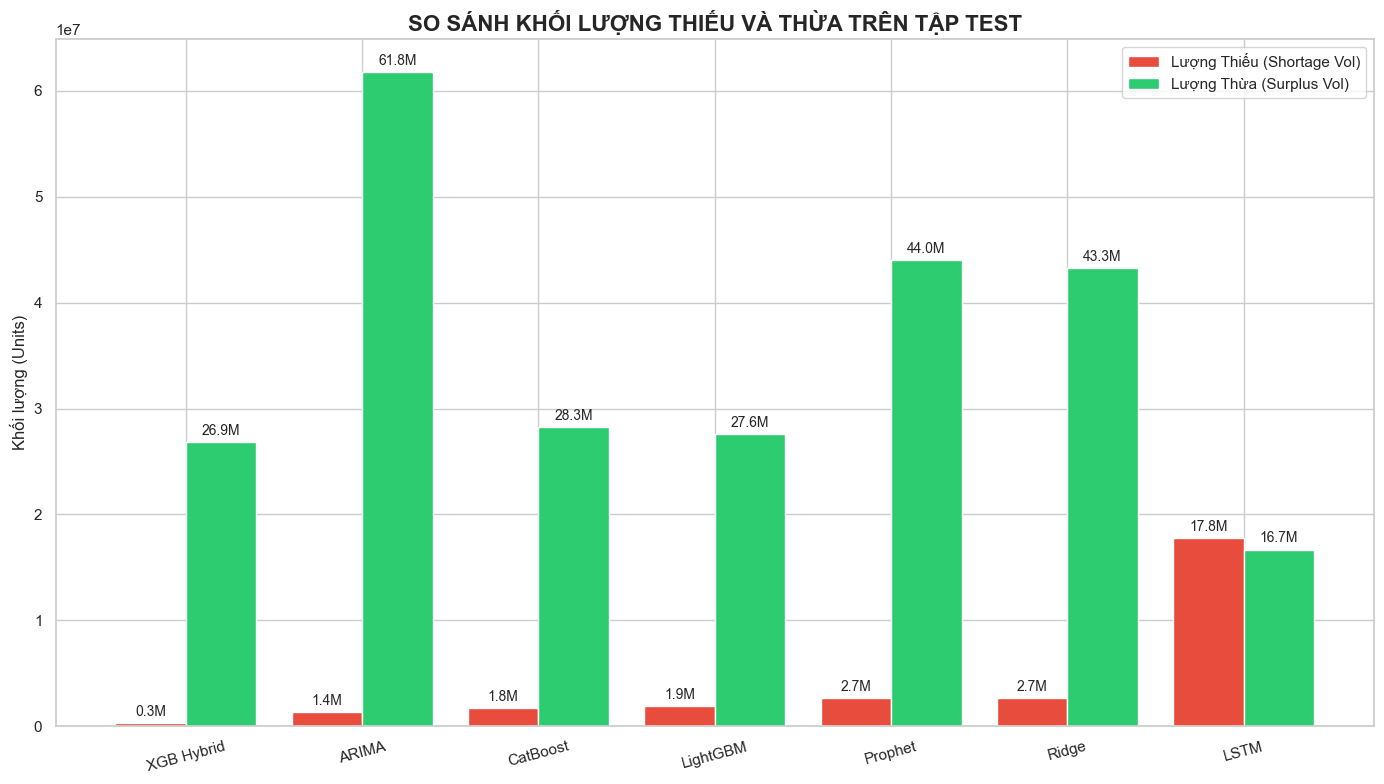

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dữ liệu tập trung vào Volume
data_vol = {
    'Model': ['XGB Hybrid', 'LightGBM', 'CatBoost', 'LSTM', 'Ridge', 'Prophet', 'ARIMA'],
    'Avg_Shortage_Vol': [325177, 1917189, 1759244, 17770851, 2677386, 2672584, 1371679],
    'Avg_Surplus_Vol': [26856956, 27623865, 28269164, 16686495, 43253585, 44002344, 61751260]
}

df_vol = pd.DataFrame(data_vol).sort_values('Avg_Shortage_Vol')

# Vẽ biểu đồ cột chồng (Stacked Bar) hoặc cột đôi
x = np.arange(len(df_vol['Model']))
width = 0.4

fig, ax = plt.subplots(figsize=(14, 8))

# Vẽ lượng thiếu (màu đỏ) và lượng thừa (màu xanh)
rects1 = ax.bar(x - width/2, df_vol['Avg_Shortage_Vol'], width, label='Lượng Thiếu (Shortage Vol)', color='#e74c3c')
rects2 = ax.bar(x + width/2, df_vol['Avg_Surplus_Vol'], width, label='Lượng Thừa (Surplus Vol)', color='#2ecc71')

ax.set_ylabel('Khối lượng (Units)')
ax.set_title('SO SÁNH KHỐI LƯỢNG THIẾU VÀ THỪA TRÊN TẬP TEST', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_vol['Model'], rotation=15)
ax.legend()

# Hàm thêm label số trên đầu cột (rút gọn về triệu - M)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height/1e6:.1f}M',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [54]:
"""
SIMPLE XGBOOST PIPELINE WITH FIXED SAFETY LAYER
No Optimization loops. Just fast & effective.
"""

import numpy as np
import pandas as pd
import os
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

# ============= CẤU HÌNH CỐ ĐỊNH =============
FILE_PATH = 'CaRDS.csv'
TEST_SIZE = 0.2
VAL_SIZE = 0.15
RANDOM_SEED = 42

# Cấu hình XGBoost tiêu chuẩn (Khá mạnh cho Time Series)
XGB_PARAMS = {
    'n_estimators': 2000,
    'learning_rate': 0.03,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:absoluteerror', # Tối ưu MAE trực tiếp
    'n_jobs': -1,
    'tree_method': 'hist',
    'random_state': RANDOM_SEED
}

# Cấu hình Safety Layer (Cố định - Không cần chạy Optuna)
SAFETY_CONFIG = {
    'summer_months': [6, 7, 8],
    'floor': {
        'enabled': True,
        'yoy_growth_min': 0.95,   # Không cho phép thấp hơn 95% năm ngoái
        'mom_drop_max': 0.90,     # Không cho phép tụt quá 10% so với tháng trước
        'mom_drop_summer': 0.98,  # Mùa hè giữ sàn cứng hơn
        'mom_drop_fall': 0.85
    },
    'buffer': {
        'enabled': True,
        'base_sigma': 1.5,        # Cộng thêm 1.5 độ lệch chuẩn sai số
        'hist_coverage': 1.0,     # Bao phủ 100% sai số lịch sử
        'summer_coverage': 1.2,   # Mùa hè bao phủ 120%
        'max_cap_pct': 0.25       # Buffer không được quá 25% dự báo gốc
    }
}

# ============= HÀM HỖ TRỢ =============
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

def clean_physics_based(series):
    """Làm sạch dữ liệu cơ bản"""
    median_val = series.median()
    if pd.isna(median_val) or median_val <= 0: return series.fillna(0)
    phys_min, phys_max = median_val * 0.05, median_val * 10.0
    mask_invalid = (series < phys_min) | (series > phys_max)
    if mask_invalid.any():
        series_clean = series.copy()
        series_clean[mask_invalid] = np.nan
        return series_clean.interpolate(method='linear', limit_direction='both')
    return series

def load_and_process_data(file_path):
    print(f"📂 Loading data from {file_path}...")
    if not os.path.exists(file_path): 
        print("❌ File not found!")
        return None
    
    df = pd.read_csv(file_path)
    df['Variable'] = df['Variable'].astype(str).str.strip().str.lower()
    date_cols = [c for c in df.columns if c not in ['PWSID', 'Variable']]
    df_melt = df.melt(id_vars=['PWSID', 'Variable'], value_vars=date_cols, var_name='Date', value_name='Value')
    df_pivot = df_melt.pivot_table(index=['PWSID', 'Date'], columns='Variable', values='Value').reset_index()
    df_pivot.rename(columns={'demand': 'Demand', 'temperature': 'Temperature', 'precipitation': 'Precipitation', 'pdsi': 'PDSI'}, inplace=True)
    df_pivot['Date'] = pd.to_datetime(df_pivot['Date'])
    df_final = df_pivot.sort_values(['PWSID', 'Date']).reset_index(drop=True)
    
    # Fill weather
    for col in ['Temperature', 'Precipitation', 'PDSI']:
        if col in df_final.columns: 
            df_final[col] = df_final[col].fillna(0 if col=='Precipitation' else df_final[col].median())
    
    # Clean Demand
    if 'Demand' in df_final.columns:
        df_final['Demand'] = df_final.groupby('PWSID')['Demand'].transform(clean_physics_based).fillna(0)
    
    return df_final

def create_features(df):
    print("🔨 Creating features...")
    df = df.copy()
    df['Month'], df['Year'] = df['Date'].dt.month, df['Date'].dt.year
    df['Is_Summer_Peak'] = ((df['Month'] >= 6) & (df['Month'] <= 8)).astype(int)
    
    if 'Temperature' in df.columns: 
        df['CDD'] = np.maximum(df['Temperature'] - 18, 0)
    
    # Lag Features (Đặc trưng trễ)
    df['lag_1'] = df.groupby('PWSID')['Demand'].shift(1)
    df['lag_12'] = df.groupby('PWSID')['Demand'].shift(12)
    df['diff_12'] = df.groupby('PWSID')['Demand'].diff(12)
    
    if 'Temperature' in df.columns: df['Temp_lag_1'] = df.groupby('PWSID')['Temperature'].shift(1)
    if 'Precipitation' in df.columns: df['Precip_lag_1'] = df.groupby('PWSID')['Precipitation'].shift(1)
    
    return df.dropna().reset_index(drop=True)

# ============= MODEL & SAFETY CLASS =============
class WaterDemandSafetyLayer:
    def __init__(self, config):
        self.config = config
        self.risk_profile = None
        self.global_median_lag1 = 0
    
    def fit(self, df_val, y_true, y_pred_raw):
        """Học profil rủi ro từ tập Validation"""
        self.global_median_lag1 = df_val['lag_1'].median()
        analysis = df_val[['PWSID_enc', 'Month']].copy()
        y_true_arr = np.array(y_true).ravel()
        analysis['Shortage'] = y_true_arr - y_pred_raw
        
        # Thống kê sai số
        grp_std = analysis.groupby('PWSID_enc')['Shortage'].std().rename('Error_Std')
        shortage_only = analysis[analysis['Shortage'] > 0]
        grp_max = shortage_only.groupby('PWSID_enc')['Shortage'].max().rename('Max_Shortage')
        
        summer_months = self.config['summer_months']
        summer_shortage = shortage_only[shortage_only['Month'].isin(summer_months)]
        grp_max_summer = summer_shortage.groupby('PWSID_enc')['Shortage'].max().rename('Max_Summer_Shortage')
        
        self.risk_profile = pd.concat([grp_std, grp_max, grp_max_summer], axis=1).fillna(0)
        return self
    
    def predict(self, raw_pred, df_context):
        # 1. Kiểm tra Sensor
        current_lag1 = df_context['lag_1'].values
        mask_sensor_failure = np.isclose(current_lag1, self.global_median_lag1, atol=1e-3)
        
        # 2. Tính Sàn (Floor)
        cfg_f = self.config['floor']
        lag_12 = df_context['lag_12'].values
        lag_1 = df_context['lag_1'].values
        months = df_context['Month'].values
        
        floor_yoy = lag_12 * cfg_f['yoy_growth_min']
        
        mom_factor = np.full_like(raw_pred, cfg_f['mom_drop_max'])
        mask_summer = np.isin(months, self.config['summer_months'])
        mom_factor[mask_summer] = cfg_f['mom_drop_summer']
        mask_fall = np.isin(months, [9, 10, 11])
        mom_factor[mask_fall] = cfg_f['mom_drop_fall']
        
        floor_mom = lag_1 * mom_factor
        floor_mom[np.isnan(floor_mom)] = floor_yoy[np.isnan(floor_mom)]
        
        floored_pred = np.maximum(raw_pred, floor_yoy)
        floored_pred = np.maximum(floored_pred, floor_mom)
        
        # 3. Tính Buffer
        if not self.config['buffer']['enabled']: return floored_pred
            
        cfg_b = self.config['buffer']
        pwsids = df_context['PWSID_enc']
        risk_vec = self.risk_profile.reindex(pwsids).fillna(0)
        
        buf_base = risk_vec['Error_Std'].values * cfg_b['base_sigma']
        buf_hist = risk_vec['Max_Shortage'].values * cfg_b['hist_coverage']
        buf_summer = np.zeros_like(buf_base)
        buf_summer[mask_summer] = risk_vec['Max_Summer_Shortage'].values[mask_summer] * cfg_b['summer_coverage']
        
        raw_buffer = np.maximum(np.maximum(buf_base, buf_hist), buf_summer)
        
        # Tăng buffer nếu sensor hỏng
        fail_safe_add = np.zeros_like(raw_buffer)
        fail_safe_add[mask_sensor_failure] = risk_vec['Error_Std'].values[mask_sensor_failure] * 2.0 
        total_buffer = raw_buffer + fail_safe_add
        
        # Cắt ngọn buffer (Cap)
        cap_val = floored_pred * cfg_b['max_cap_pct']
        cap_val[mask_sensor_failure] *= 1.5
        final_buffer = np.minimum(total_buffer, cap_val)
        
        return floored_pred + final_buffer

# ============= MAIN =============
def detailed_evaluation(y_true, y_pred, name):
    y_true_arr = np.array(y_true).ravel()
    y_pred_arr = np.array(y_pred).ravel()
    diff = y_true_arr - y_pred_arr
    total_samples = len(y_true_arr)
    
    mae = mean_absolute_error(y_true_arr, y_pred_arr)
    r2 = r2_score(y_true_arr, y_pred_arr)
    
    shortage_mask = diff > 0
    shortage_pct = (np.sum(shortage_mask) / total_samples) * 100
    avg_shortage_vol = np.sum(diff[shortage_mask]) / total_samples
    
    surplus_mask = diff < 0
    avg_surplus_vol = np.sum(np.abs(diff[surplus_mask])) / total_samples
    
    return {
        'Dataset': name,
        'MAE': f"{mae:,.2f}",
        'R2': f"{r2:.4f}",
        'Shortage_%': f"{shortage_pct:.2f}%",
        'Avg_Shortage_Vol': f"{avg_shortage_vol:,.0f}",
        'Avg_Surplus_Vol': f"{avg_surplus_vol:,.0f}"
    }

def main():
    set_seed(RANDOM_SEED)
    
    # 1. Load & Feature Engineering
    df = load_and_process_data(FILE_PATH)
    if df is None: return
    df_features = create_features(df)
    
    # 2. Split Data
    unique_dates = df_features['Date'].sort_values().unique()
    n_test = int(len(unique_dates) * TEST_SIZE)
    n_val = int(len(unique_dates) * VAL_SIZE)
    test_start = unique_dates[-n_test]
    val_start = unique_dates[-(n_test + n_val)]
    
    train_df = df_features[df_features['Date'] < val_start].copy()
    val_df = df_features[(df_features['Date'] >= val_start) & (df_features['Date'] < test_start)].copy()
    test_df = df_features[df_features['Date'] >= test_start].copy()
    
    # 3. Encoding
    le = LabelEncoder()
    train_df['PWSID_enc'] = le.fit_transform(train_df['PWSID'])
    val_df['PWSID_enc'] = le.transform(val_df['PWSID'])
    test_df['PWSID_enc'] = le.transform(test_df['PWSID'])
    
    features = ['PWSID_enc', 'Month', 'Year', 'Is_Summer_Peak', 'lag_1', 'lag_12', 'diff_12', 'Temp_lag_1', 'Precip_lag_1', 'CDD']
    features = [f for f in features if f in train_df.columns]
    
    X_train, y_train = train_df[features], train_df['Demand']
    X_val, y_val = val_df[features], val_df['Demand']
    X_test, y_test = test_df[features], test_df['Demand']
    
    # ---------------------------------------------------------
    # BƯỚC 1: XGBOOST (HARDCODED PARAMS)
    # ---------------------------------------------------------
    print(f"\n🚀 Fitting XGBoost Model (Standard Params)...")
    model = xgb.XGBRegressor(**XGB_PARAMS, early_stopping_rounds=100)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    # Dự báo thô
    raw_train = model.predict(X_train)
    raw_val = model.predict(X_val)
    raw_test = model.predict(X_test)
    
    # ---------------------------------------------------------
    # BƯỚC 2: SAFETY LAYER (FIXED CONFIG)
    # ---------------------------------------------------------
    print(f"🛡️ Applying Safety Layer (Fixed Config)...")
    safety_layer = WaterDemandSafetyLayer(SAFETY_CONFIG)
    safety_layer.fit(val_df, y_val, raw_val) # Chỉ fit để học Risk Profile
    
    final_train = safety_layer.predict(raw_train, train_df)
    final_val = safety_layer.predict(raw_val, val_df)
    final_test = safety_layer.predict(raw_test, test_df)
    
    # ---------------------------------------------------------
    # REPORT
    # ---------------------------------------------------------
    print("\n" + "="*80)
    print("🚀 SIMPLE XGBOOST PIPELINE RESULTS")
    print("="*80)
    
    res_train = detailed_evaluation(y_train, final_train, "TRAIN")
    res_val = detailed_evaluation(y_val, final_val, "VALIDATION")
    res_test = detailed_evaluation(y_test, final_test, "TEST (Hold-out)")
    
    summary = pd.DataFrame([res_train, res_val, res_test])
    print("\n" + summary.to_string(index=False))

if __name__ == "__main__":
    main()

📂 Loading data from CaRDS.csv...
🔨 Creating features...

🚀 Fitting XGBoost Model (Standard Params)...
🛡️ Applying Safety Layer (Fixed Config)...

🚀 SIMPLE XGBOOST PIPELINE RESULTS

        Dataset           MAE     R2 Shortage_% Avg_Shortage_Vol Avg_Surplus_Vol
          TRAIN 24,941,281.98 0.8623      0.94%           79,625      24,861,657
     VALIDATION 22,551,564.55 0.8989      0.09%           87,773      22,463,791
TEST (Hold-out) 28,981,860.24 0.9194      2.38%        2,252,073      26,729,787


In [55]:
import pandas as pd

# 1. Tổng hợp dữ liệu đầy đủ từ các bản log
full_data = [
    # Cấu trúc: [Model, Dataset, MAE, R2, Shortage_%, Avg_Shortage_Vol, Avg_Surplus_Vol]
    
    # --- NHÓM HYBRID (ANCHOR + RESIDUAL) ---
    ["XGBoost Hybrid (Ridge Anchor)", "Train", 26806358.99, 0.9114, 2.22, 683948.49, 26122410.51],
    ["XGBoost Hybrid (Ridge Anchor)", "Validation", 26905052.96, 0.9030, 0.57, 2729.76, 26902323.20],
    ["XGBoost Hybrid (Ridge Anchor)", "Test (Unseen)", 27182133.56, 0.9592, 3.87, 325177.20, 26856956.36],

    ["XGBoost Hybrid (ARIMA Anchor)", "Train", 52776172.71, 0.7574, 1.19, 50145.85, 52726026.86],
    ["XGBoost Hybrid (ARIMA Anchor)", "Validation", 51689075.17, 0.7444, 1.86, 85456.76, 51603618.41],
    ["XGBoost Hybrid (ARIMA Anchor)", "Test (Unseen)", 59494637.66, 0.8521, 1.45, 996808.93, 58497828.72],

    # --- NHÓM BOOSTING ĐƠN THUẦN ---
    ["Simple XGBoost", "Train", 24941281.98, 0.8623, 0.94, 79625.00, 24861657.00],
    ["Simple XGBoost", "Validation", 22551564.55, 0.8989, 0.09, 87773.00, 22463791.00],
    ["Simple XGBoost", "Test (Unseen)", 28981860.24, 0.9194, 2.38, 2252073.00, 26729787.00],

    ["LightGBM", "Train", 26105070.98, 0.90, 3.91, 379595.39, 25725475.59],
    ["LightGBM", "Validation", 27051583.12, 0.88, 1.67, 56107.91, 26995475.22],
    ["LightGBM", "Test (Unseen)", 29541055.09, 0.93, 2.07, 1917189.61, 27623865.48],

    ["CatBoost", "Train", 26462056.84, 0.89, 3.96, 709988.73, 25752068.11],
    ["CatBoost", "Validation", 26450194.66, 0.89, 0.36, 179919.05, 26270275.61],
    ["CatBoost", "Test (Unseen)", 30028408.24, 0.92, 1.66, 1759244.42, 28269163.82],

    # --- NHÓM BASELINE & DEEP LEARNING ---
    ["LSTM + Safety", "Train", 15249133.30, 0.9804, 20.8, 2457519.80, 12791613.60],
    ["LSTM + Safety", "Validation", 15316970.10, 0.9621, 21.8, 2561366.60, 12755603.50],
    ["LSTM + Safety", "Test (Unseen)", 34457346.50, 0.6749, 15.7, 17770851.40, 16686495.10],

    ["ARIMA + Safety", "Train", 58091055.81, 0.6927, 2.76, 460106.92, 57630948.89],
    ["ARIMA + Safety", "Validation", 58866802.70, 0.6705, 2.48, 379698.45, 58487104.25],
    ["ARIMA + Safety", "Test (Unseen)", 63122939.17, 0.8322, 2.78, 1371679.37, 61751259.81],

    ["Prophet + Safety", "Train", 48020669.93, 0.70, 3.17, 363794.11, 47656875.81],
    ["Prophet + Safety", "Validation", 39541119.52, 0.80, 3.64, 460171.18, 39080948.33],
    ["Prophet + Safety", "Test (Unseen)", 46674928.10, 0.89, 7.07, 2672584.13, 44002343.97],

    ["Ridge + Safety", "Train", 54377863.76, 0.69, 5.01, 2155347.01, 52222516.74],
    ["Ridge + Safety", "Validation", 43816675.62, 0.82, 1.86, 427259.97, 43389415.64],
    ["Ridge + Safety", "Test (Unseen)", 45930971.41, 0.90, 3.93, 2677386.06, 43253585.35]
]

# 2. Tạo DataFrame
columns = ["Model", "Dataset", "MAE", "R2", "Shortage_%", "Avg_Shortage_Vol", "Avg_Surplus_Vol"]
df = pd.DataFrame(full_data, columns=columns)

# 3. Phân tích so sánh Khối lượng trên tập Test
test_results = df[df["Dataset"] == "Test (Unseen)"].sort_values(by="MAE")

# Format hiển thị triệu (M)
df_print = test_results.copy()
for col in ["MAE", "Avg_Shortage_Vol", "Avg_Surplus_Vol"]:
    df_print[col] = df_print[col].apply(lambda x: f"{x/1e6:,.2f}M")

print("--- BẢNG TỔNG HỢP CUỐI CÙNG (TẬP TEST) ---")
print(df_print[["Model", "MAE", "R2", "Avg_Shortage_Vol", "Avg_Surplus_Vol"]].to_string(index=False))

--- BẢNG TỔNG HỢP CUỐI CÙNG (TẬP TEST) ---
                        Model    MAE   R2 Avg_Shortage_Vol Avg_Surplus_Vol
XGBoost Hybrid (Ridge Anchor) 27.18M 0.96            0.33M          26.86M
               Simple XGBoost 28.98M 0.92            2.25M          26.73M
                     LightGBM 29.54M 0.93            1.92M          27.62M
                     CatBoost 30.03M 0.92            1.76M          28.27M
                LSTM + Safety 34.46M 0.67           17.77M          16.69M
               Ridge + Safety 45.93M 0.90            2.68M          43.25M
             Prophet + Safety 46.67M 0.89            2.67M          44.00M
XGBoost Hybrid (ARIMA Anchor) 59.49M 0.85            1.00M          58.50M
               ARIMA + Safety 63.12M 0.83            1.37M          61.75M


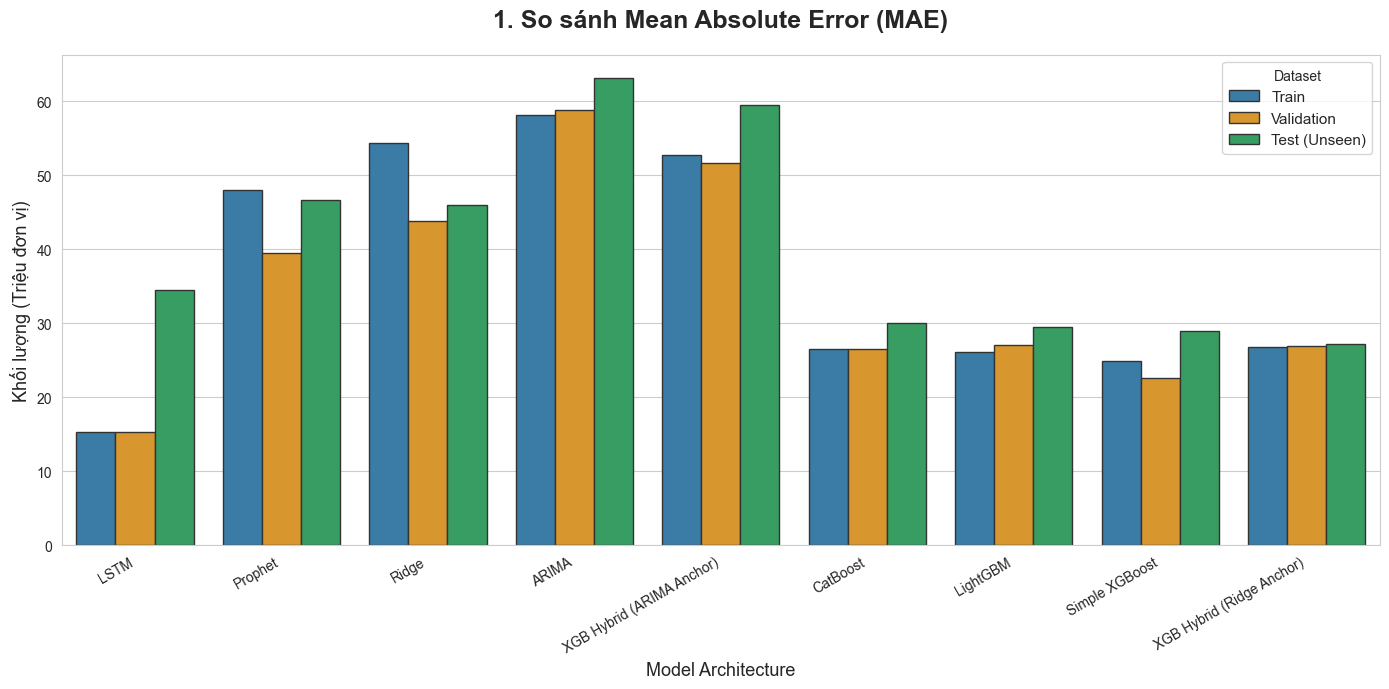

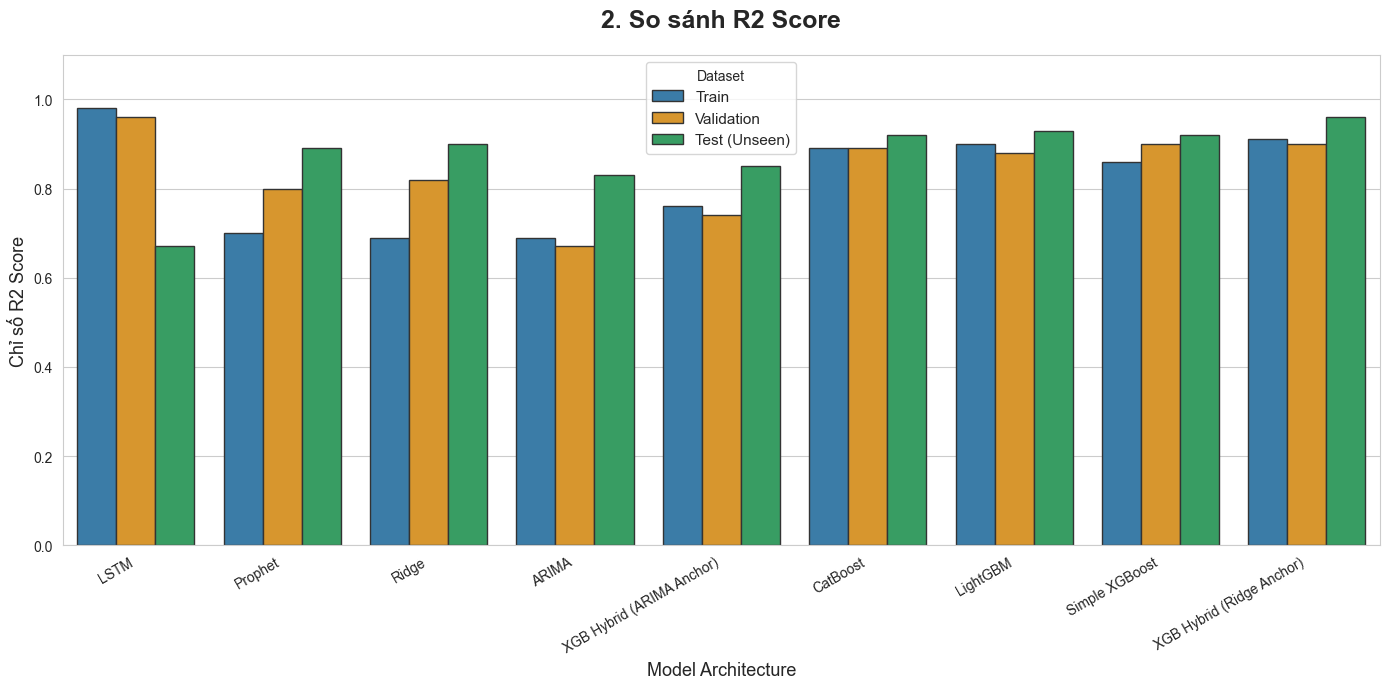

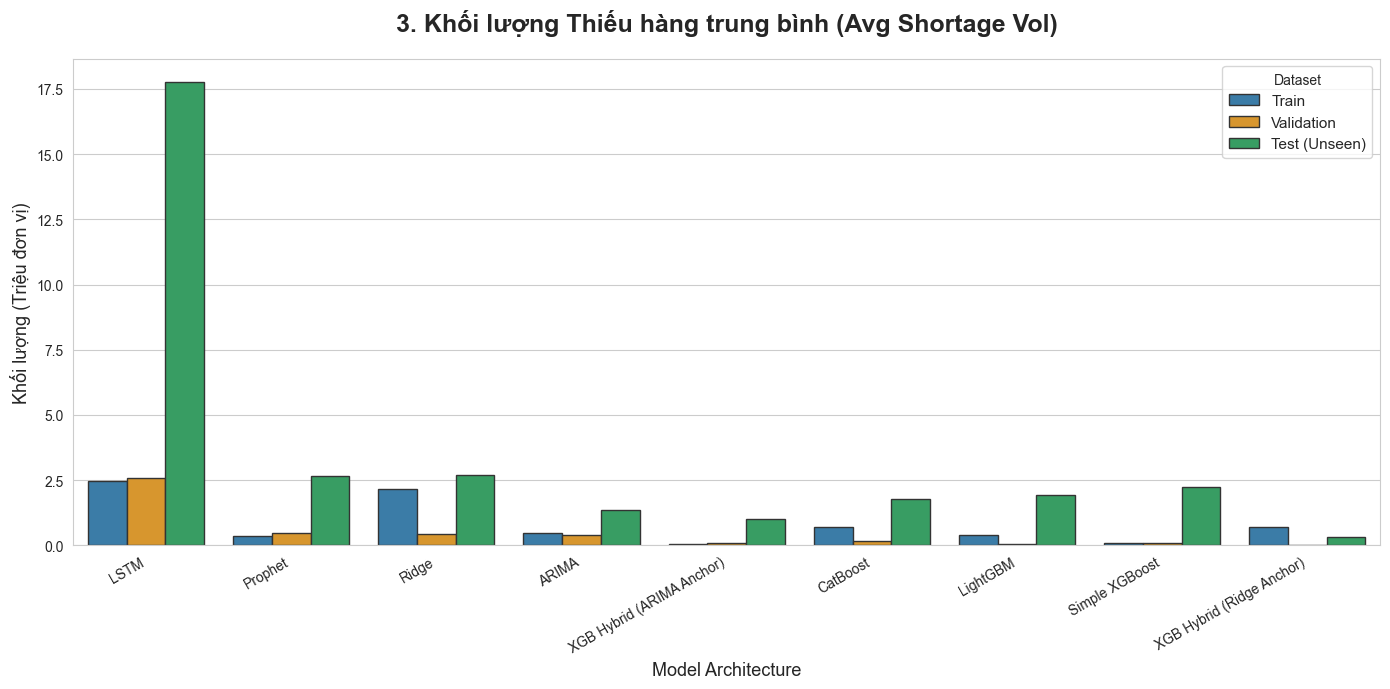

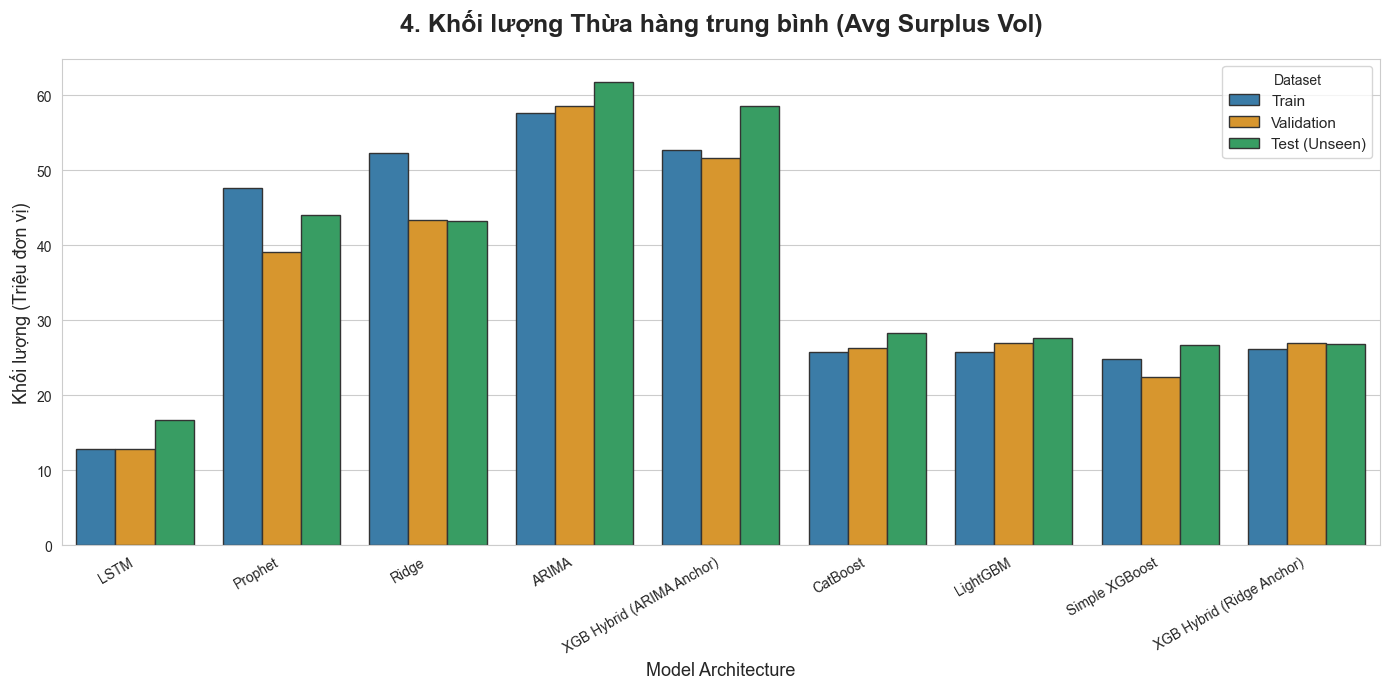

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Khởi tạo dữ liệu từ các bản log thử nghiệm
data = [
    # Model | Dataset | MAE | R2 | Shortage_Vol | Surplus_Vol (Đơn vị: Triệu)
    ["LSTM", "Train", 15.25, 0.98, 2.46, 12.79],
    ["LSTM", "Validation", 15.32, 0.96, 2.56, 12.76],
    ["LSTM", "Test (Unseen)", 34.46, 0.67, 17.77, 16.69],

    ["Prophet", "Train", 48.02, 0.70, 0.36, 47.66],
    ["Prophet", "Validation", 39.54, 0.80, 0.46, 39.08],
    ["Prophet", "Test (Unseen)", 46.67, 0.89, 2.67, 44.00],

    ["Ridge", "Train", 54.38, 0.69, 2.16, 52.22],
    ["Ridge", "Validation", 43.82, 0.82, 0.43, 43.39],
    ["Ridge", "Test (Unseen)", 45.93, 0.90, 2.68, 43.25],

    ["ARIMA", "Train", 58.09, 0.69, 0.46, 57.63],
    ["ARIMA", "Validation", 58.87, 0.67, 0.38, 58.49],
    ["ARIMA", "Test (Unseen)", 63.12, 0.83, 1.37, 61.75],

    ["XGB Hybrid (ARIMA Anchor)", "Train", 52.78, 0.76, 0.05, 52.73],
    ["XGB Hybrid (ARIMA Anchor)", "Validation", 51.69, 0.74, 0.09, 51.60],
    ["XGB Hybrid (ARIMA Anchor)", "Test (Unseen)", 59.49, 0.85, 1.00, 58.50],

    ["CatBoost", "Train", 26.46, 0.89, 0.71, 25.75],
    ["CatBoost", "Validation", 26.45, 0.89, 0.18, 26.27],
    ["CatBoost", "Test (Unseen)", 30.03, 0.92, 1.76, 28.27],

    ["LightGBM", "Train", 26.11, 0.90, 0.38, 25.73],
    ["LightGBM", "Validation", 27.05, 0.88, 0.06, 27.00],
    ["LightGBM", "Test (Unseen)", 29.54, 0.93, 1.92, 27.62],

    ["Simple XGBoost", "Train", 24.94, 0.86, 0.08, 24.86],
    ["Simple XGBoost", "Validation", 22.55, 0.90, 0.09, 22.46],
    ["Simple XGBoost", "Test (Unseen)", 28.98, 0.92, 2.25, 26.73],

    ["XGB Hybrid (Ridge Anchor)", "Train", 26.81, 0.91, 0.68, 26.12],
    ["XGB Hybrid (Ridge Anchor)", "Validation", 26.91, 0.90, 0.003, 26.90],
    ["XGB Hybrid (Ridge Anchor)", "Test (Unseen)", 27.18, 0.96, 0.33, 26.86]
]

df = pd.DataFrame(data, columns=["Model", "Dataset", "MAE", "R2", "Shortage_Vol", "Surplus_Vol"])

# 2. Định nghĩa bảng màu rõ ràng
# Train: Xanh dương, Validation: Cam, Test: Xanh lá
palette = {"Train": "#2980b9", "Validation": "#f39c12", "Test (Unseen)": "#27ae60"}

# 3. Hàm vẽ biểu đồ riêng biệt
def generate_plot(metric, title, ylabel, ylim=None):
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")
    ax = sns.barplot(
        data=df,
        x="Model",
        y=metric,
        hue="Dataset",
        palette=palette,
        edgecolor=".2"
    )
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.ylabel(ylabel, fontsize=13)
    plt.xlabel("Model Architecture", fontsize=13)
    plt.xticks(rotation=30, ha='right')
    if ylim: plt.ylim(ylim)
    plt.legend(title="Dataset", frameon=True, fontsize=11)
    plt.tight_layout()
    plt.show()

# --- Thực thi vẽ từng cái ---

# Biểu đồ 1: Sai số MAE (Càng thấp càng tốt)
generate_plot("MAE", "1. So sánh Mean Absolute Error (MAE)", "Khối lượng (Triệu đơn vị)")

# Biểu đồ 2: Độ chính xác R2 Score (Càng cao càng tốt)
generate_plot("R2", "2. So sánh R2 Score", "Chỉ số R2 Score", ylim=(0, 1.1))

# Biểu đồ 3: Lượng thiếu hàng (Quản trị rủi ro - Càng thấp càng tốt)
generate_plot("Shortage_Vol", "3. Khối lượng Thiếu hàng trung bình (Avg Shortage Vol)", "Khối lượng (Triệu đơn vị)")

# Biểu đồ 4: Lượng thừa hàng (Chi phí kho - Càng thấp càng tốt)
generate_plot("Surplus_Vol", "4. Khối lượng Thừa hàng trung bình (Avg Surplus Vol)", "Khối lượng (Triệu đơn vị)")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20732\651106738.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x="Dataset", y="MAE", data=df_best, palette=colors, edgecolor=".2")


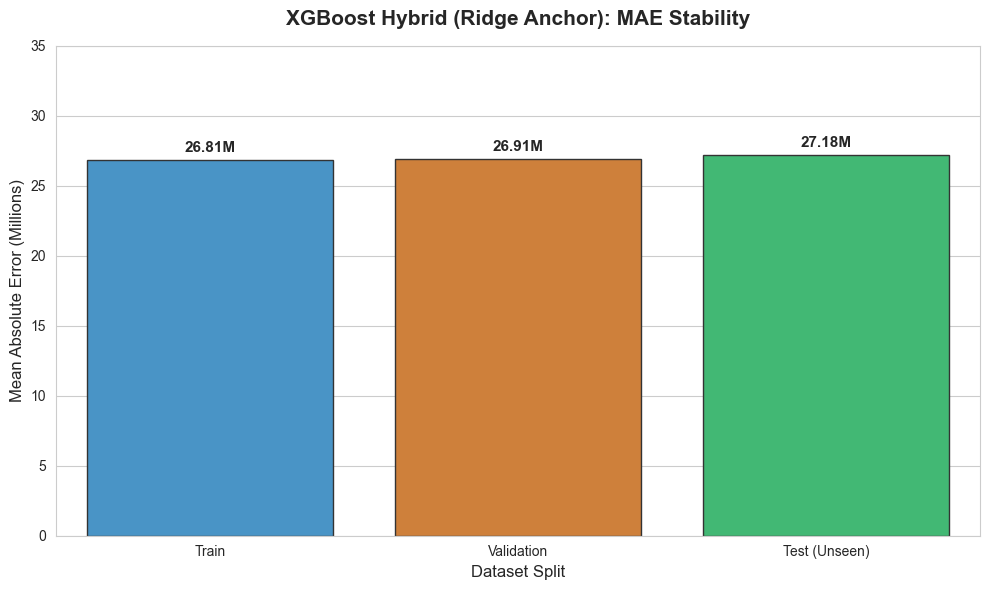

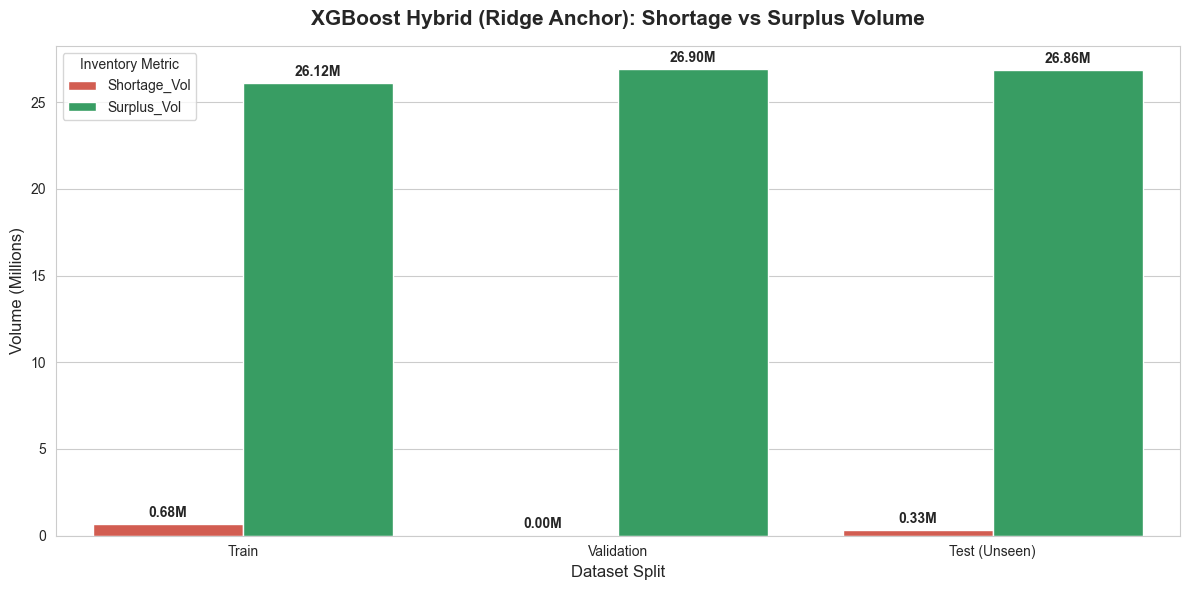

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dữ liệu chi tiết của mô hình tốt nhất: XGBoost Hybrid (Ridge Anchor)
best_model_data = [
    {"Dataset": "Train", "MAE": 26.81, "R2": 0.91, "Shortage_Vol": 0.68, "Surplus_Vol": 26.12},
    {"Dataset": "Validation", "MAE": 26.91, "R2": 0.90, "Shortage_Vol": 0.003, "Surplus_Vol": 26.90},
    {"Dataset": "Test (Unseen)", "MAE": 27.18, "R2": 0.96, "Shortage_Vol": 0.33, "Surplus_Vol": 26.86}
]

df_best = pd.DataFrame(best_model_data)

# Cấu hình màu sắc đặc trưng cho 3 giai đoạn
colors = ["#3498db", "#e67e22", "#2ecc71"] # Blue, Orange, Green

# ---------------------------------------------------------
# BIỂU ĐỒ 1: ĐỘ ỔN ĐỊNH SAI SỐ (MAE) QUA 3 TẬP DỮ LIỆU
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax1 = sns.barplot(x="Dataset", y="MAE", data=df_best, palette=colors, edgecolor=".2")

# Thêm số liệu trực tiếp trên đầu cột
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', 
                fontweight='bold', fontsize=11)

plt.title("XGBoost Hybrid (Ridge Anchor): MAE Stability", fontsize=15, fontweight='bold', pad=15)
plt.ylabel("Mean Absolute Error (Millions)", fontsize=12)
plt.xlabel("Dataset Split", fontsize=12)
plt.ylim(0, 35) # Scale cố định để thấy sự biến động rất nhỏ
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# BIỂU ĐỒ 2: CÂN BẰNG THIẾU HÀNG VS THỪA HÀNG (VOLUME ANALYSIS)
# ---------------------------------------------------------
# Chuyển dữ liệu sang dạng long-format để vẽ cột đôi
df_vol = df_best.melt(id_vars="Dataset", value_vars=["Shortage_Vol", "Surplus_Vol"], 
                      var_name="Type", value_name="Volume")

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=df_vol, x="Dataset", y="Volume", hue="Type", palette=["#e74c3c", "#27ae60"])

# Thêm số liệu cho từng cột
for p in ax2.patches:
    val = p.get_height()
    if val > 0:
        ax2.annotate(f'{val:.2f}M', (p.get_x() + p.get_width() / 2., val),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', 
                    fontsize=10, fontweight='bold')

plt.title("XGBoost Hybrid (Ridge Anchor): Shortage vs Surplus Volume", fontsize=15, fontweight='bold', pad=15)
plt.ylabel("Volume (Millions)", fontsize=12)
plt.xlabel("Dataset Split", fontsize=12)
plt.legend(title="Inventory Metric", frameon=True)
plt.tight_layout()
plt.show()